In [2]:
import pandas as pd
import numpy as np

from utils.models import find_best_model
from utils.search_model import train_models
from utils.visual import plot_for_each_algorithm,plot_for_each_balancer,plot_for_each_performance_metric
from utils.get_parameters import max_score_for_each, get_combinations
import os

## Model Training

The first step of model training is to train combinations of algorithm, imputation and balancing approaches\
The algorithms are:

    - KNN
    - Decision Tree
    - Logistic regression
    - SVM
    - Naive Bayes
    - RandomForestClassifier
    - GradientBoostingClassifier
    - BaggingClassifier
    - XGBClassifier



In [3]:
# performance_df = train_models("../data/initial_data/frmgham2_project_data_full.csv",'CVD',
                 # '../src/results/general/full_data_performances_9_models_5_balancers.csv')
performances_df = pd.read_csv("../src/results/general/full_data_performances_9_models_5_balancers.csv")


In [5]:
performances_df

Algorithm                                 Imputer Imbalance  \
0     LogisticRegression  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
1           DecisionTree  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
2             NaiveBayes  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
3                    KNN  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
4                    SVM  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
...                  ...                                     ...       ...   
1075                 SVM          KNNImptuer__SimpleImputer_mode    AllKNN   
1076        RandomForest          KNNImptuer__SimpleImputer_mode    AllKNN   
1077    GradientBoosting          KNNImptuer__SimpleImputer_mode    AllKNN   
1078             Bagging          KNNImptuer__SimpleImputer_mode    AllKNN   
1079             XGBoost          KNNImptuer__SimpleImputer_mode    AllKNN   

         Metric   Score    Set MainMetric  
0     Train-F-1   97.53  Train        F-1  
1     Train-F-1  100.00  Train        F-1  
2     Train-F-1   93.23  Train        F-1  
3     Train-F-1   98.27  Train        F-1  
4     Train-F-1   98.29  Train        F-1  
...         ...     ...    ...        ...  
1075   Test-AUC   96.68   Test        AUC  
1076   Test-AUC   96.70   Test        AUC  
1077   Test-AUC   96.48   Test        AUC  
1078   Test-AUC   96.68   Test        AUC  
1079   Test-AUC   96.47   Test        AUC  

[1080 rows x 7 columns]

In [7]:
counts = performances_df[['Algorithm','Imputer','Imbalance']].drop_duplicates().shape[0]
print(f"Number of models for each algorithm: {counts}")

Number of models for each algorithm: 90


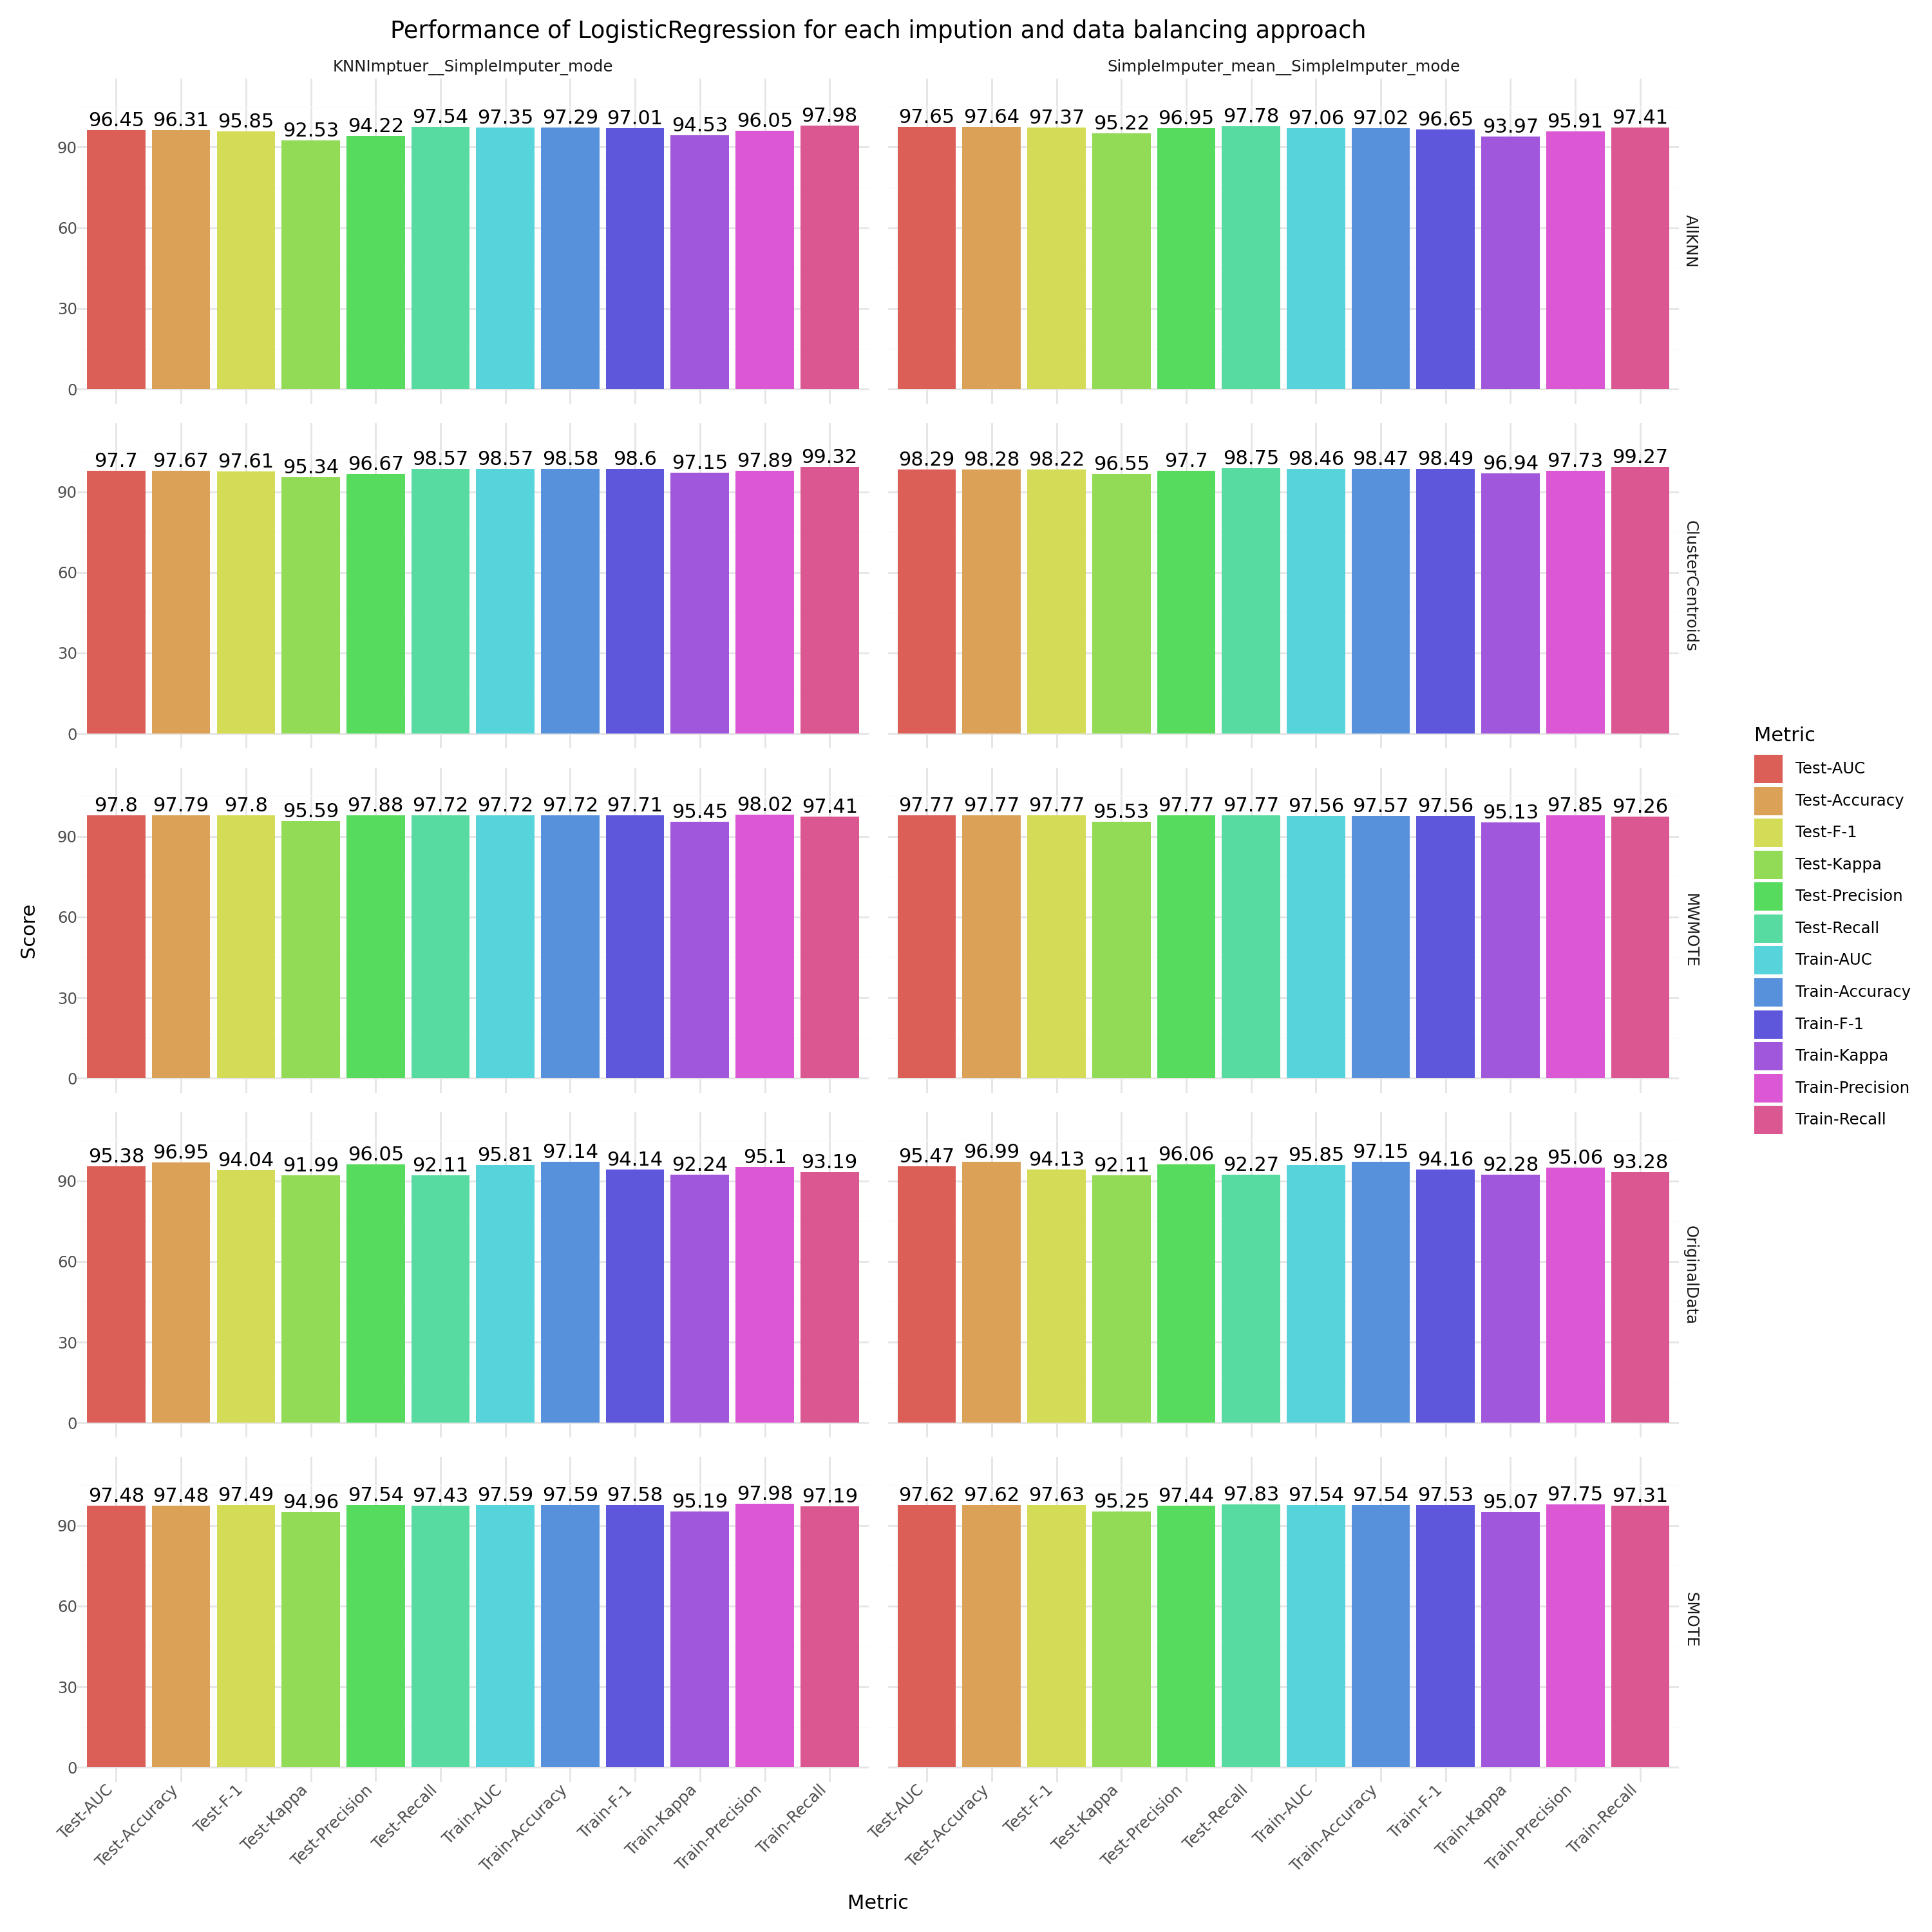

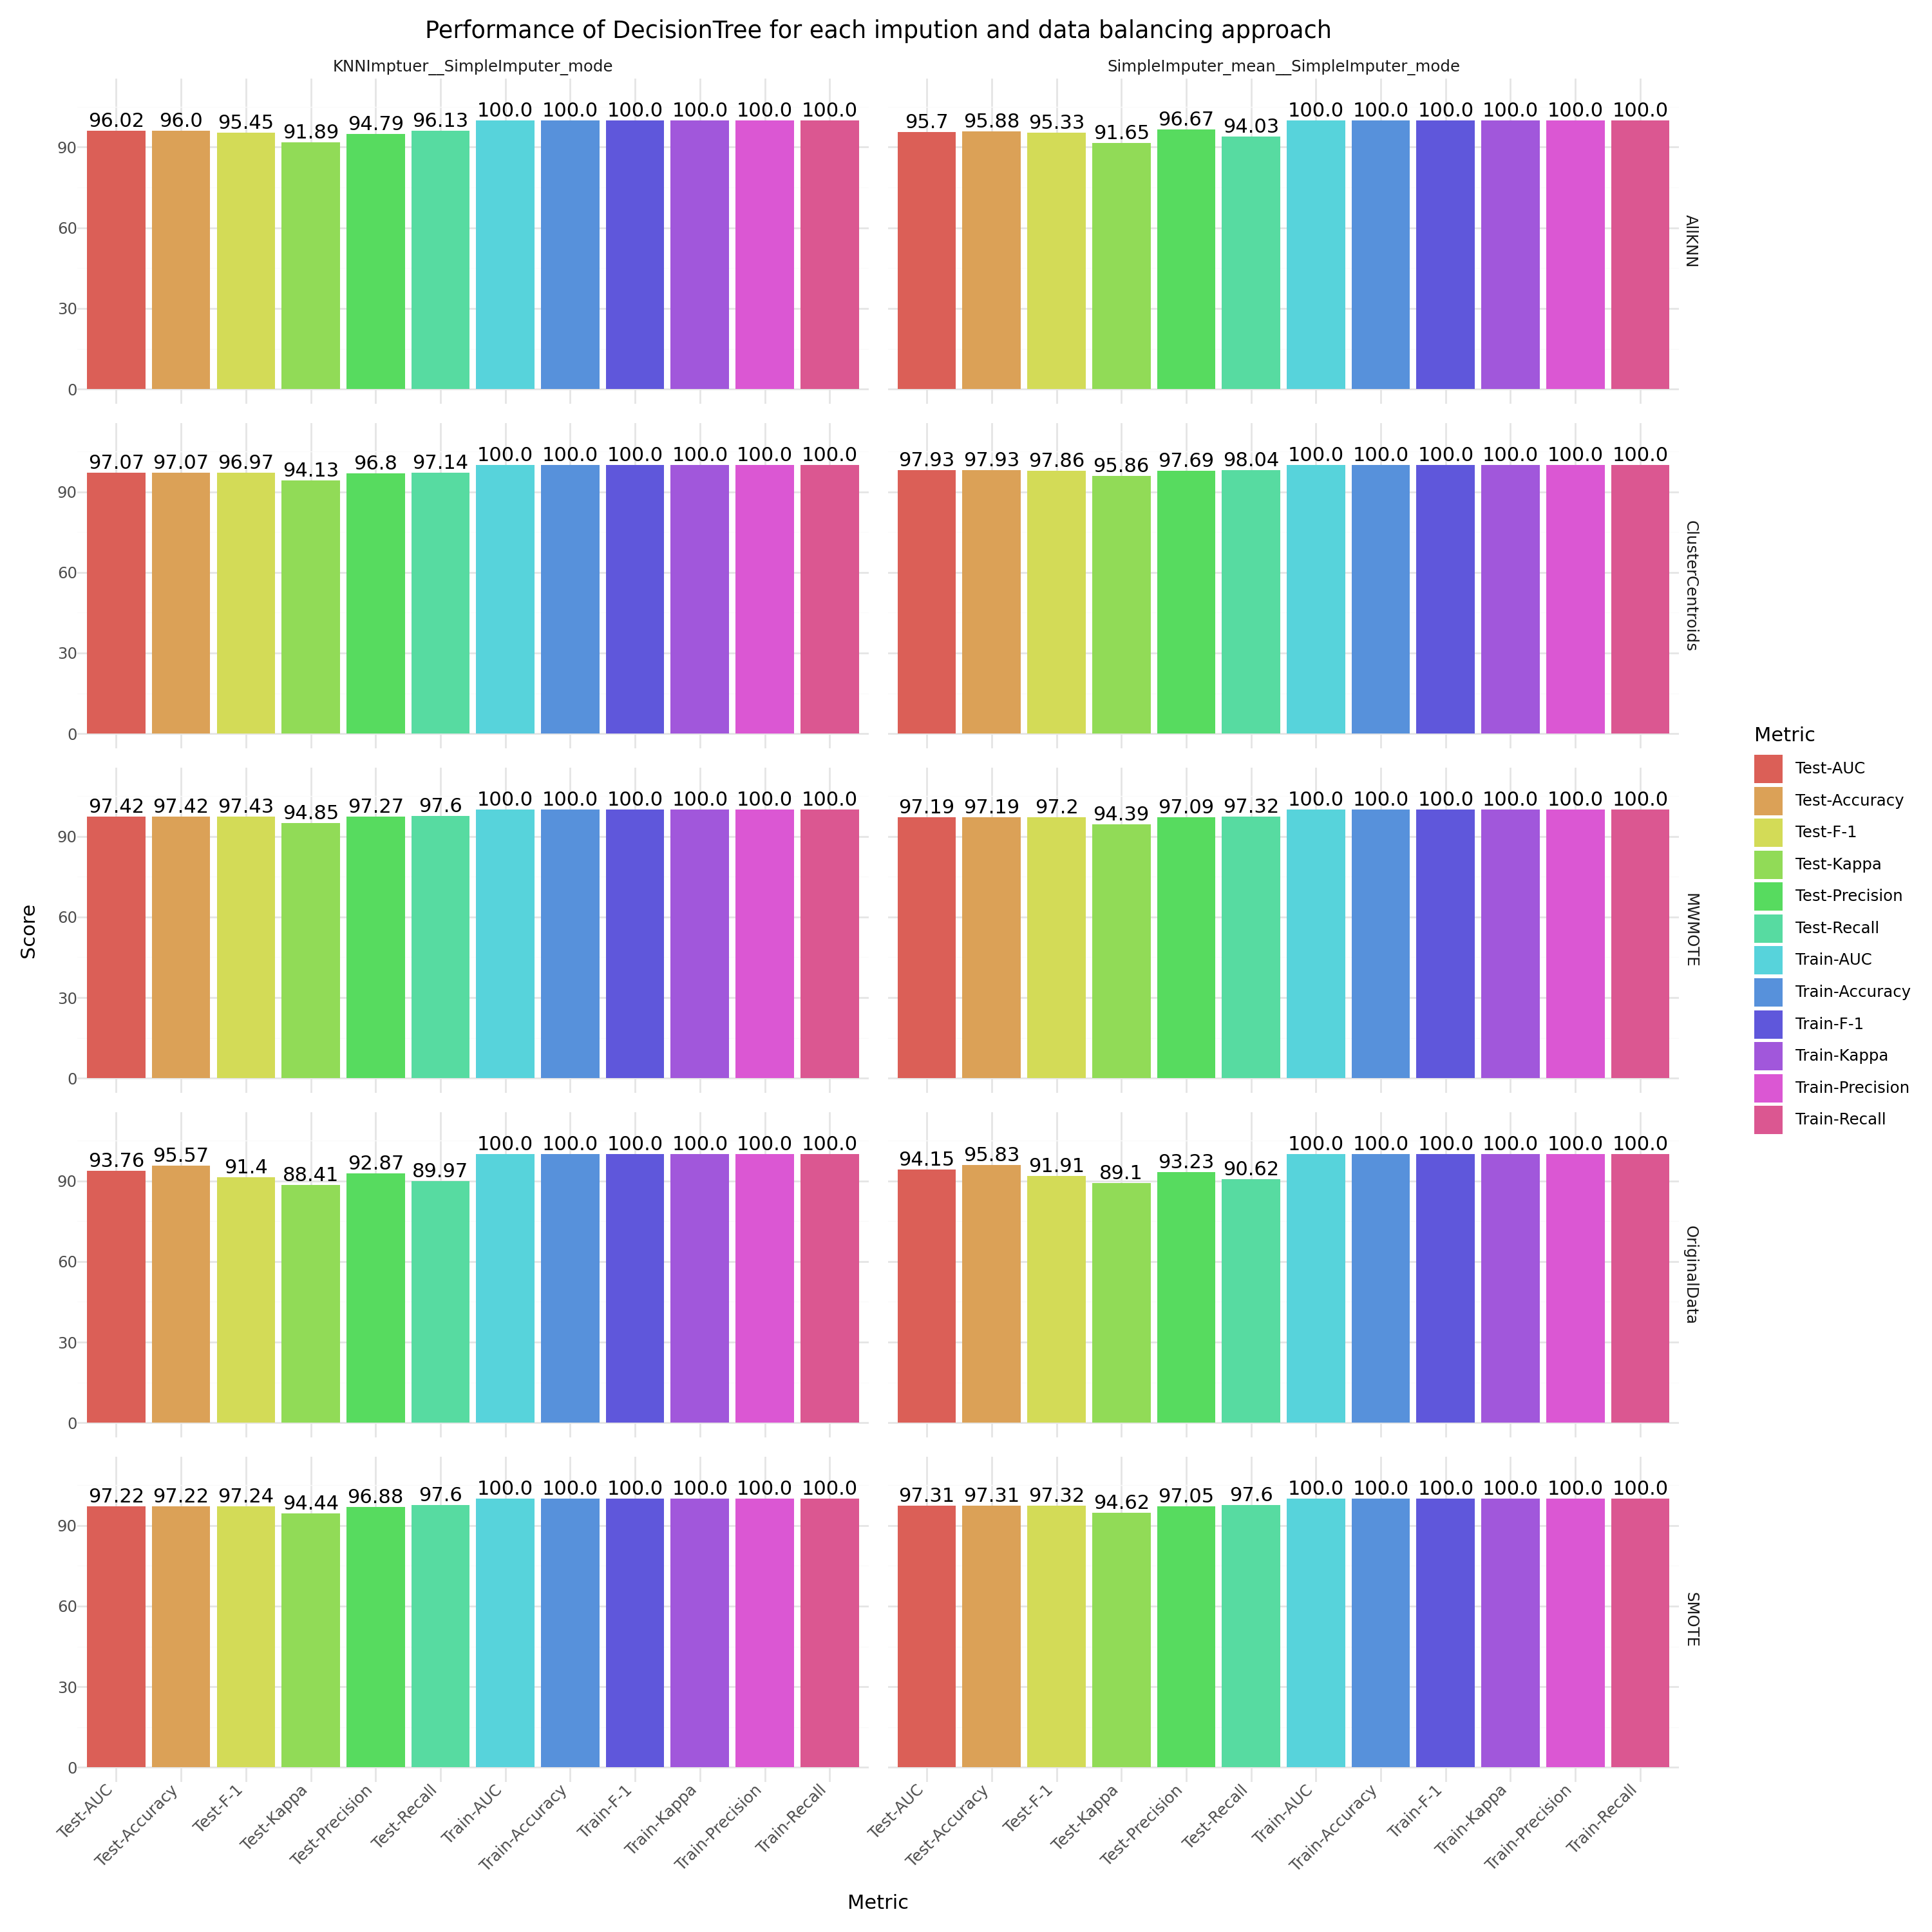

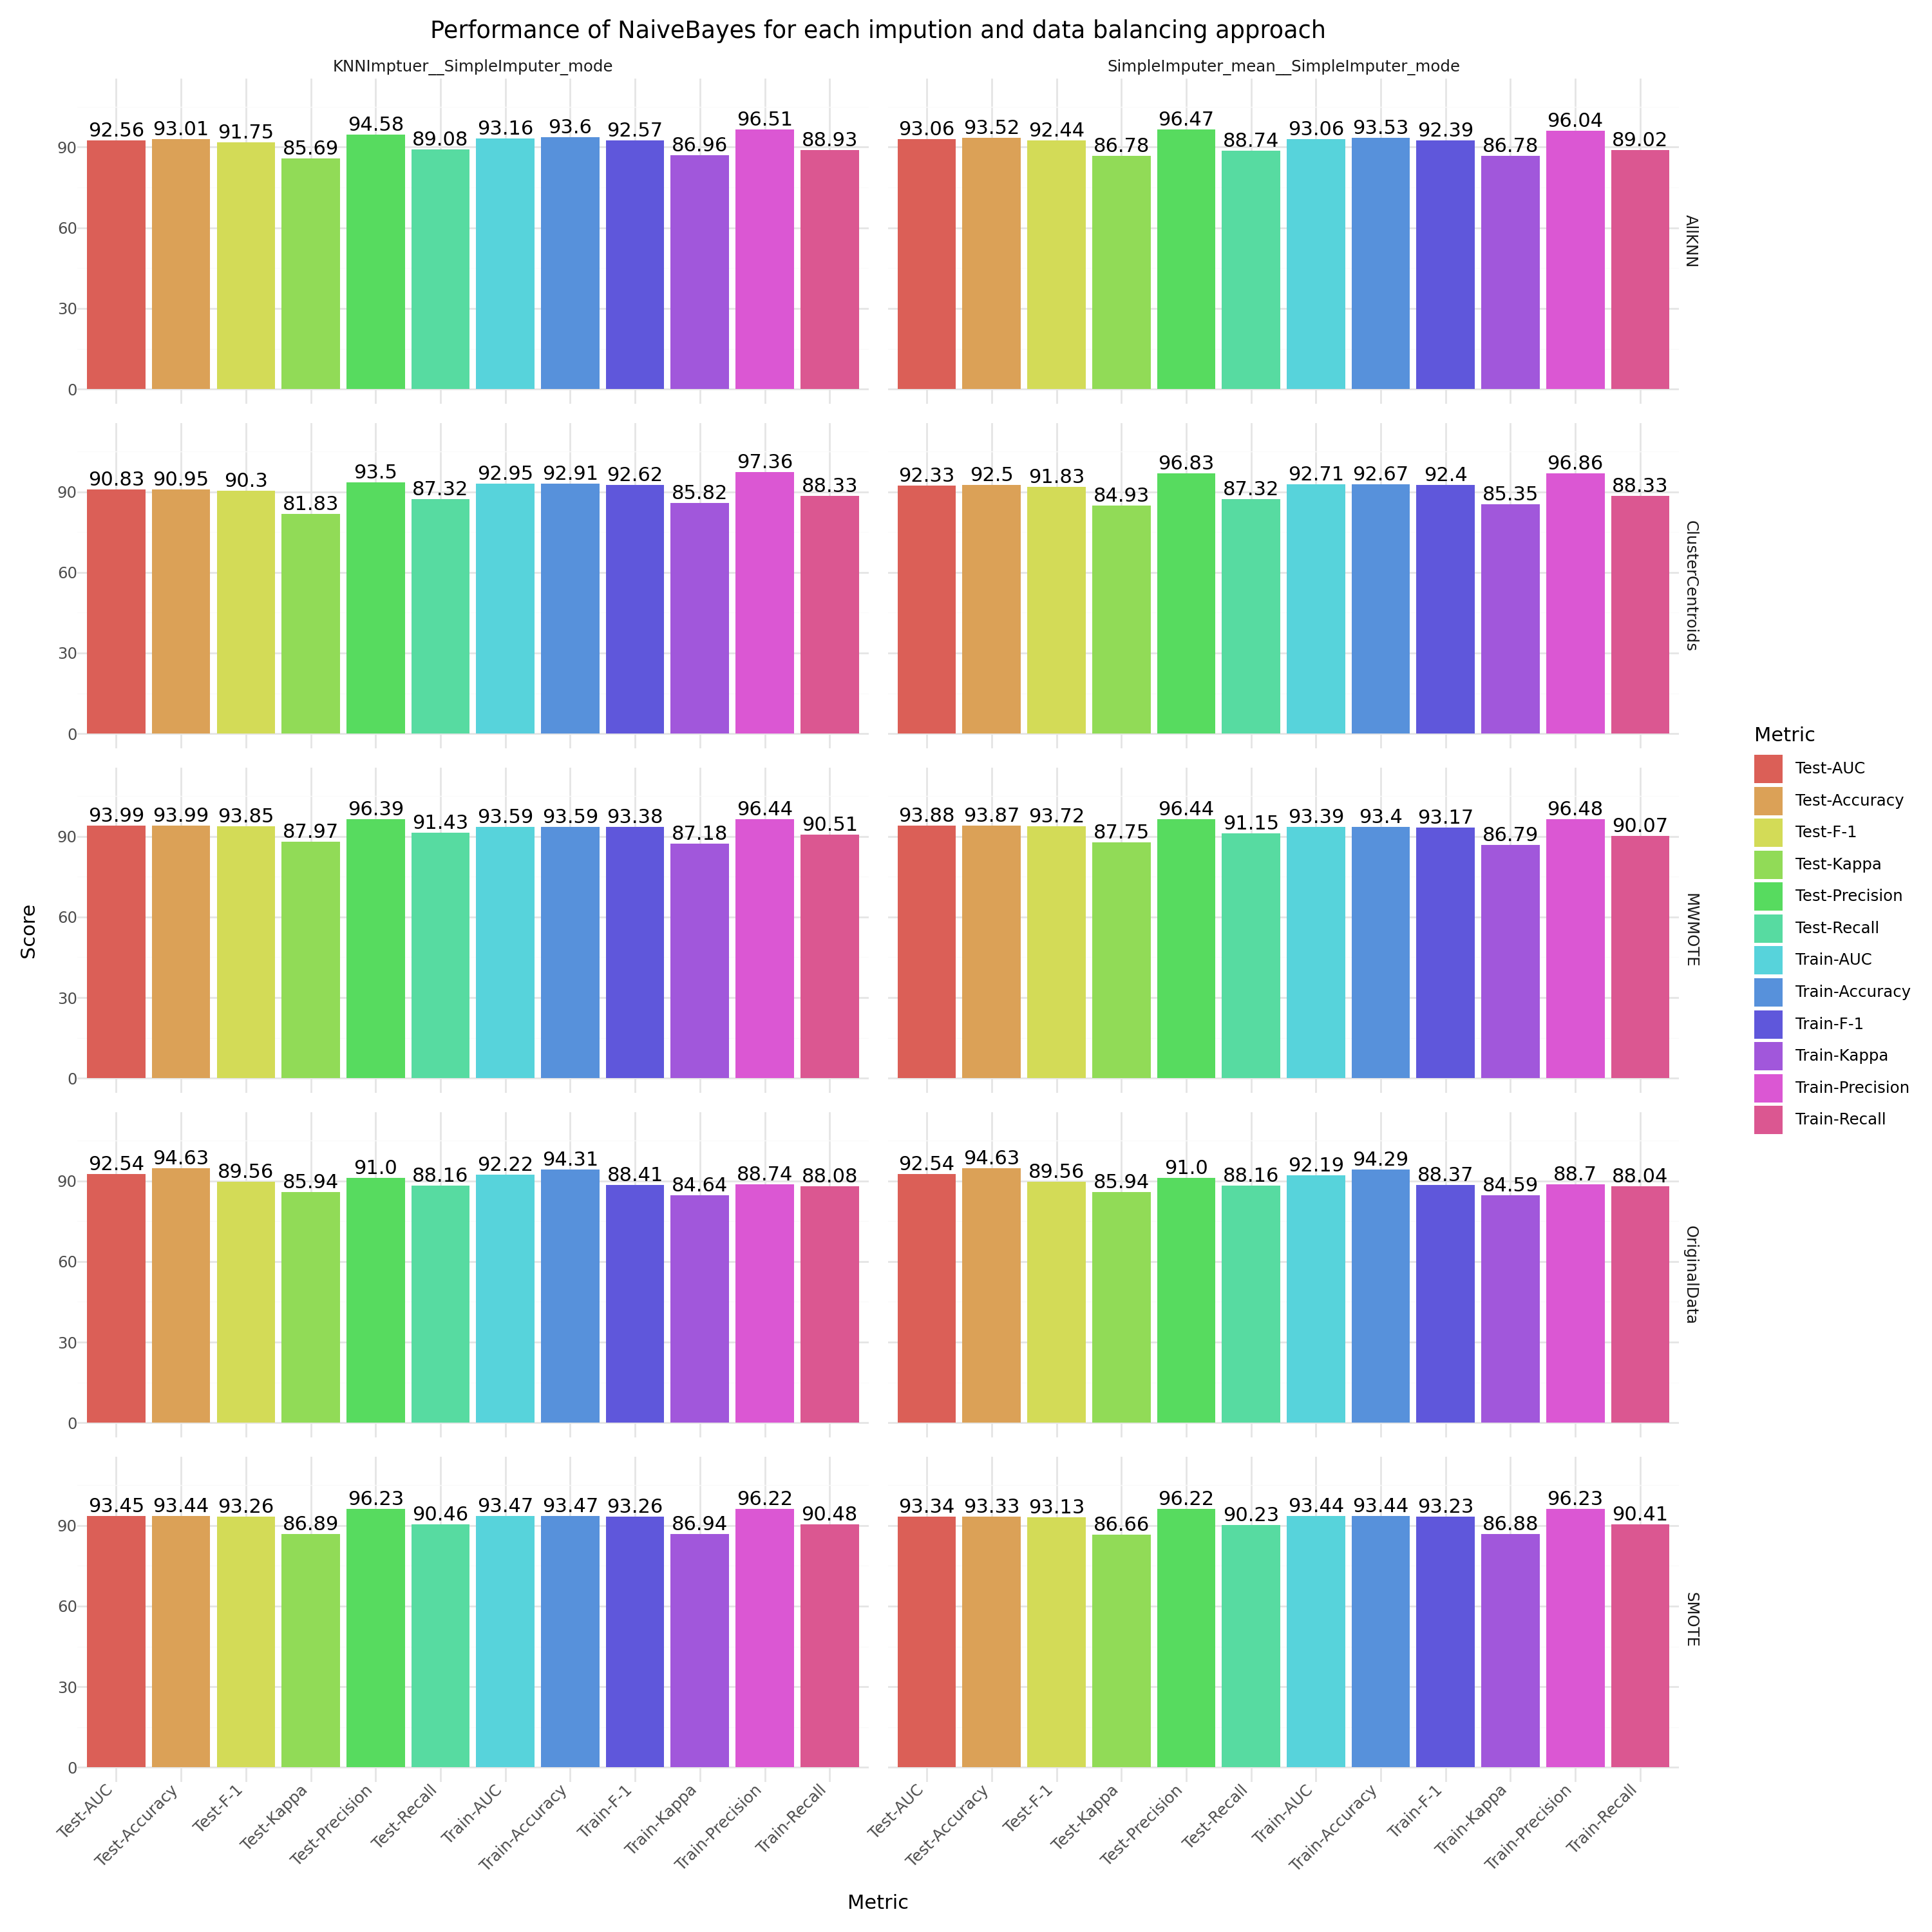

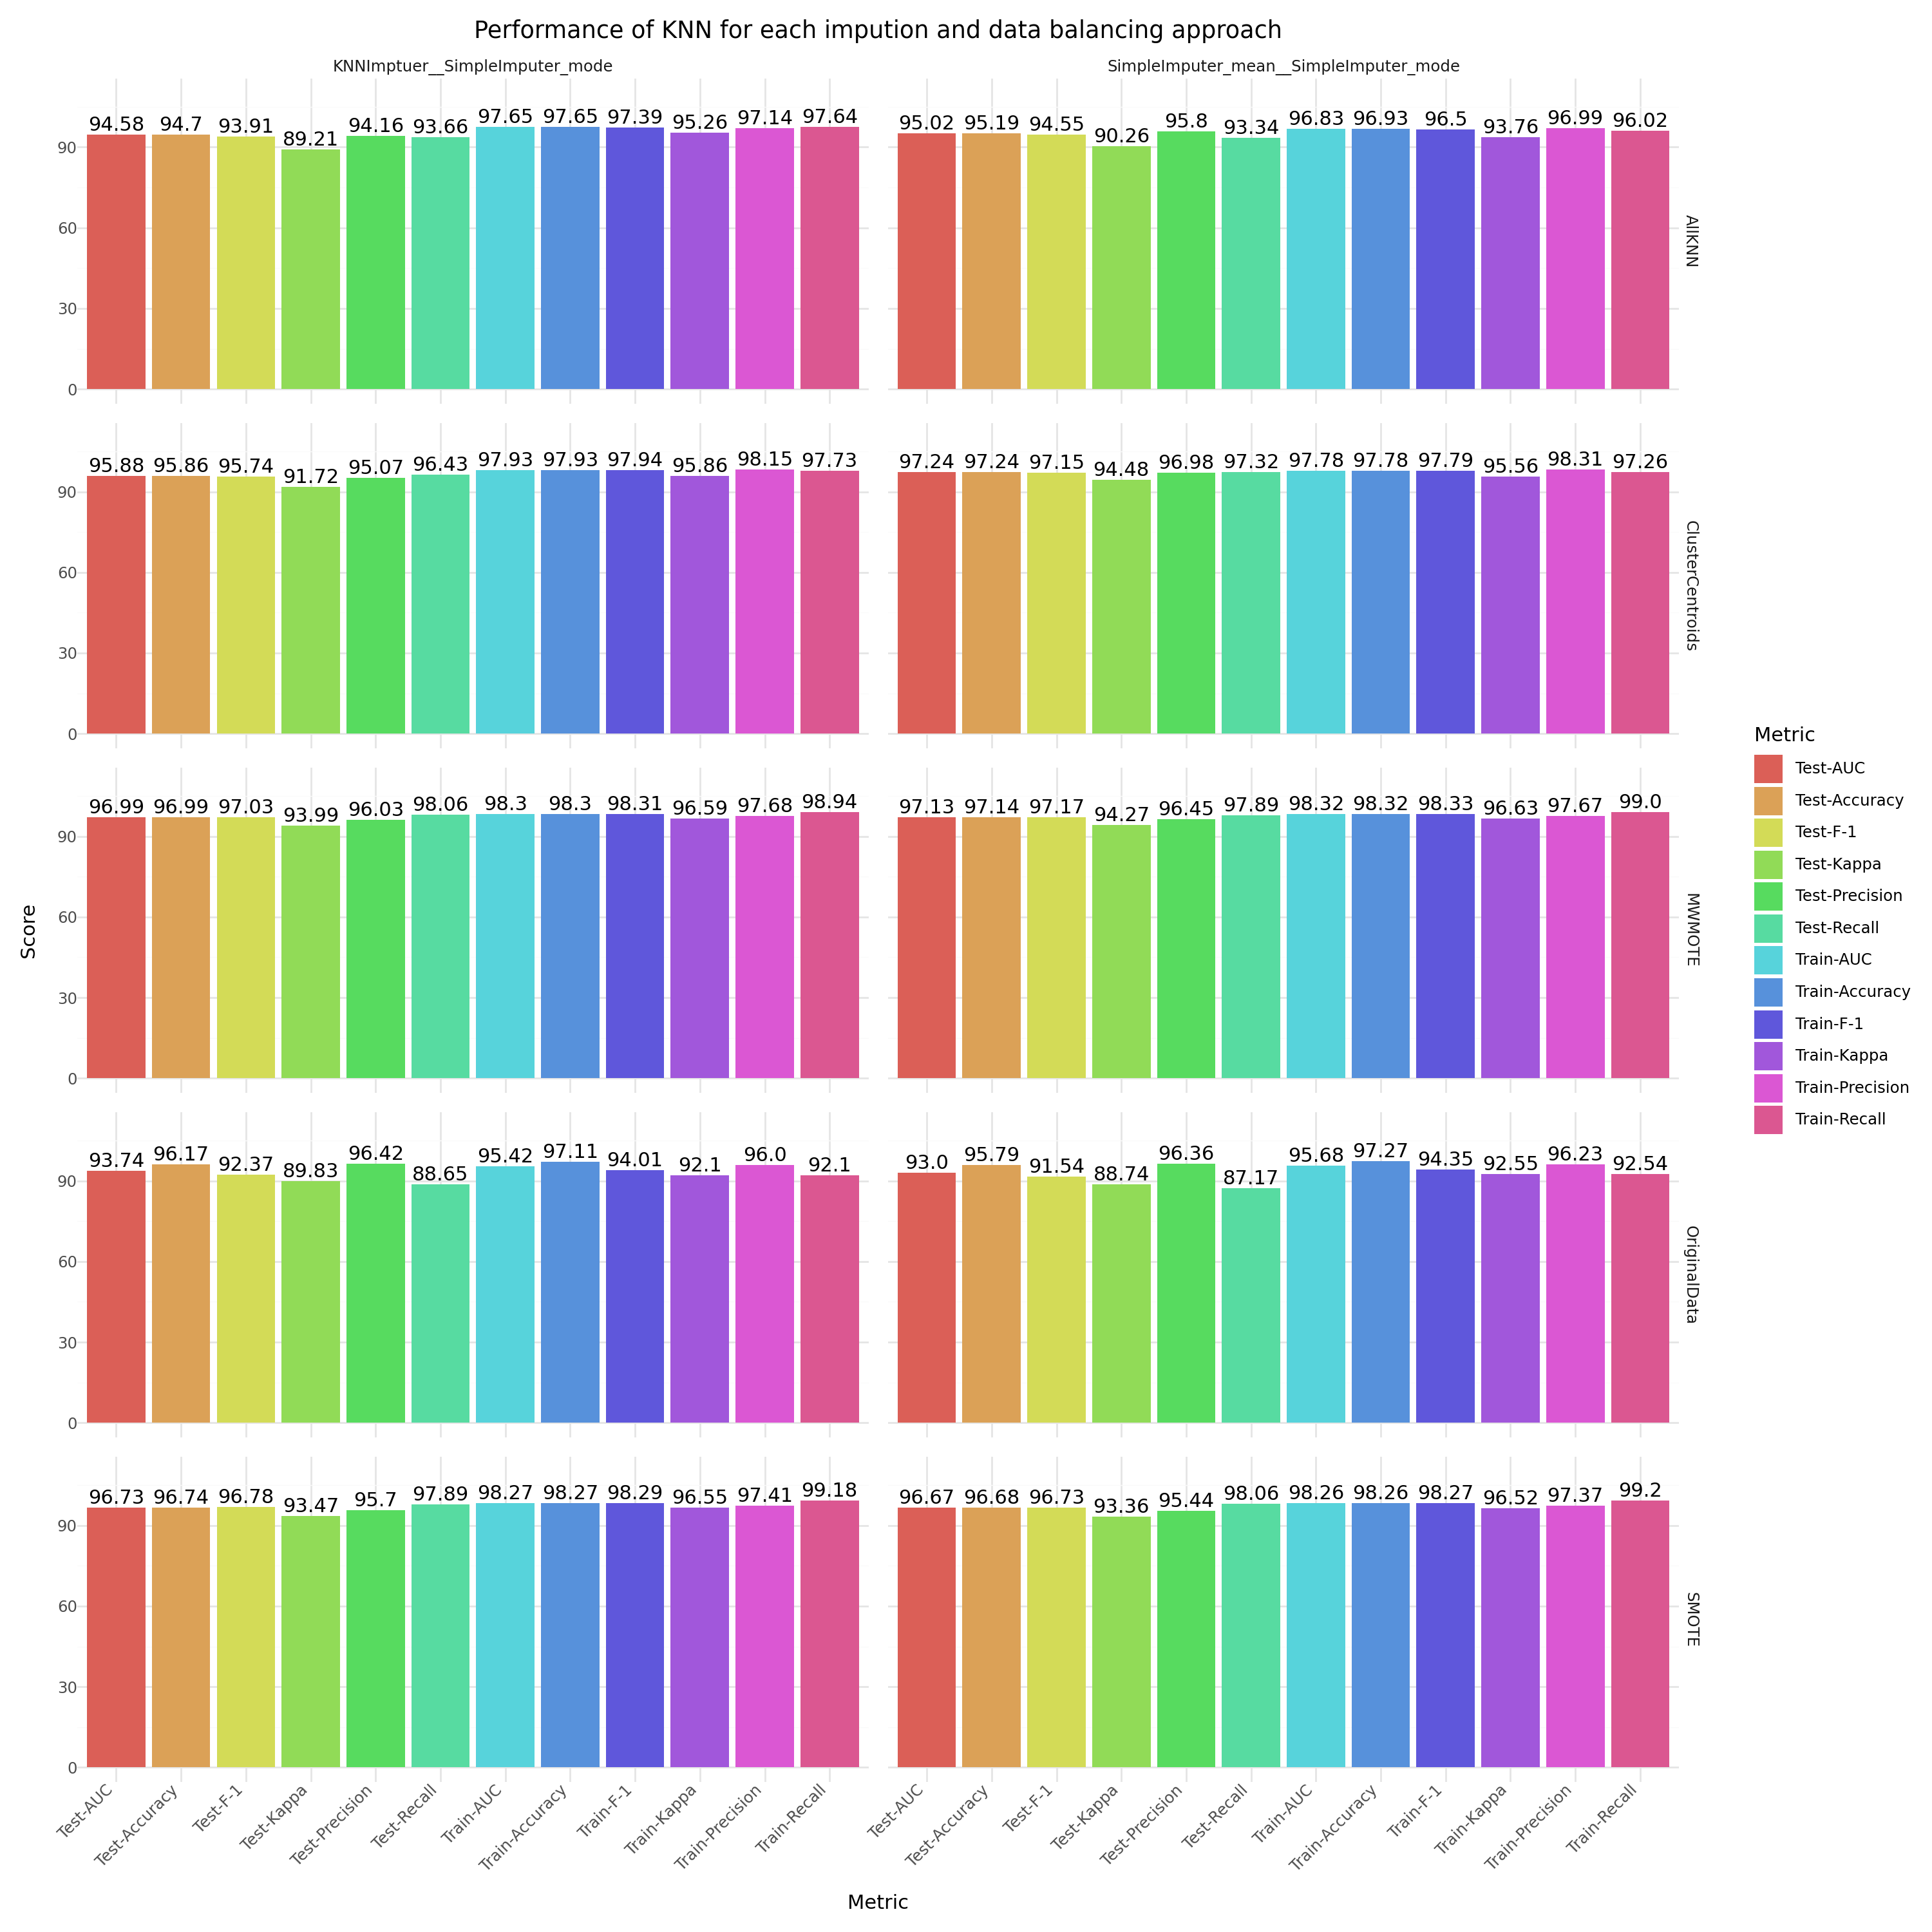

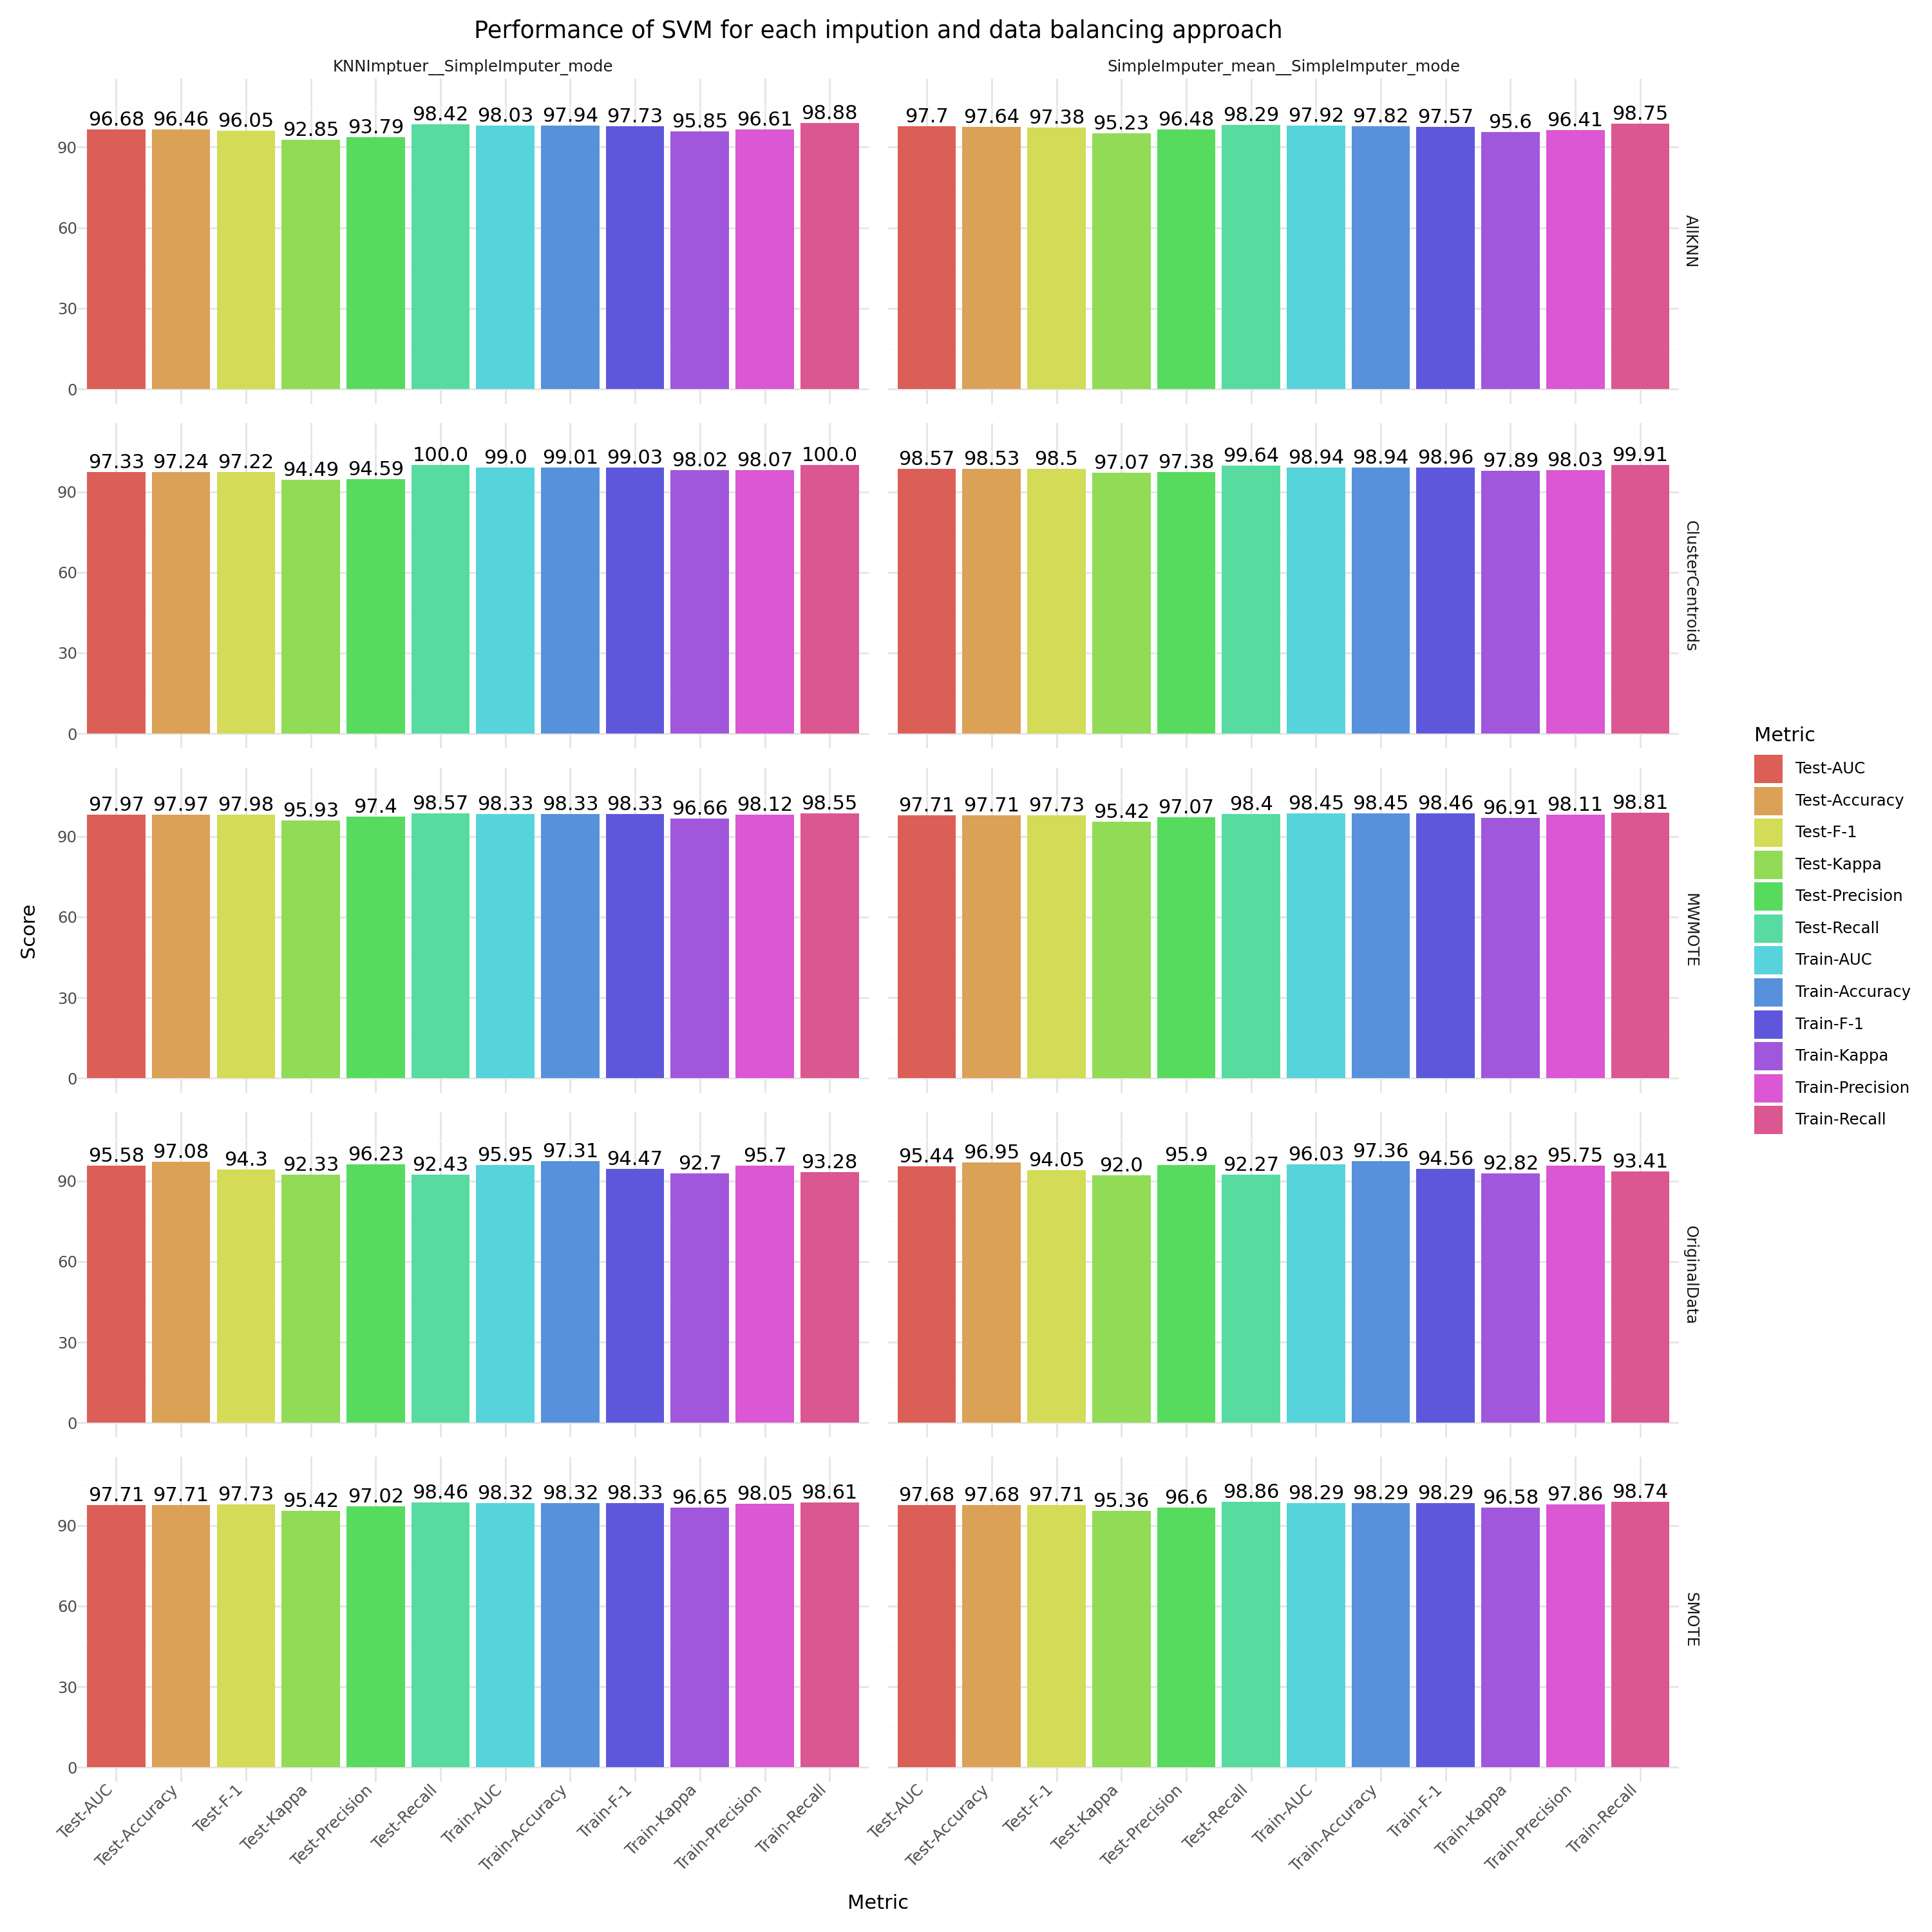

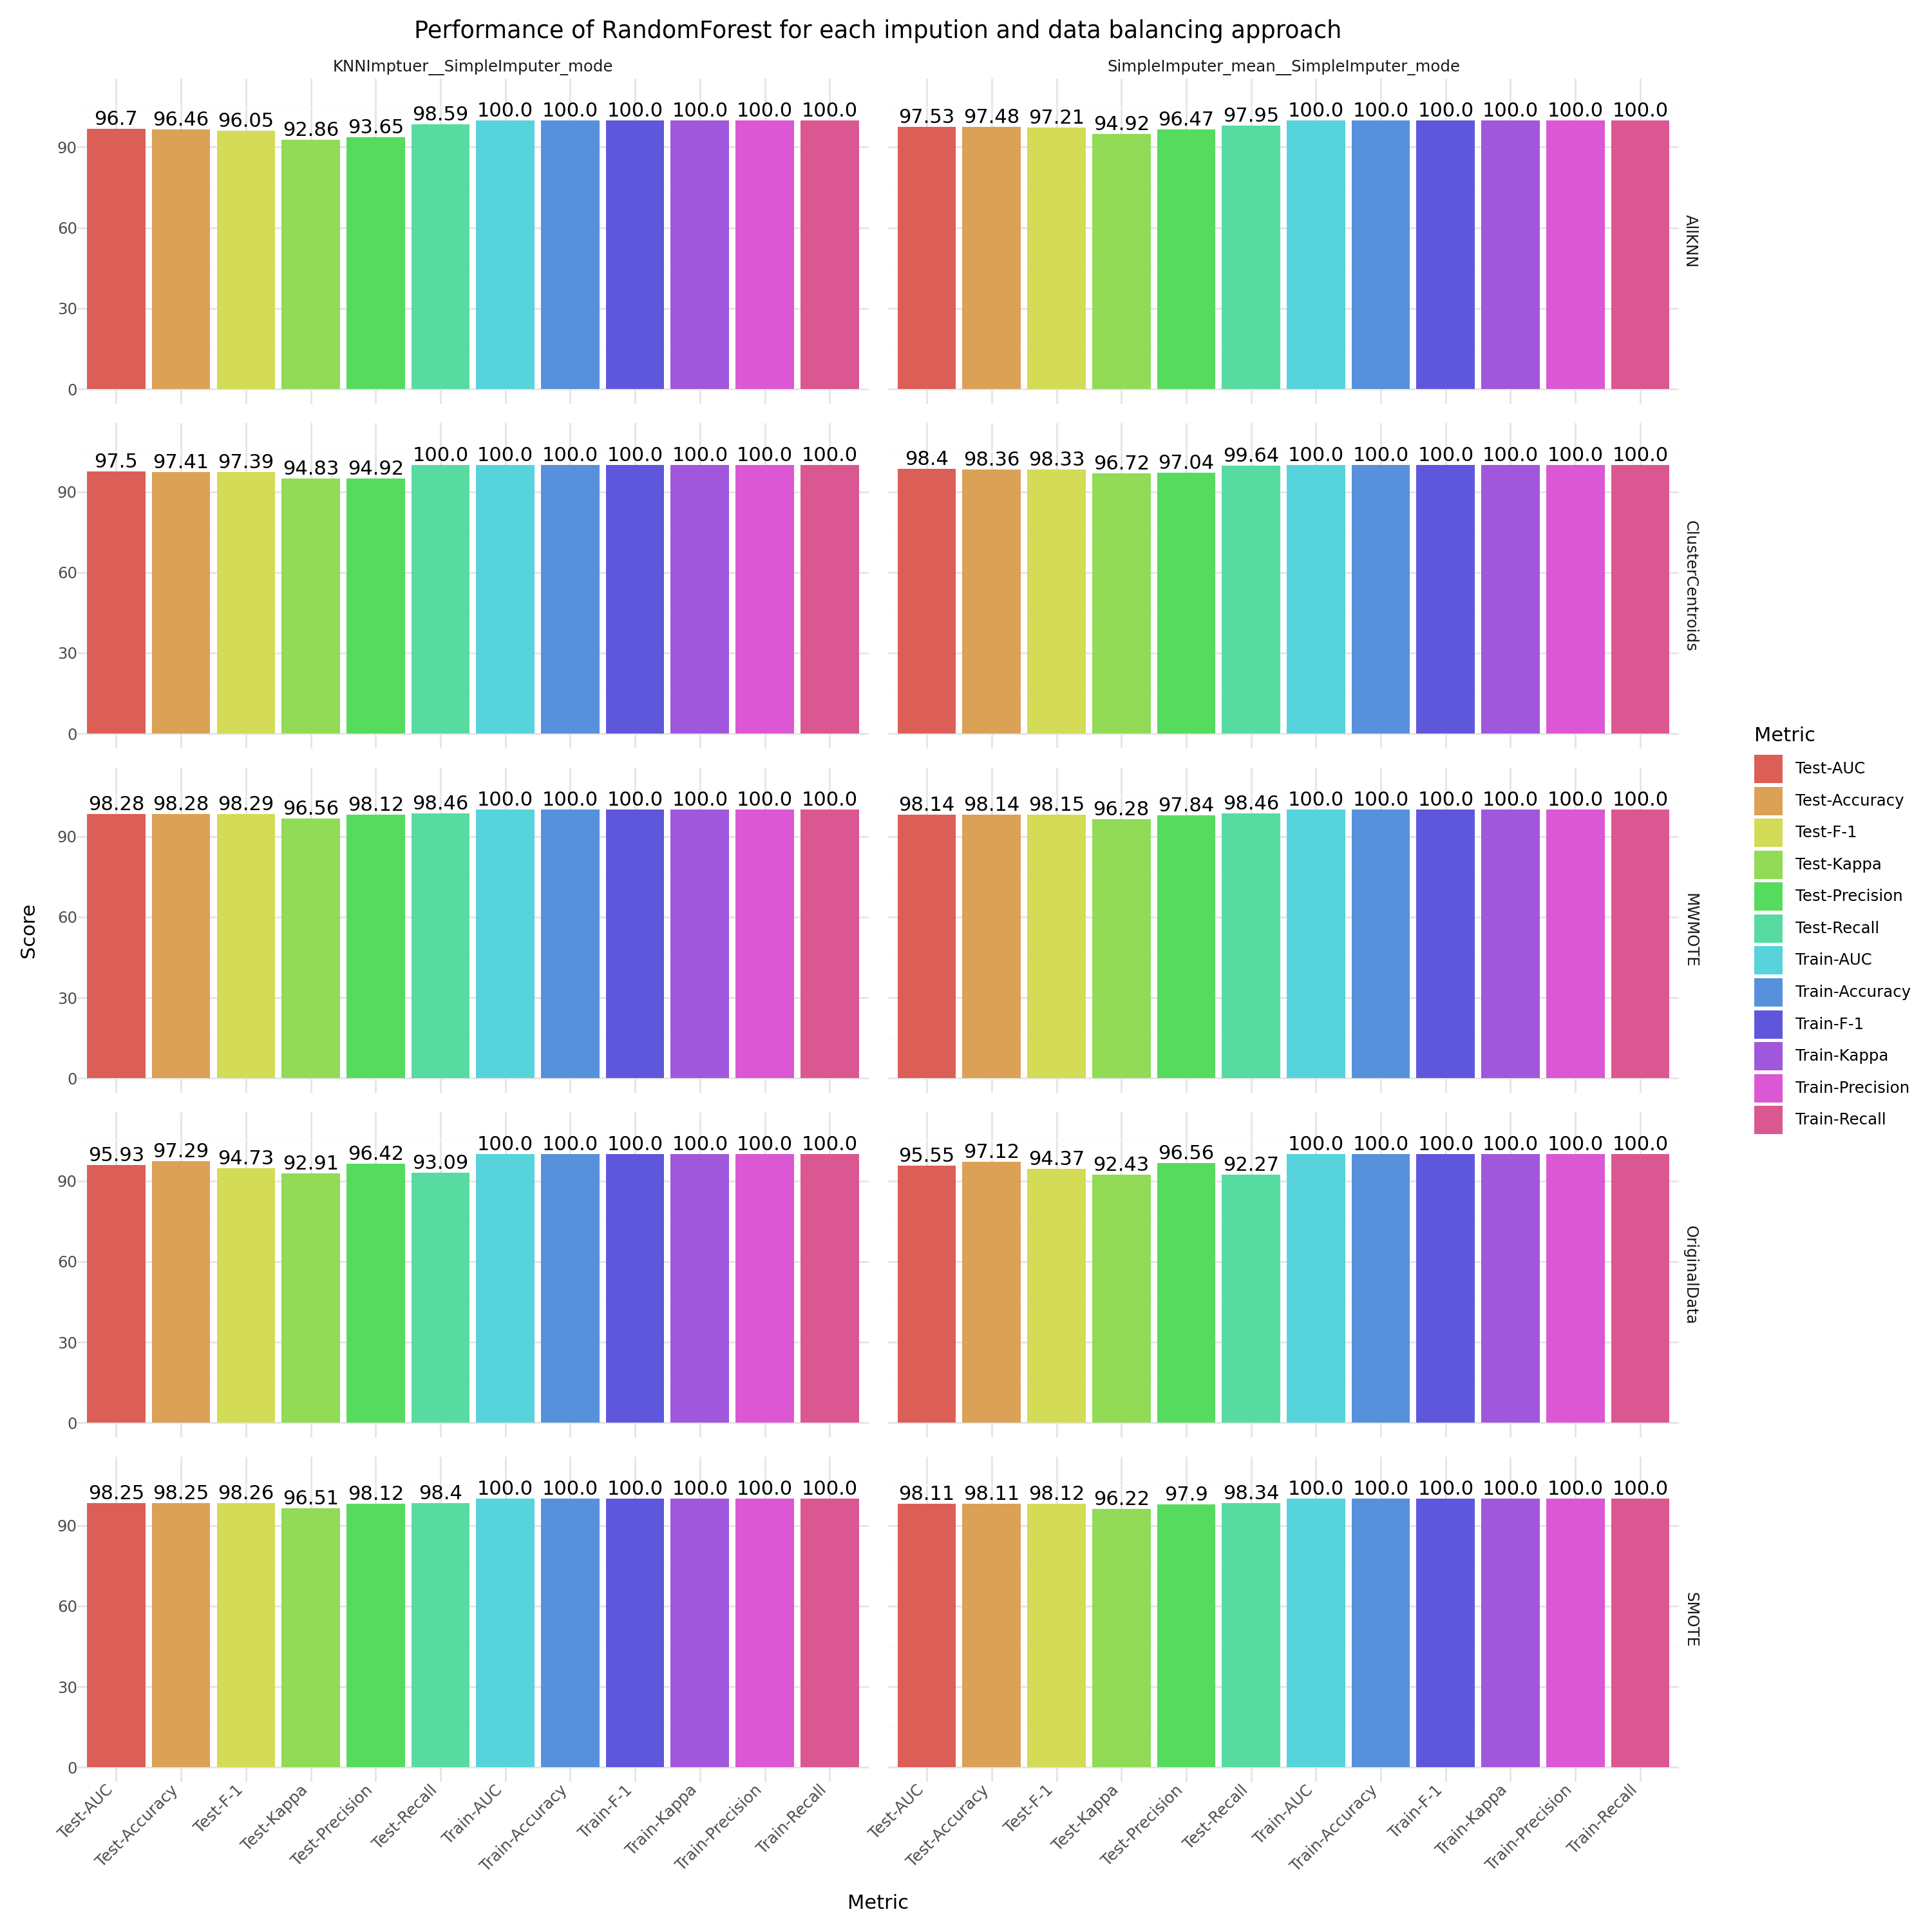

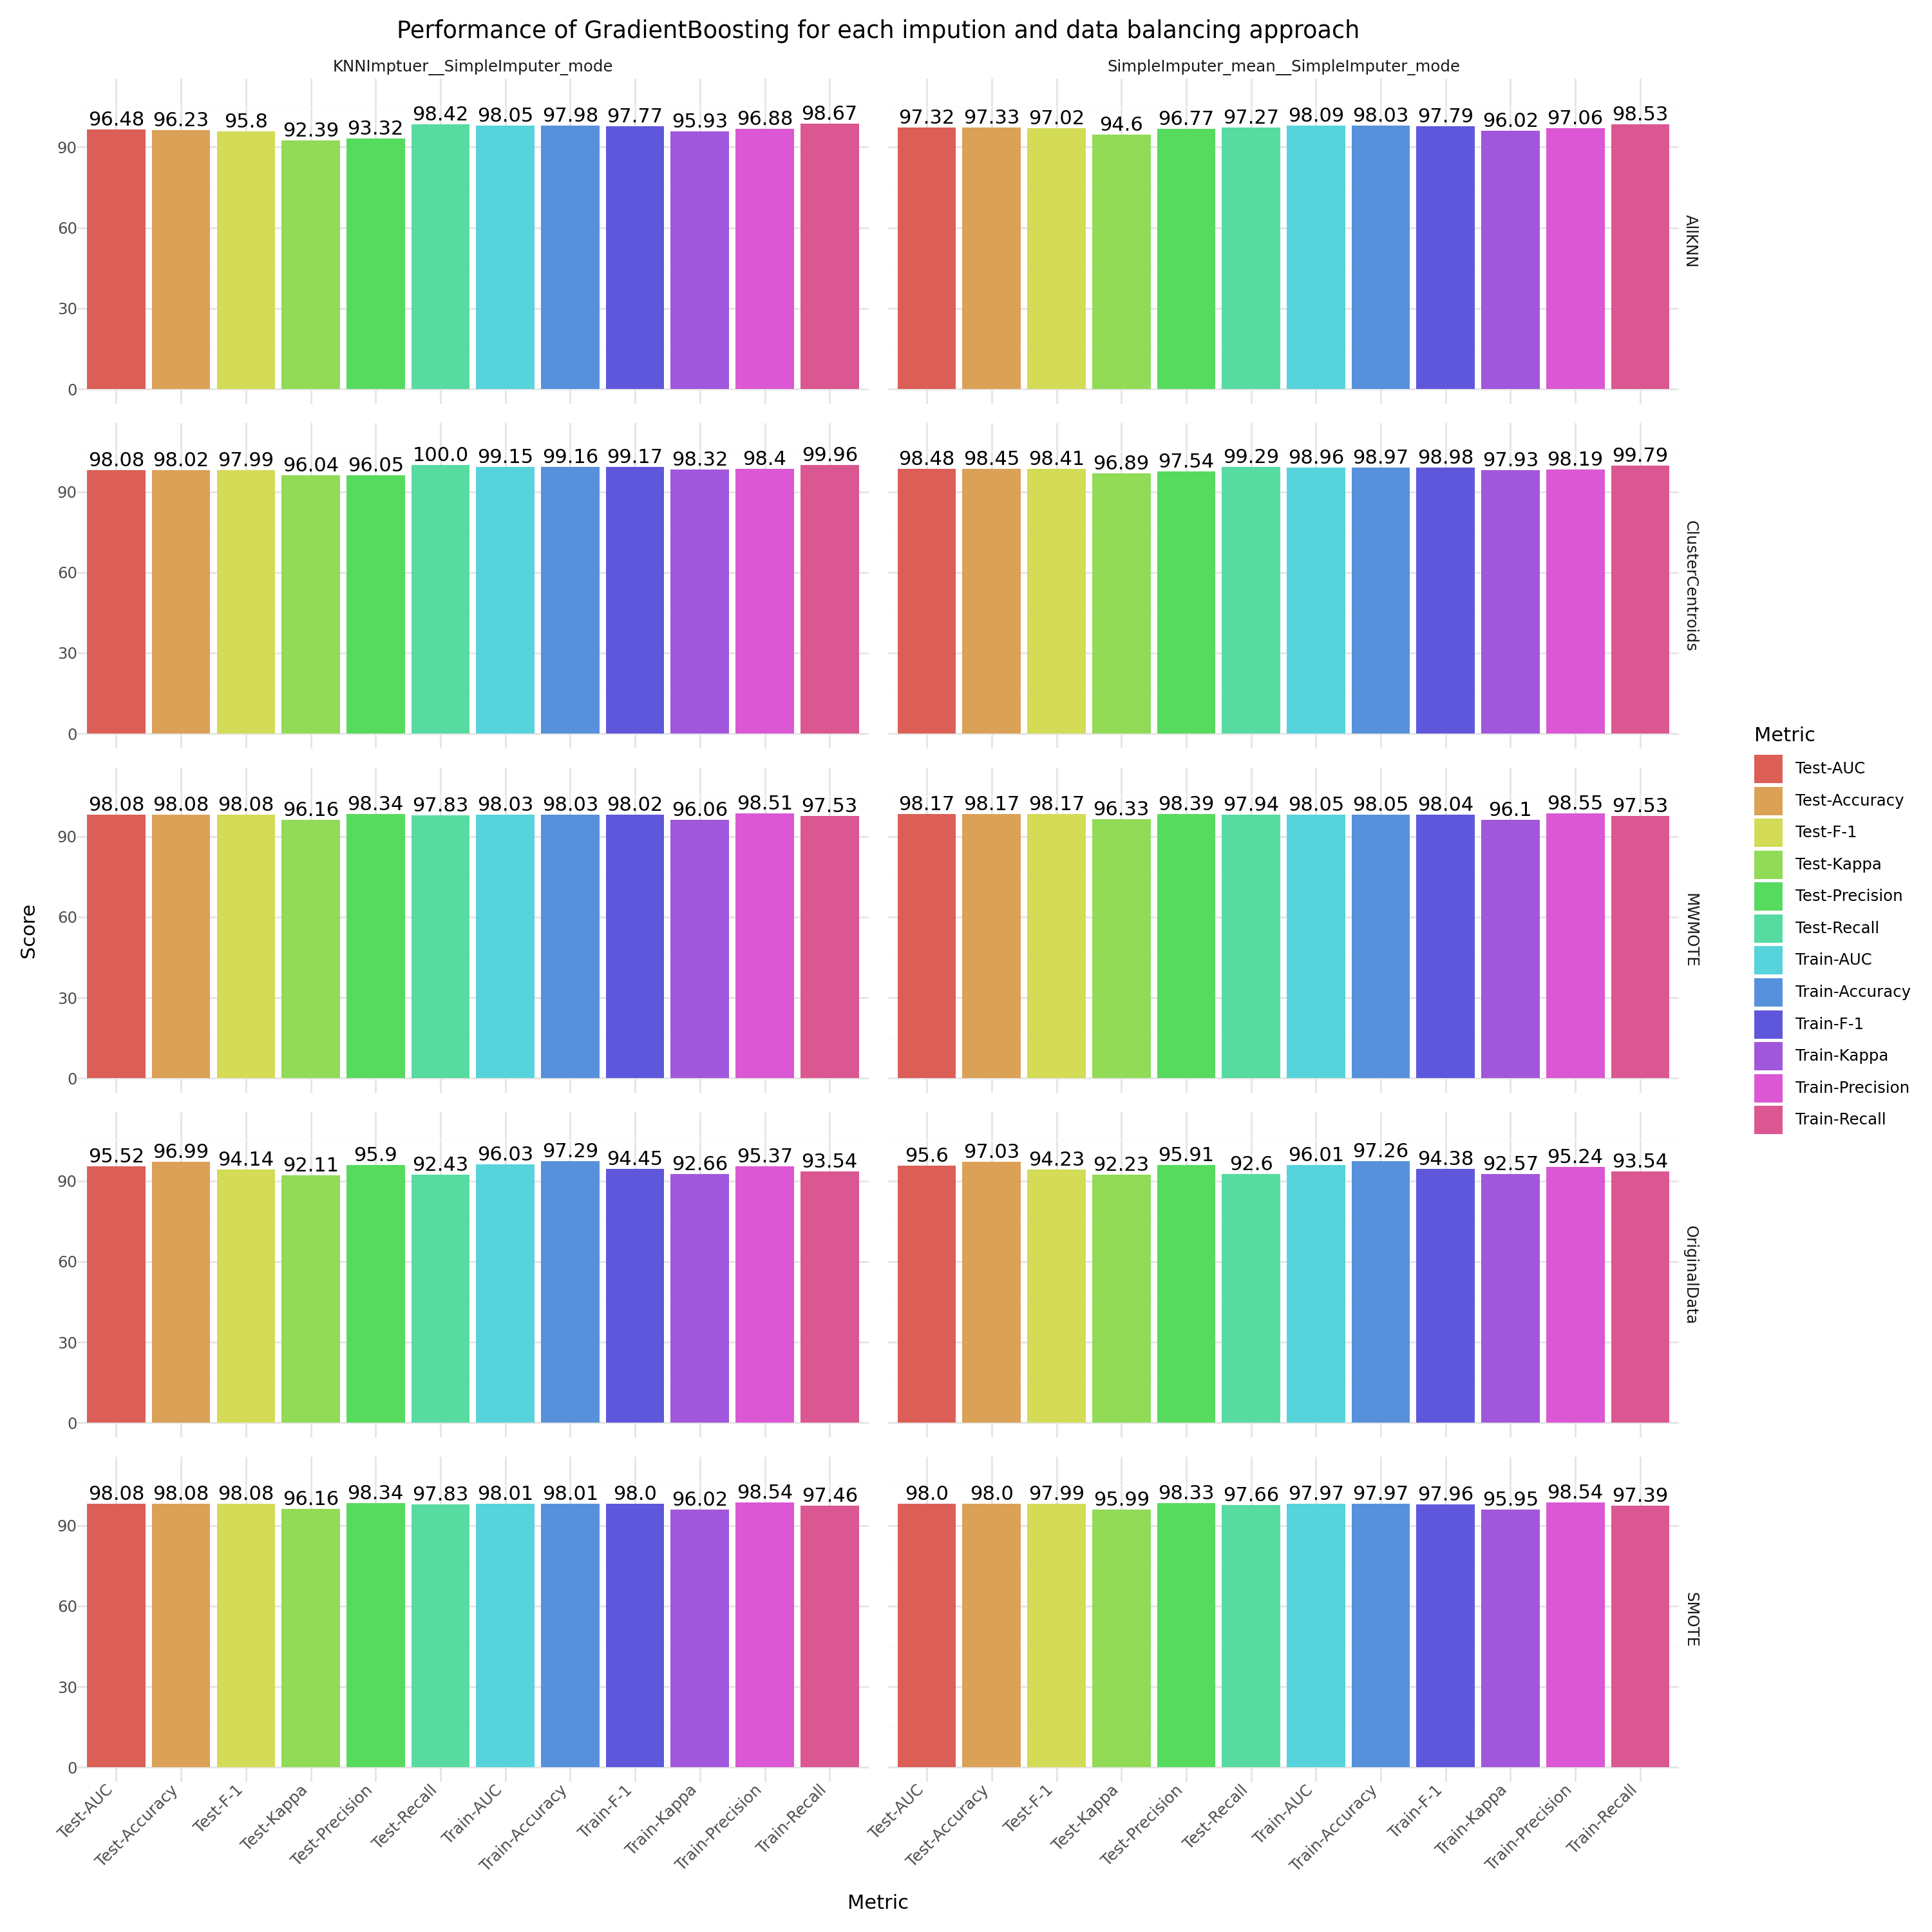

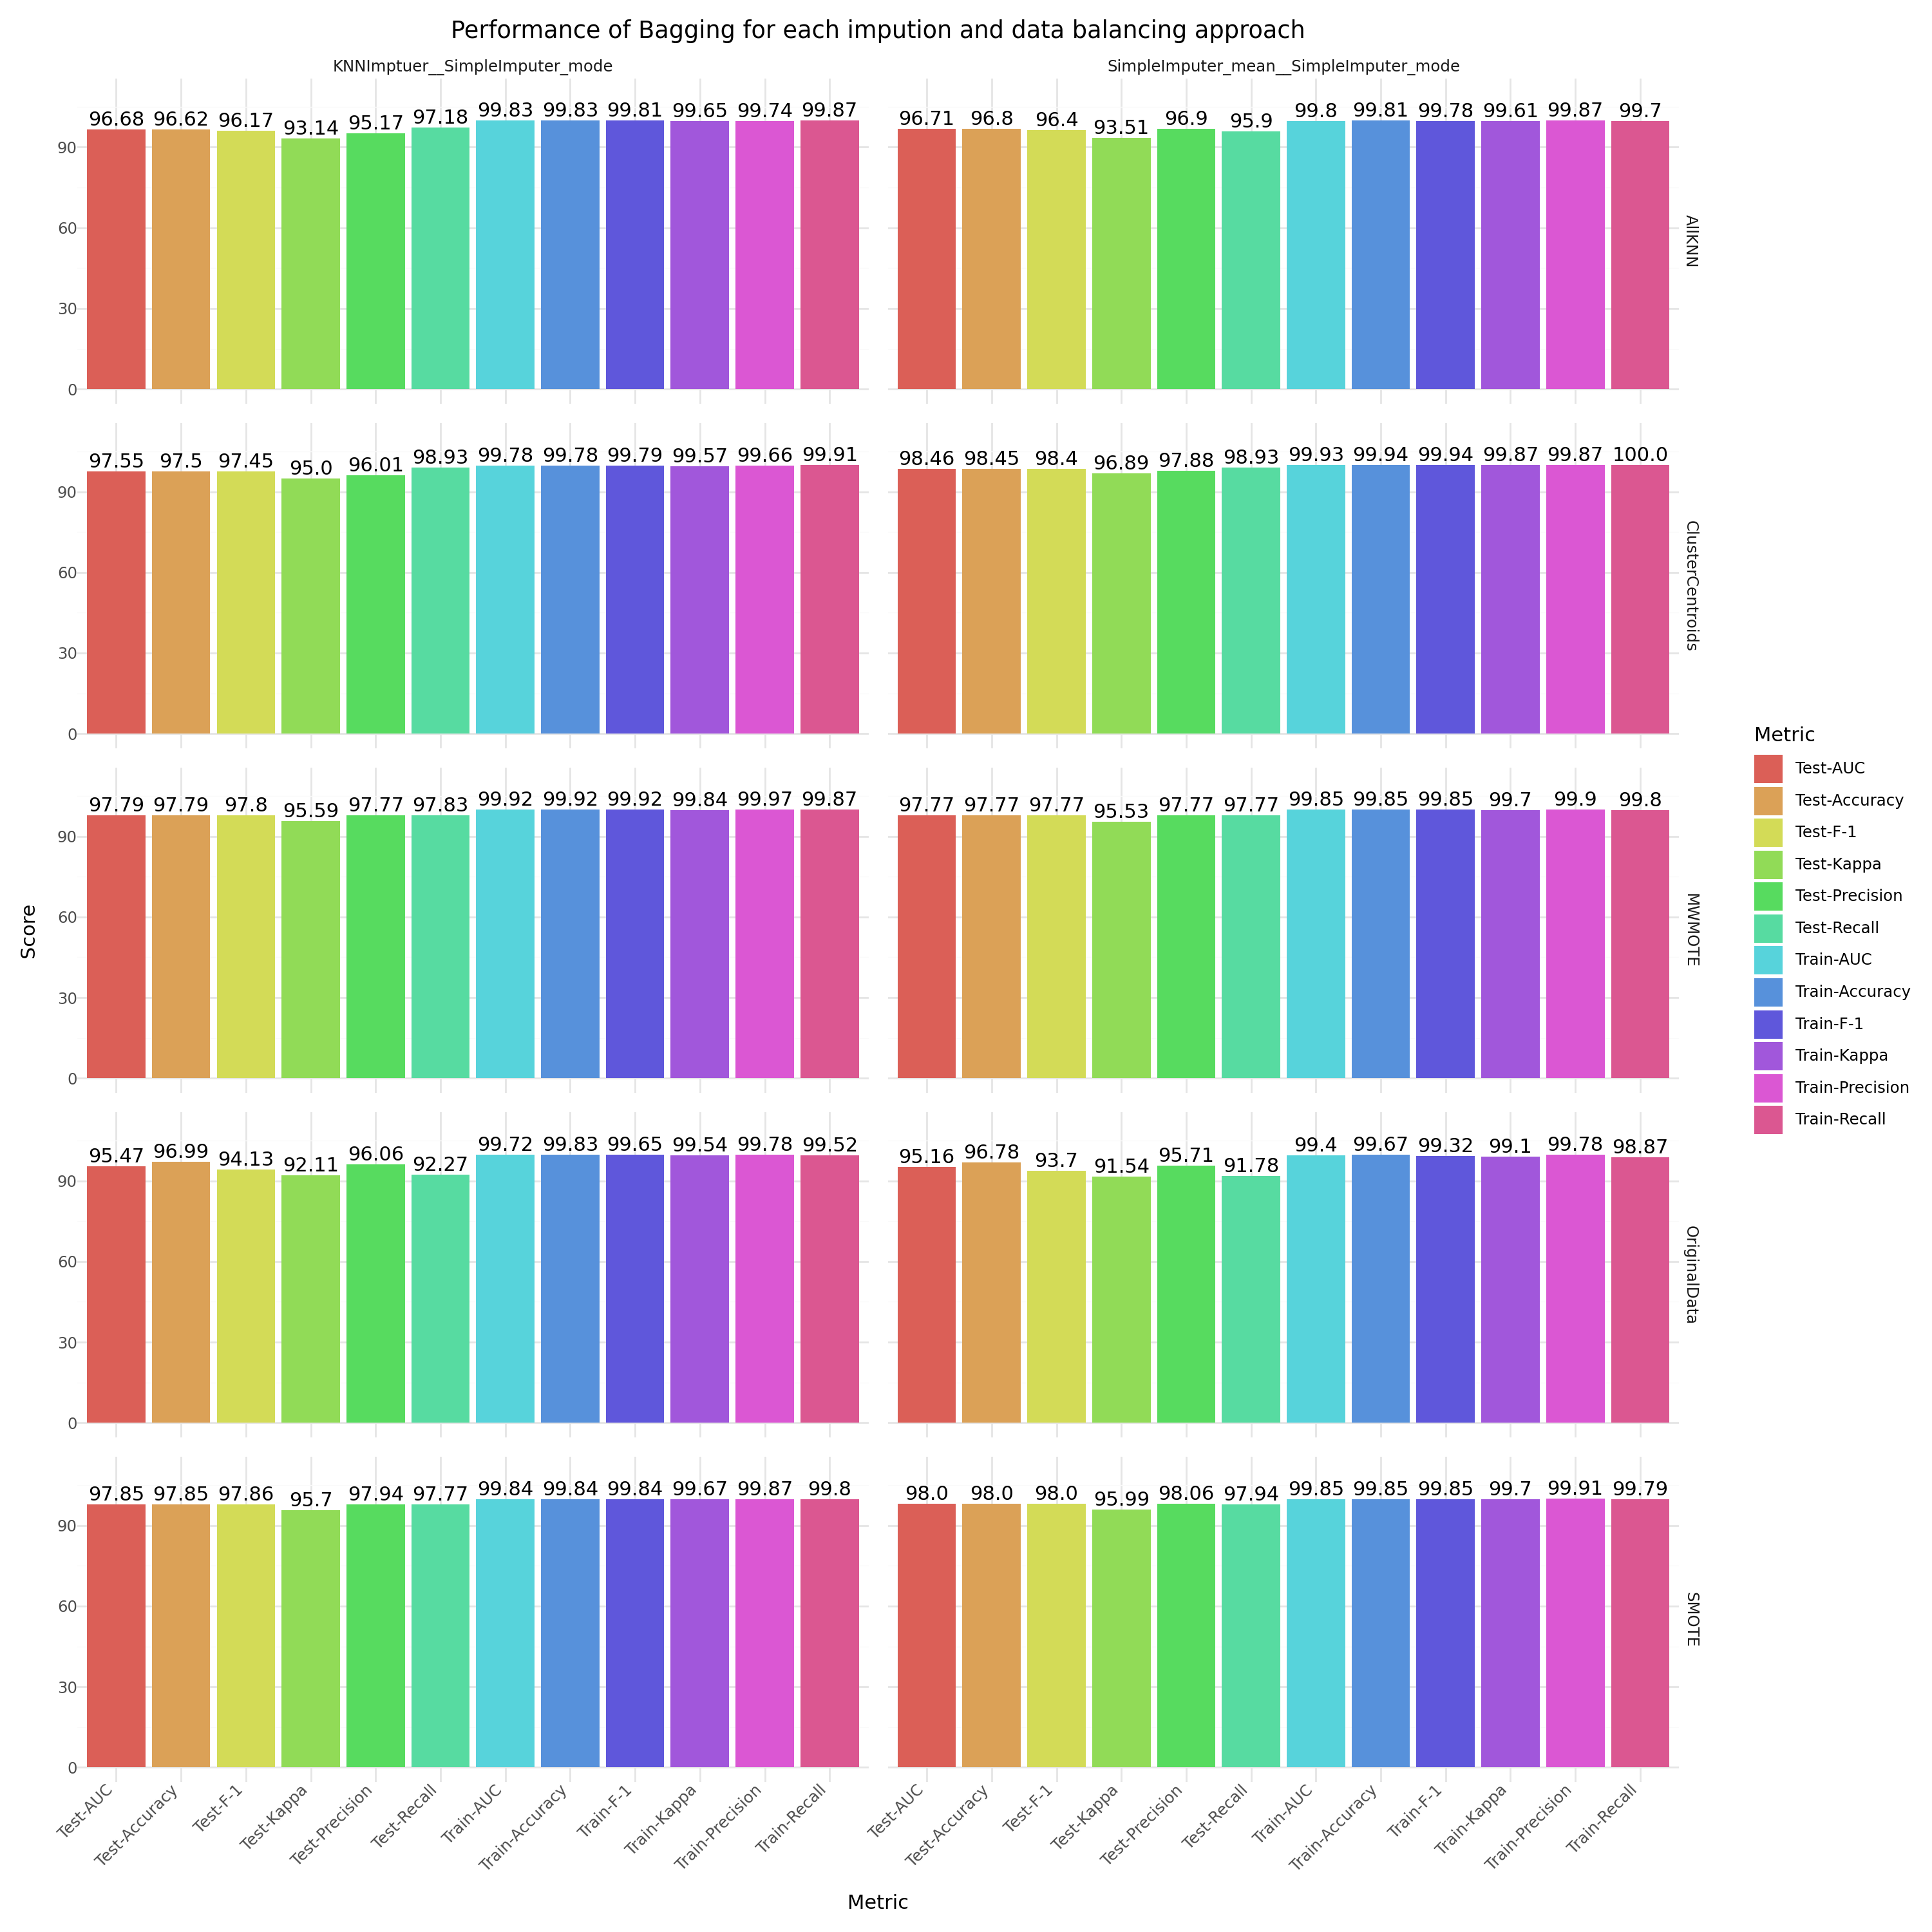

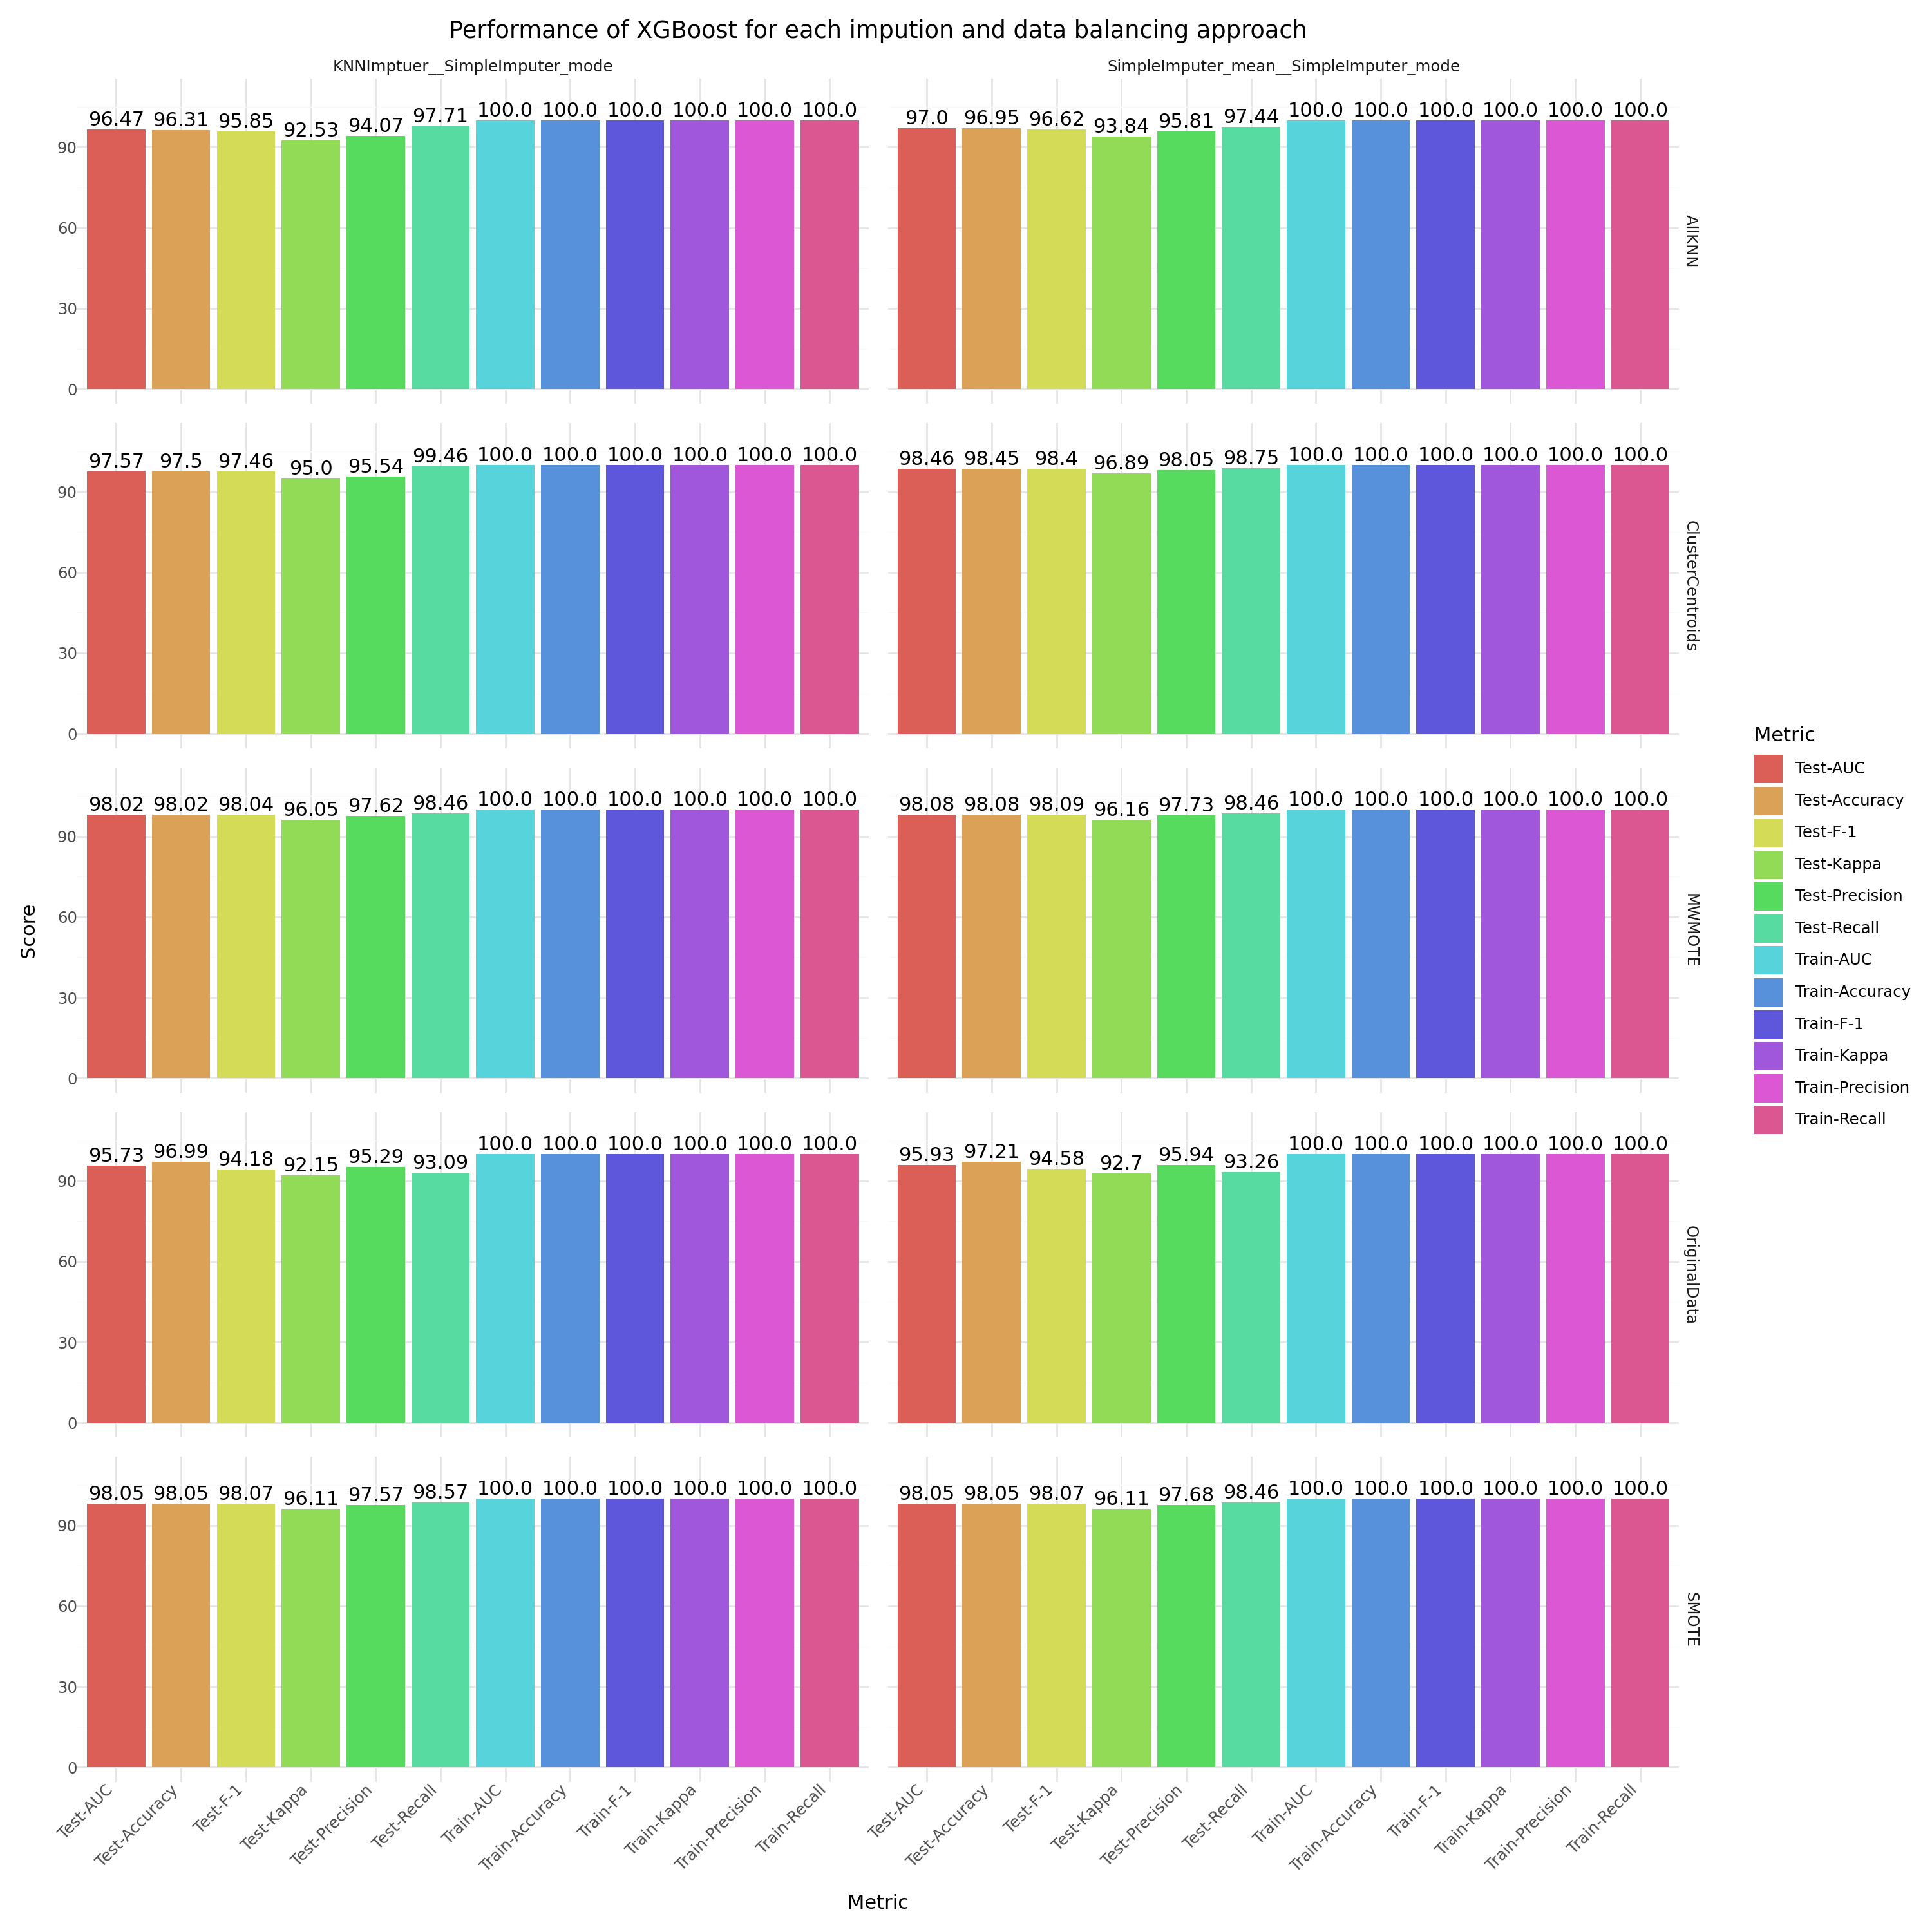

In [8]:
# performance for each algorithm with combination of different imputing technique and balancing approach
plot_for_each_algorithm(performances_df)

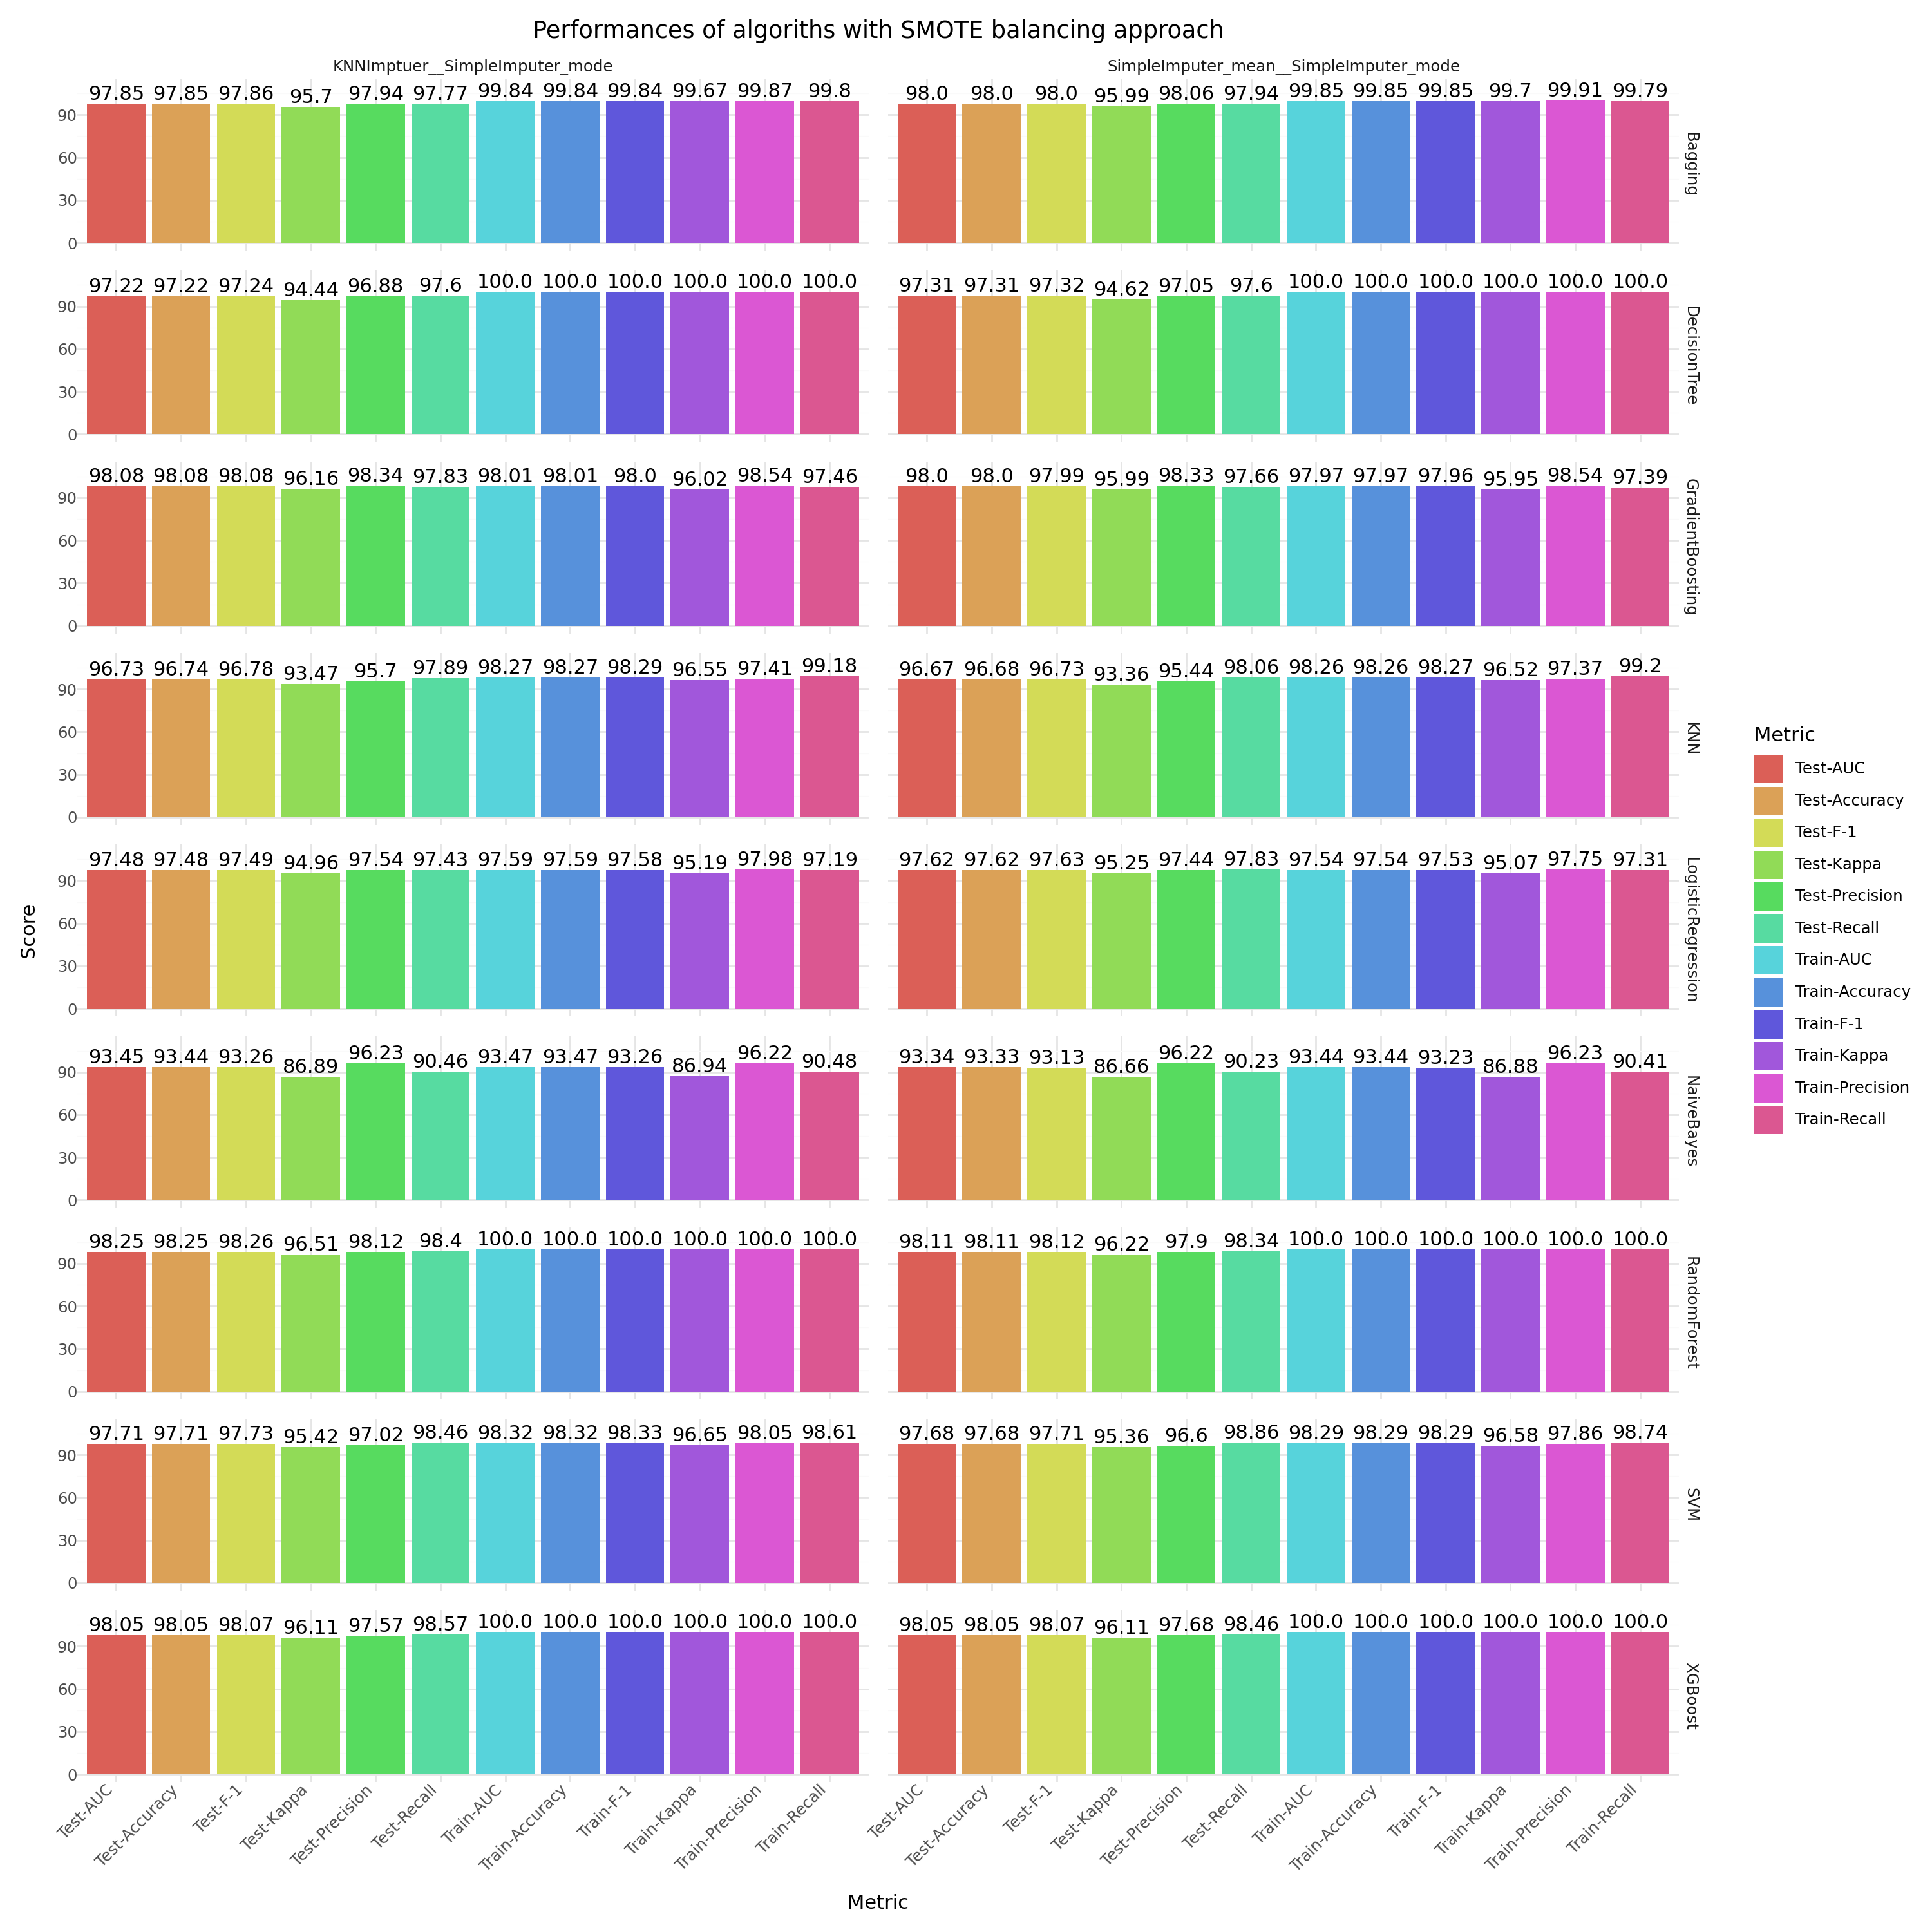

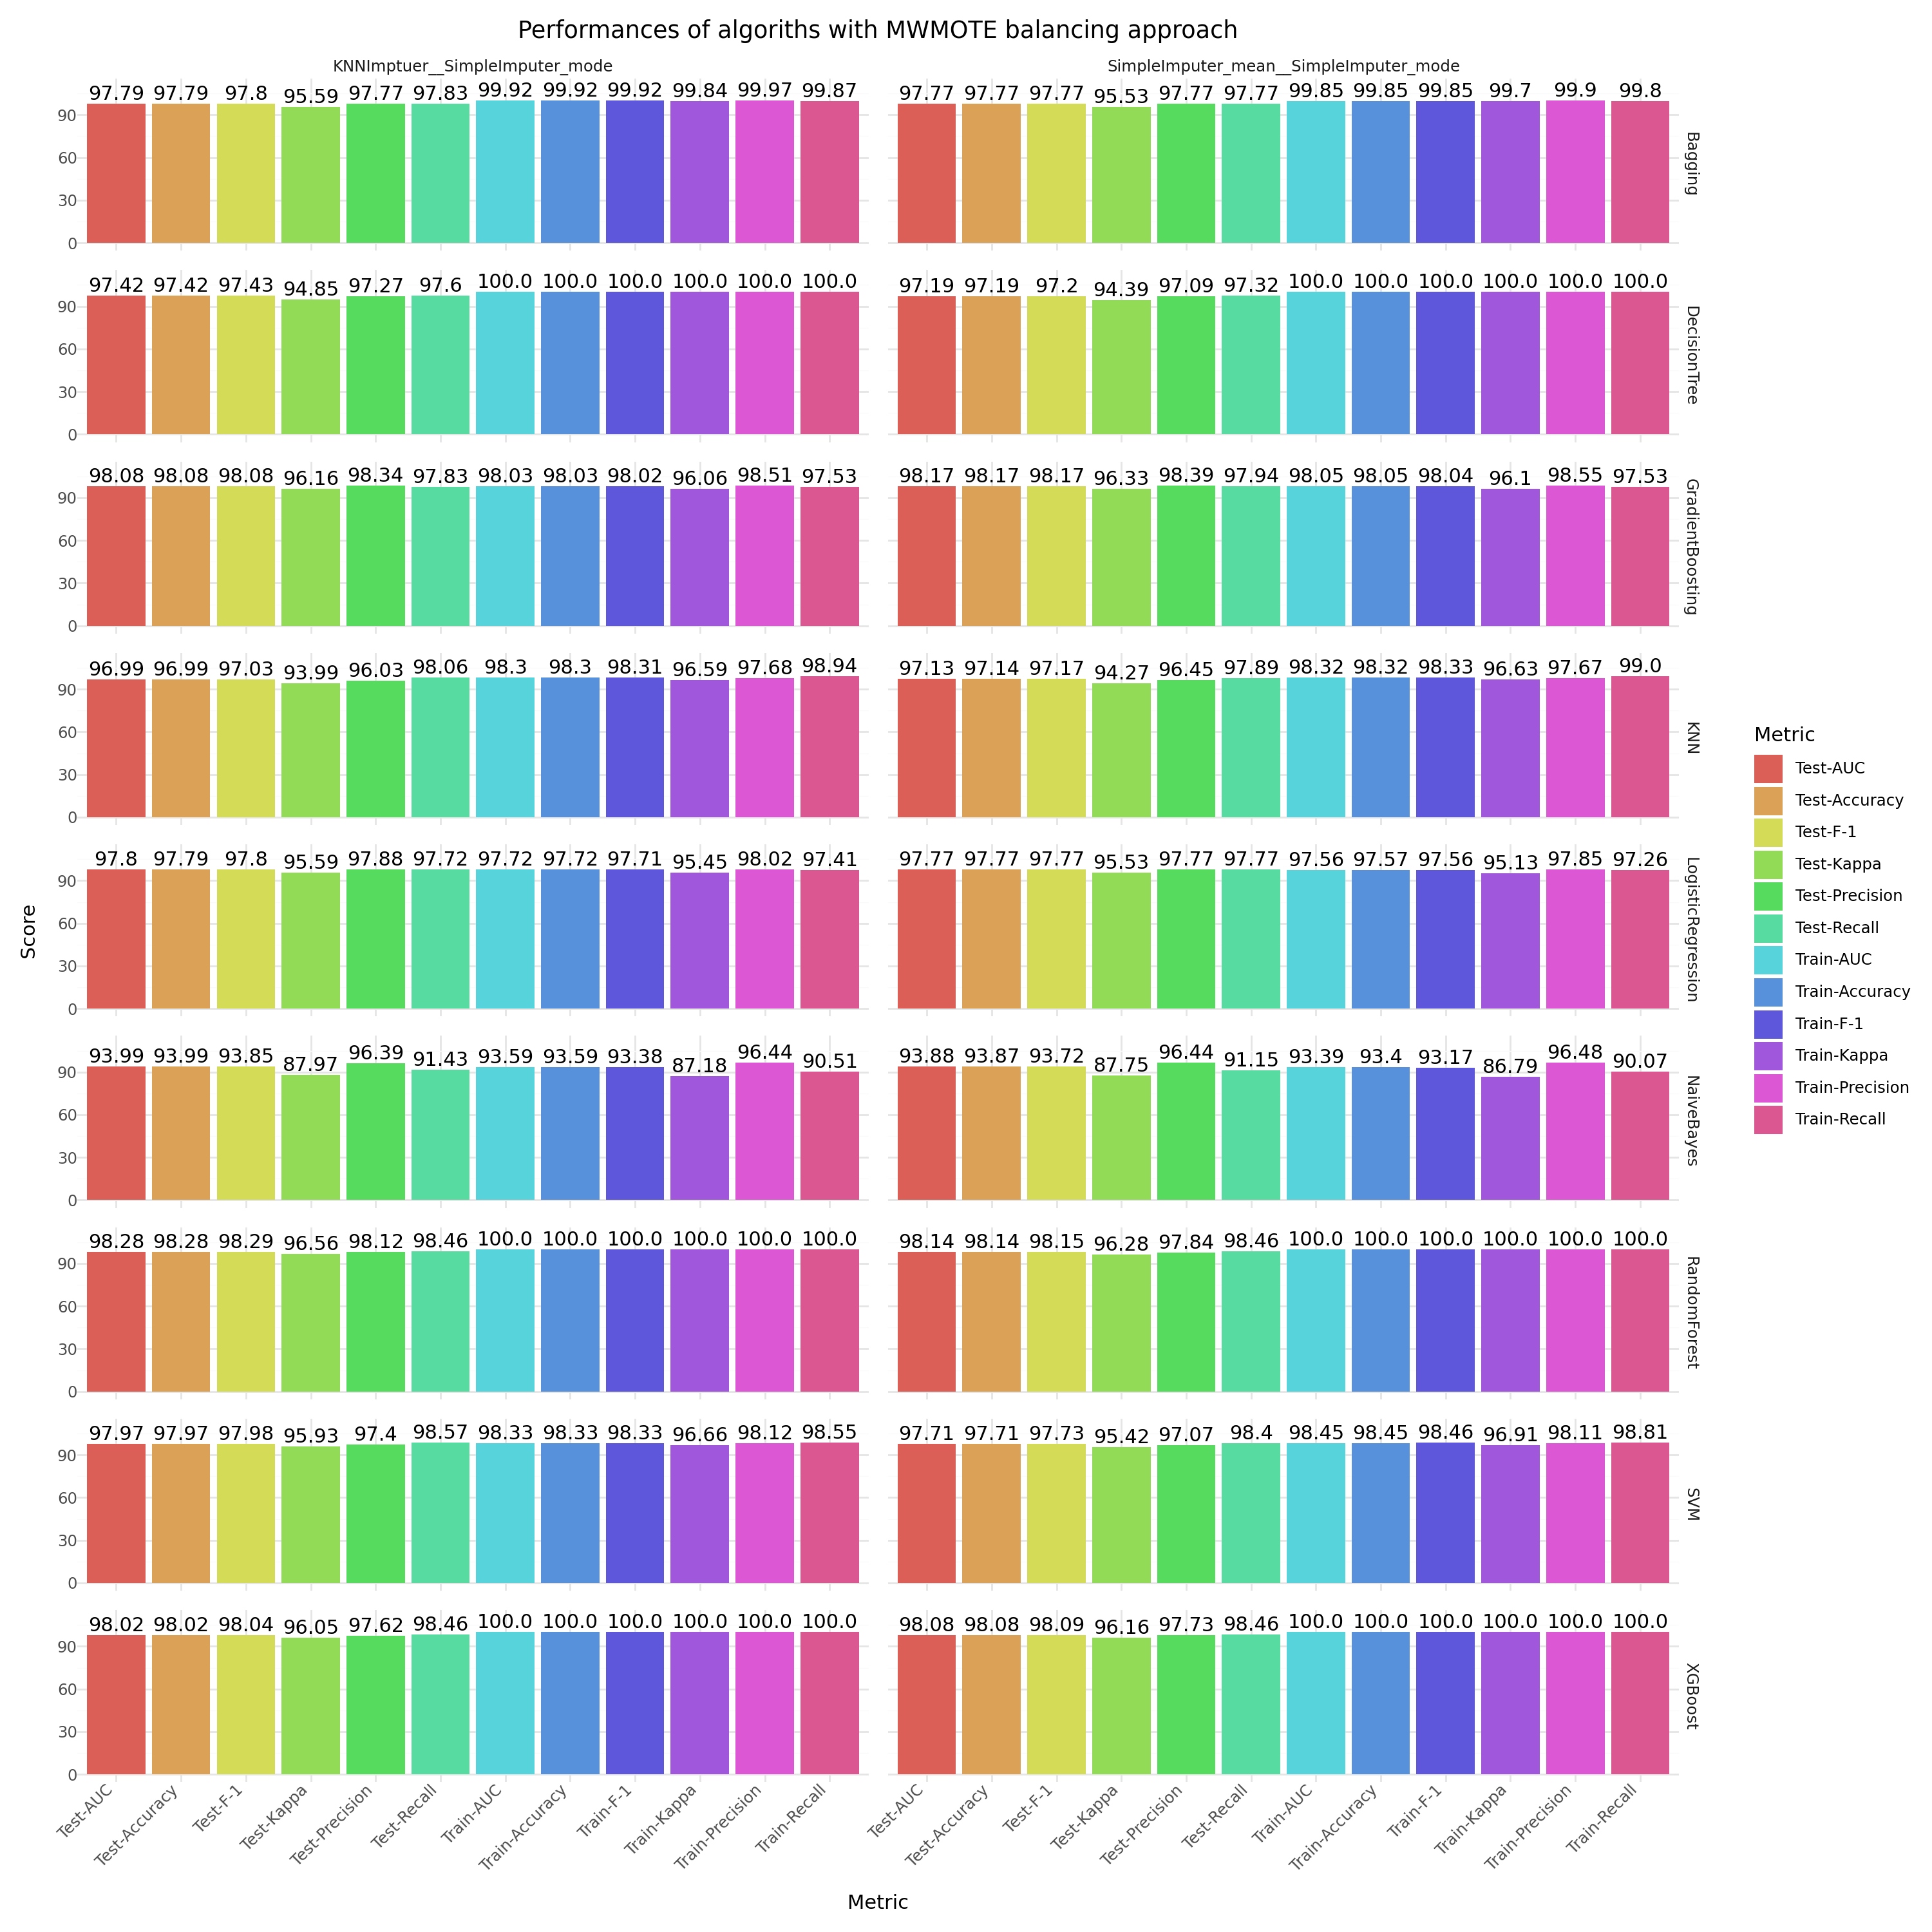

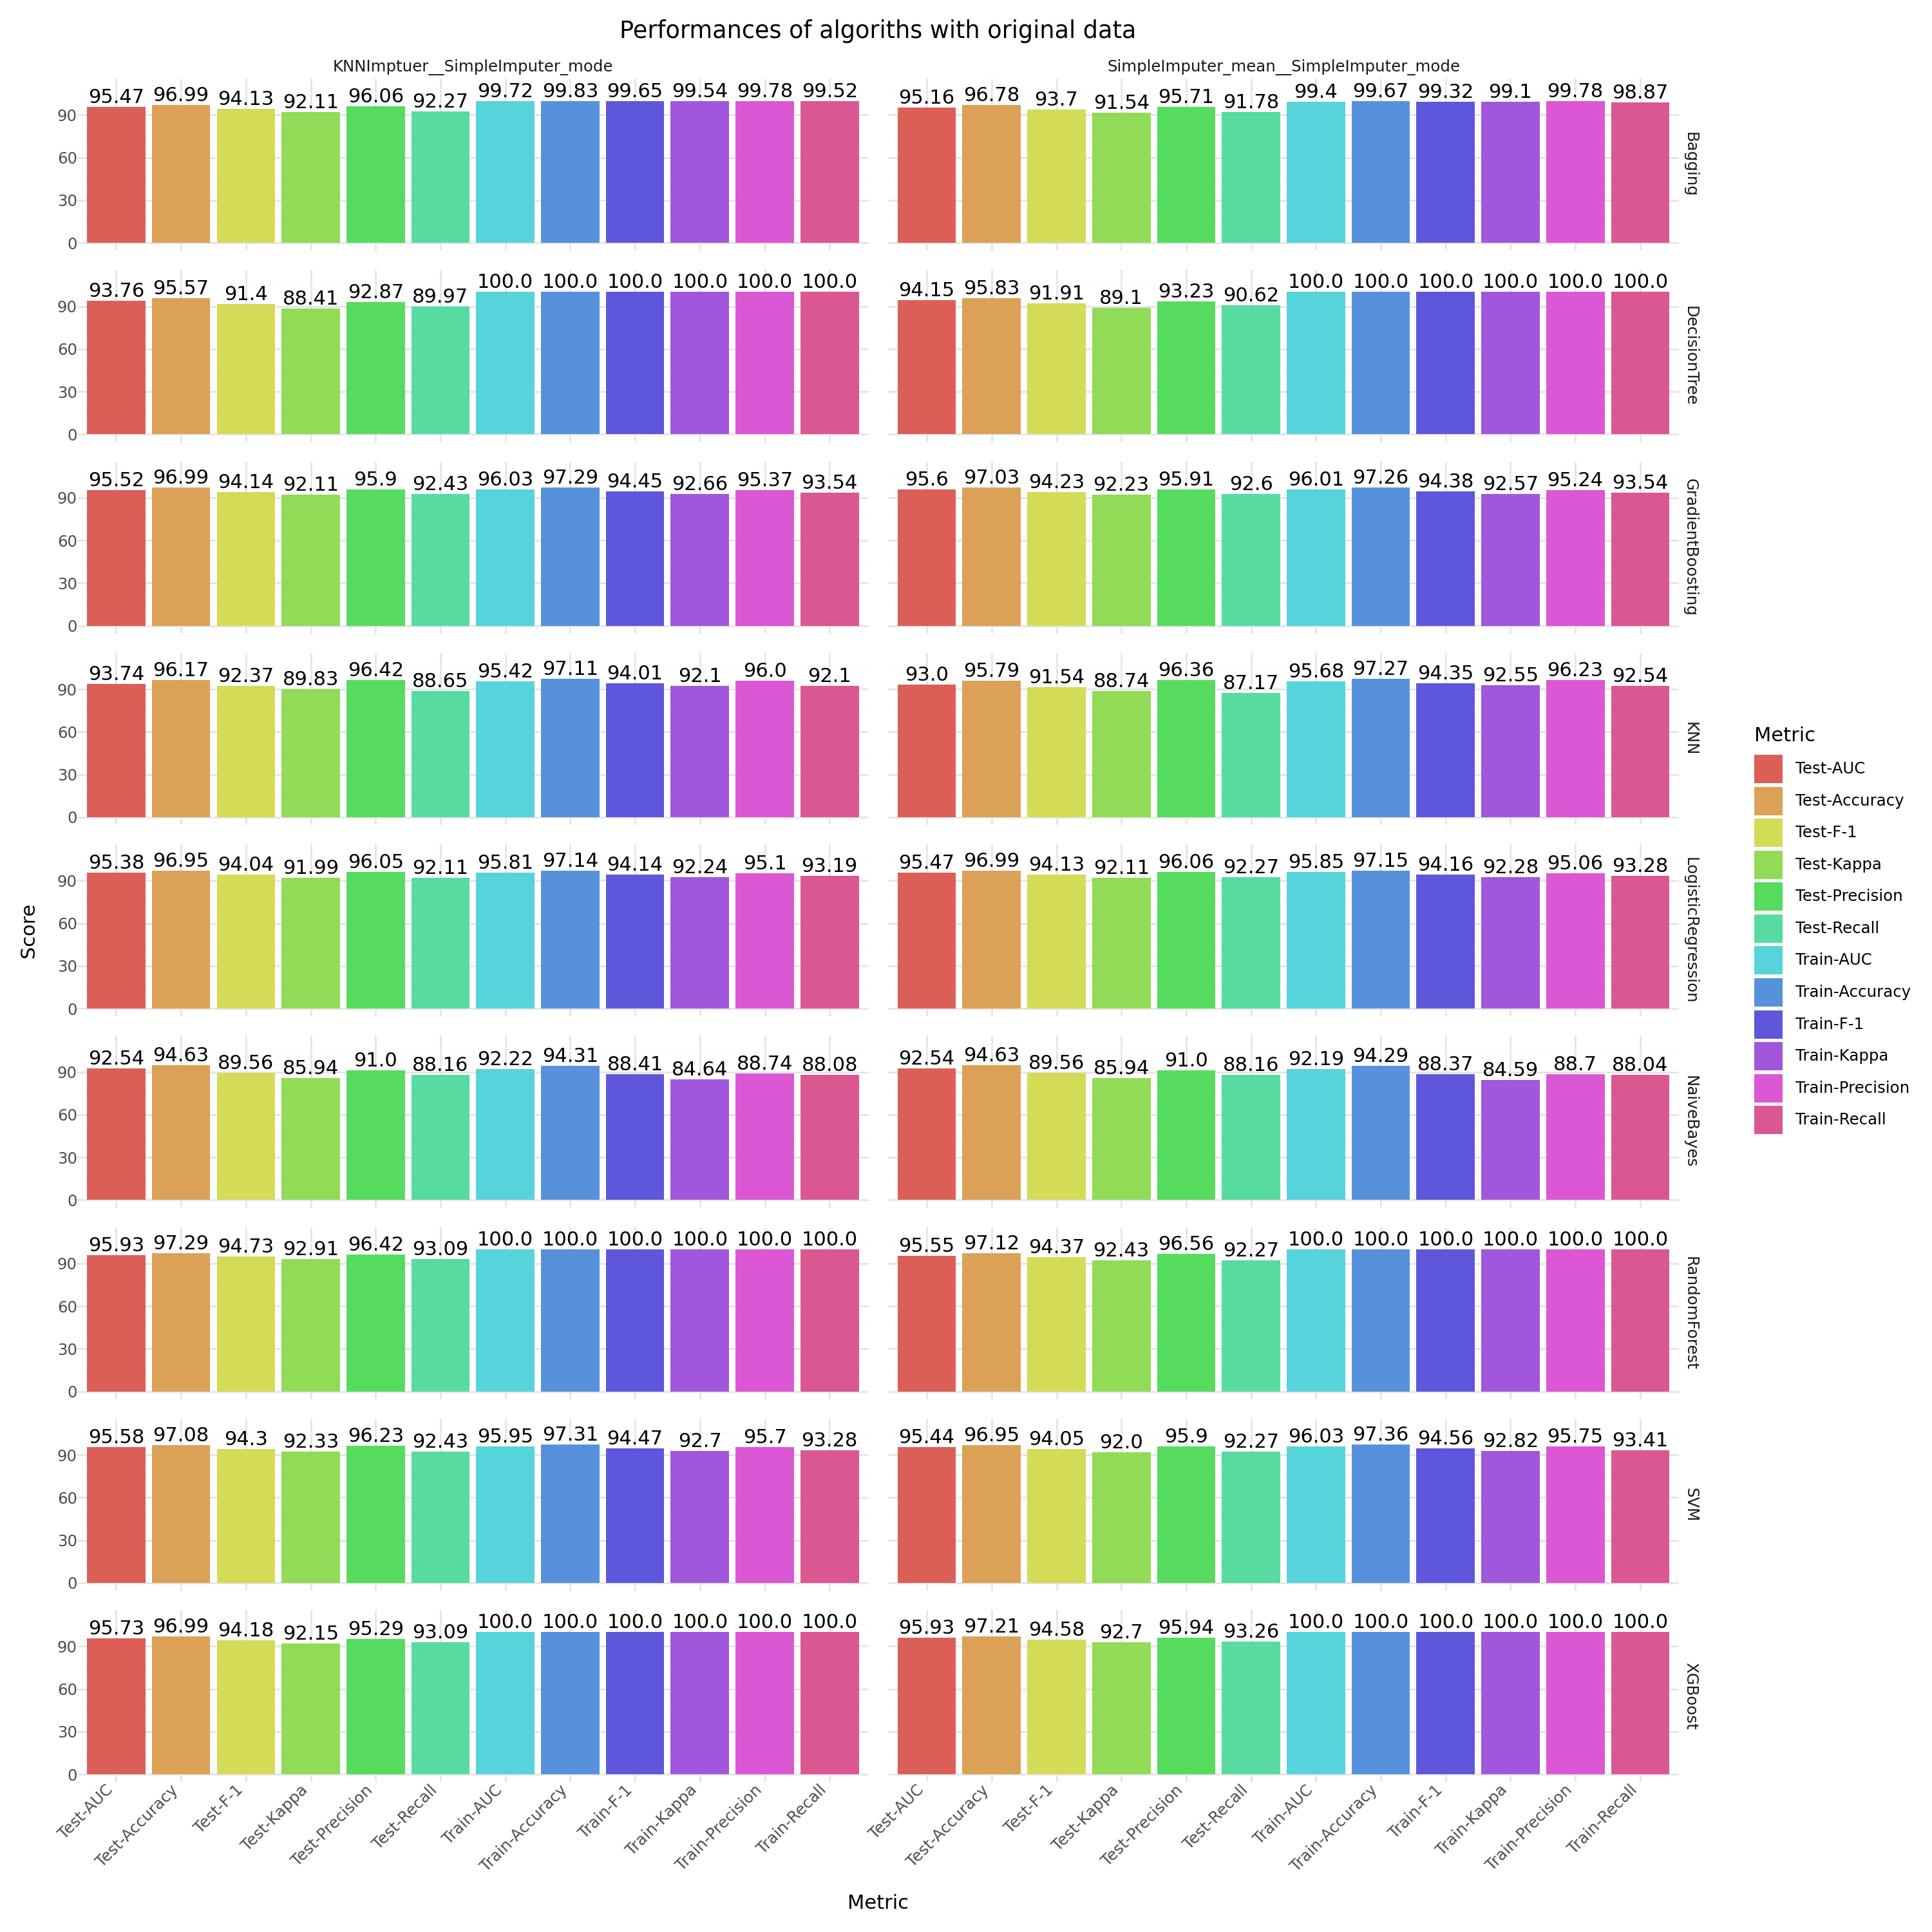

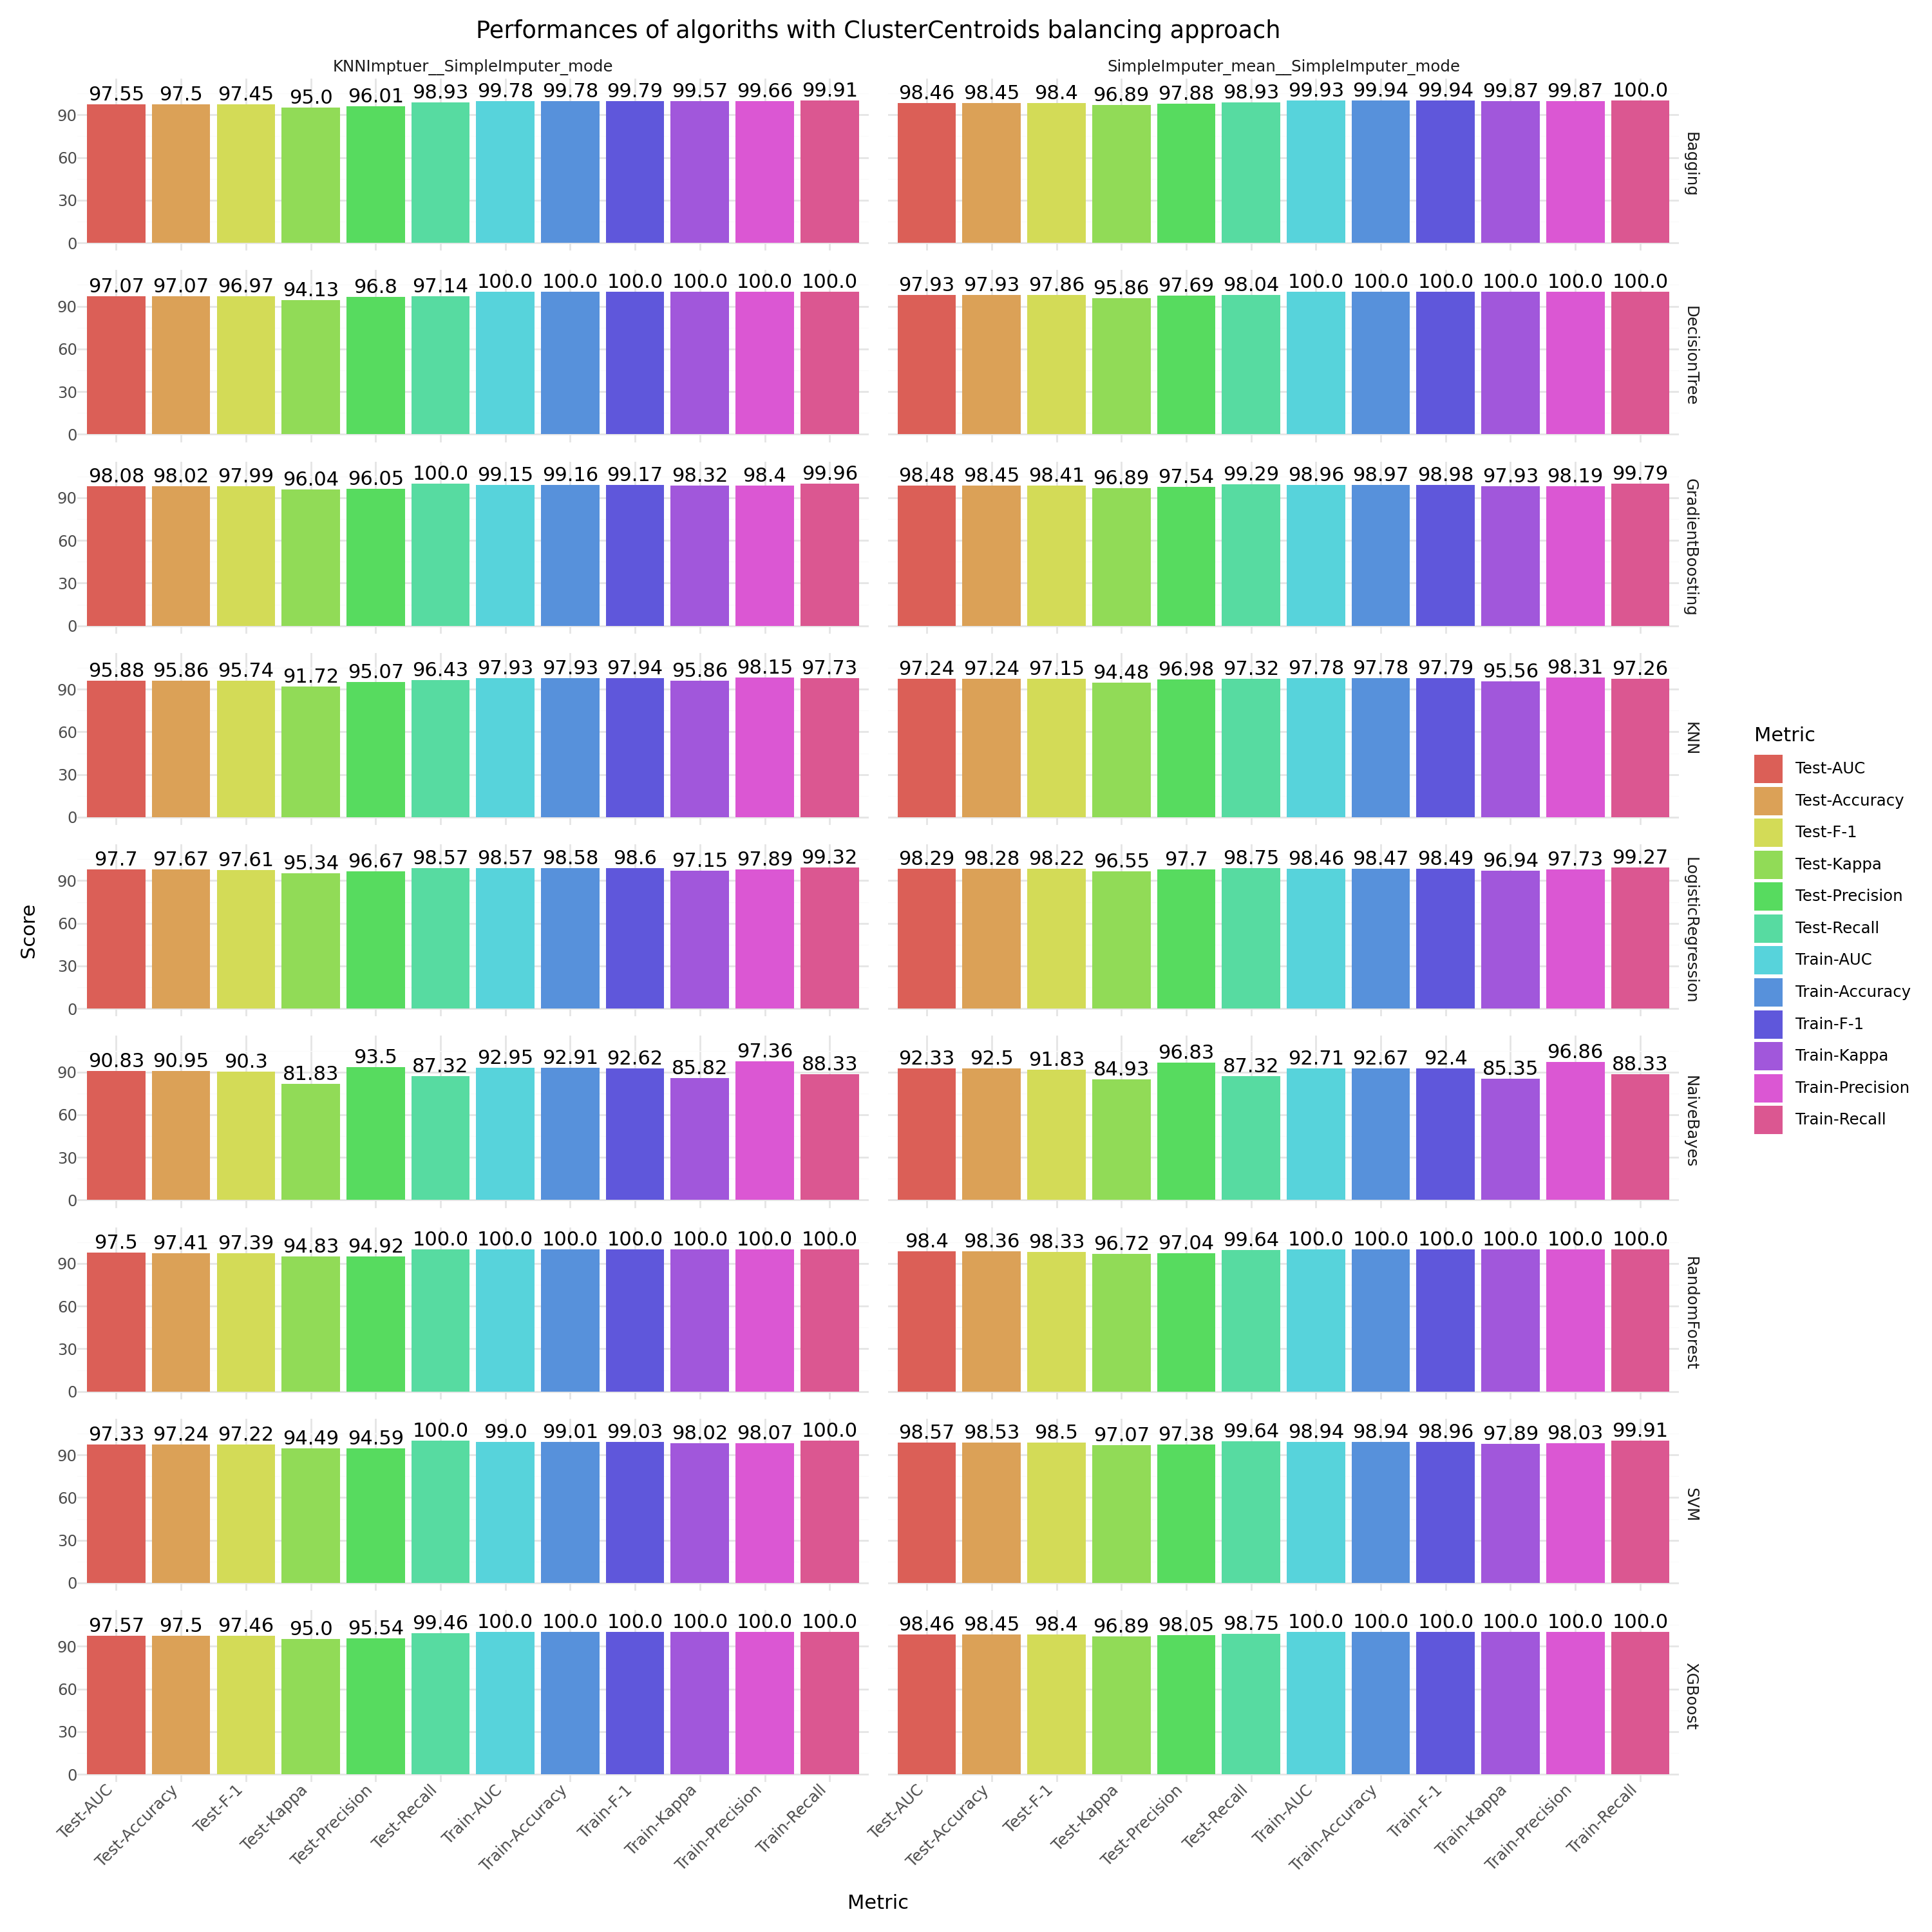

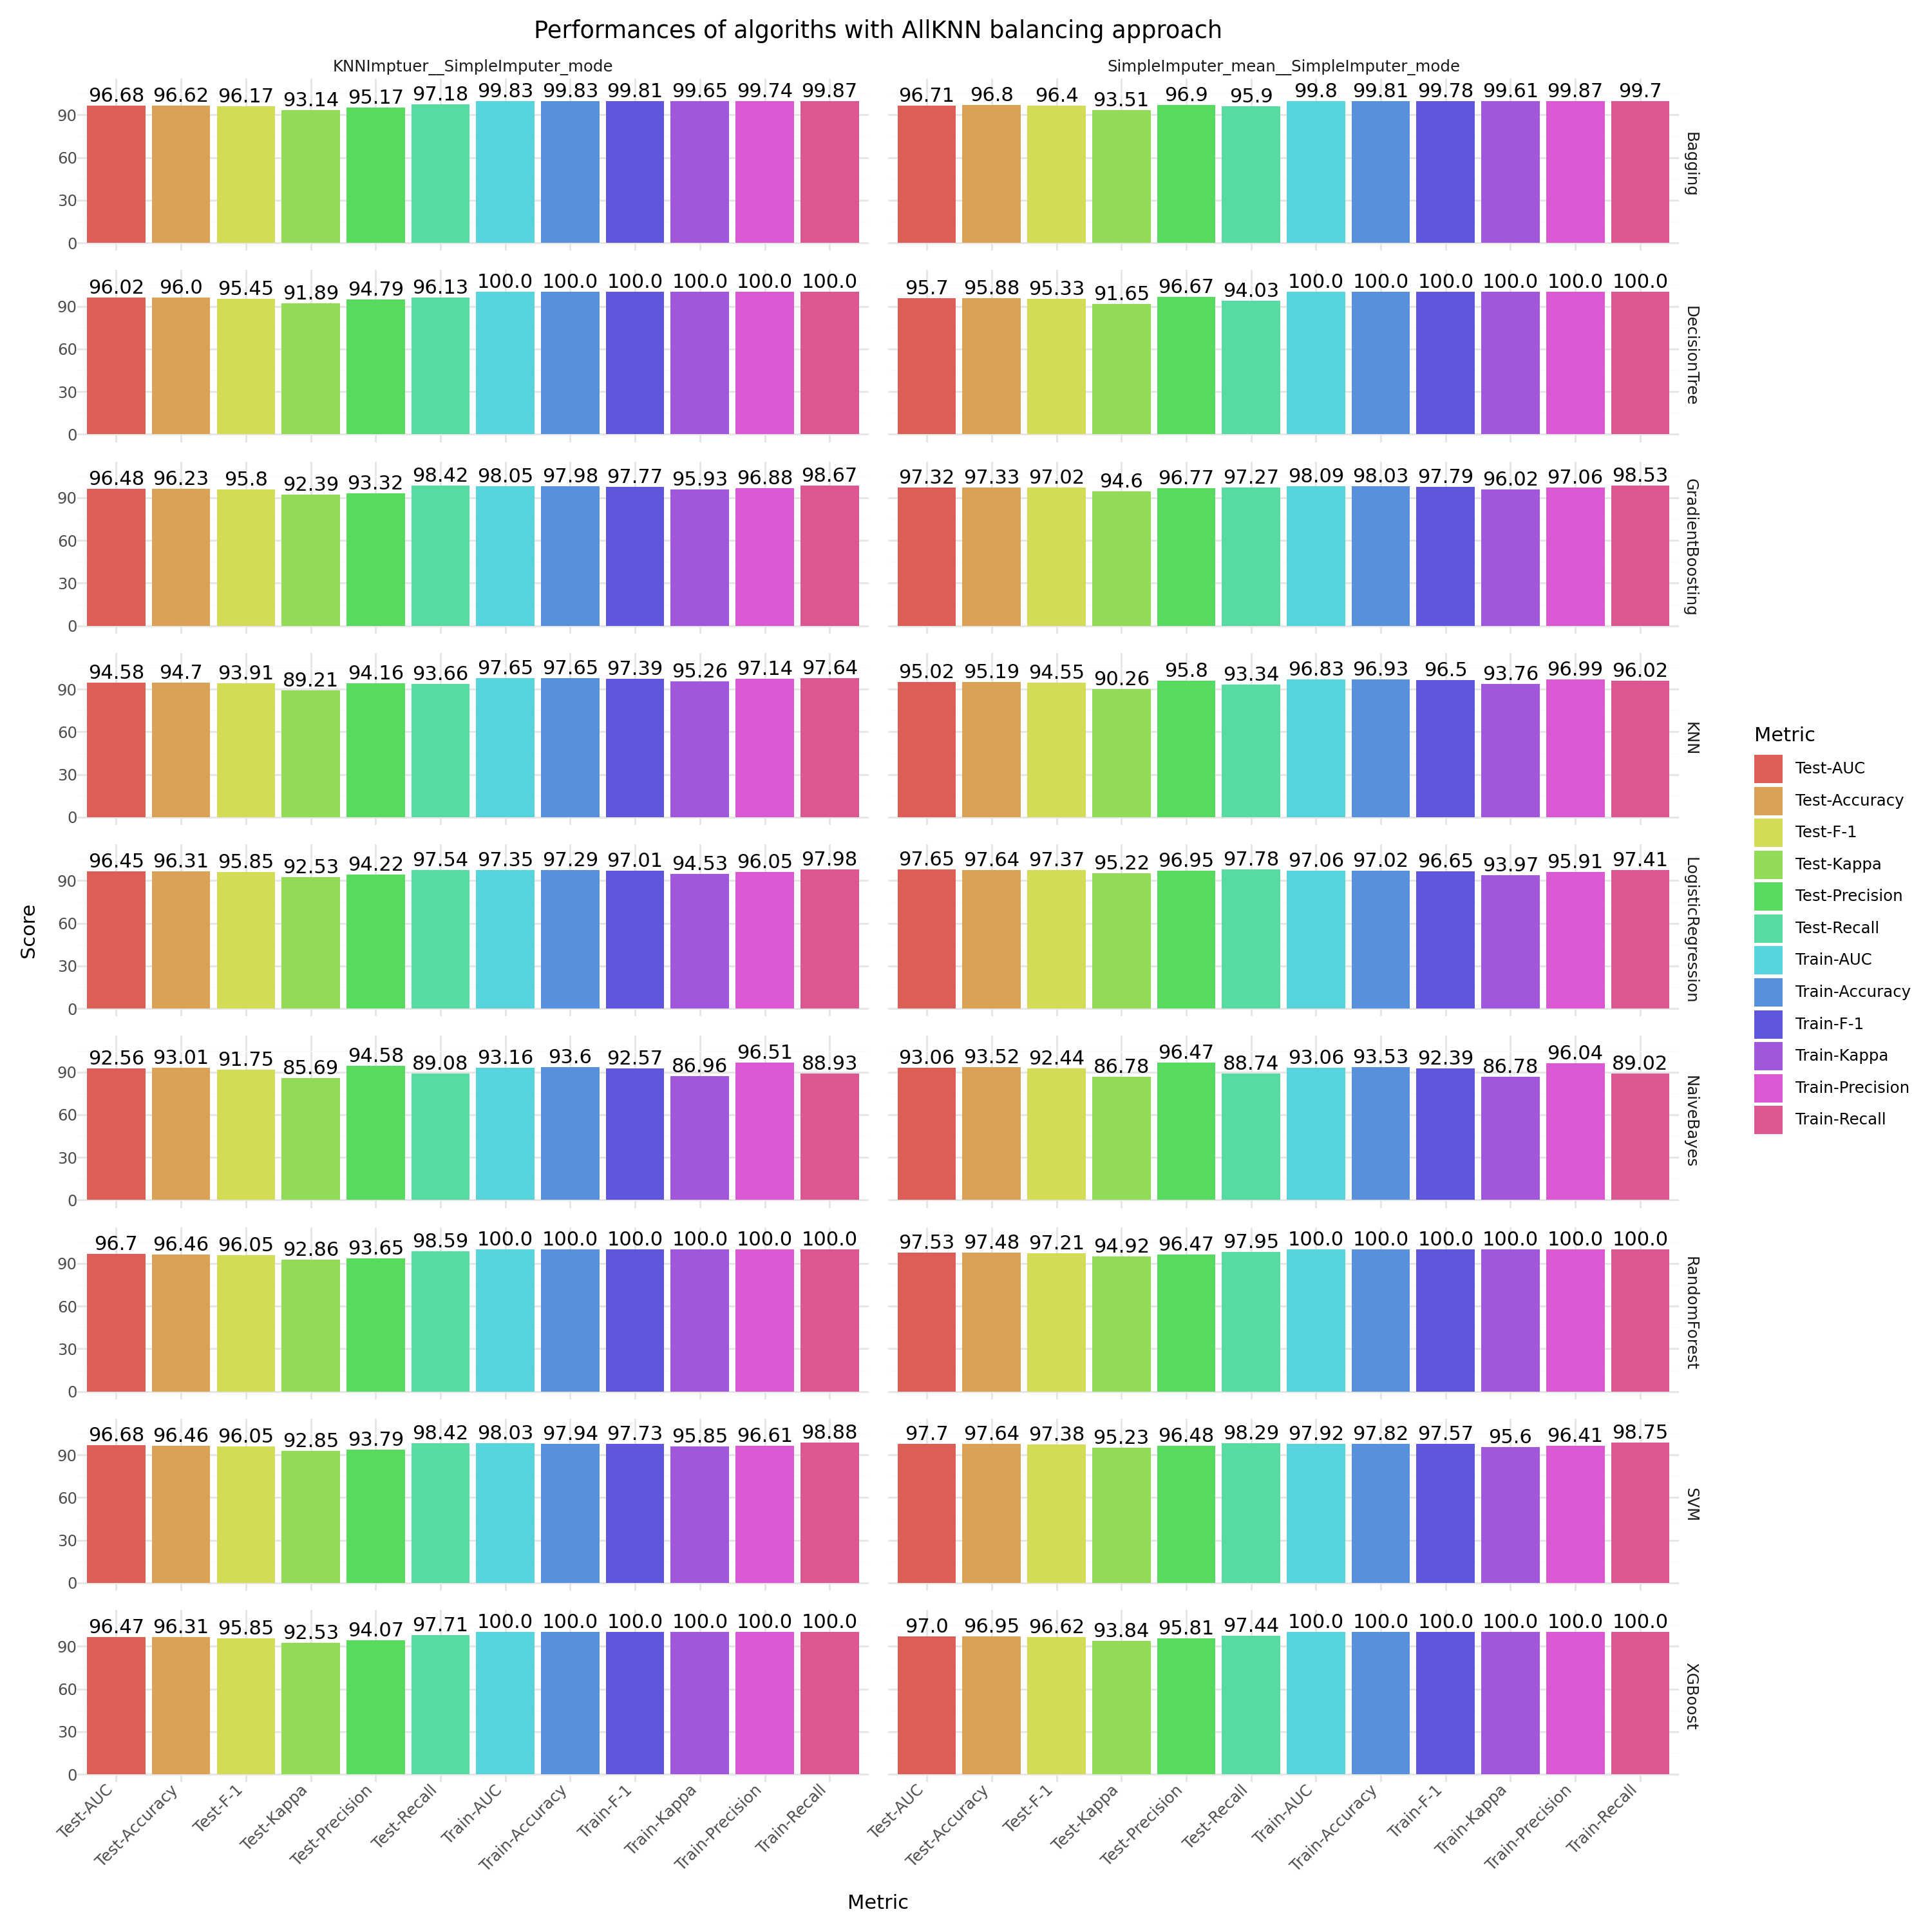

In [9]:
# the performance of each balancing approach with combination of different imputing technique and algorithm
plot_for_each_balancer(performances_df)

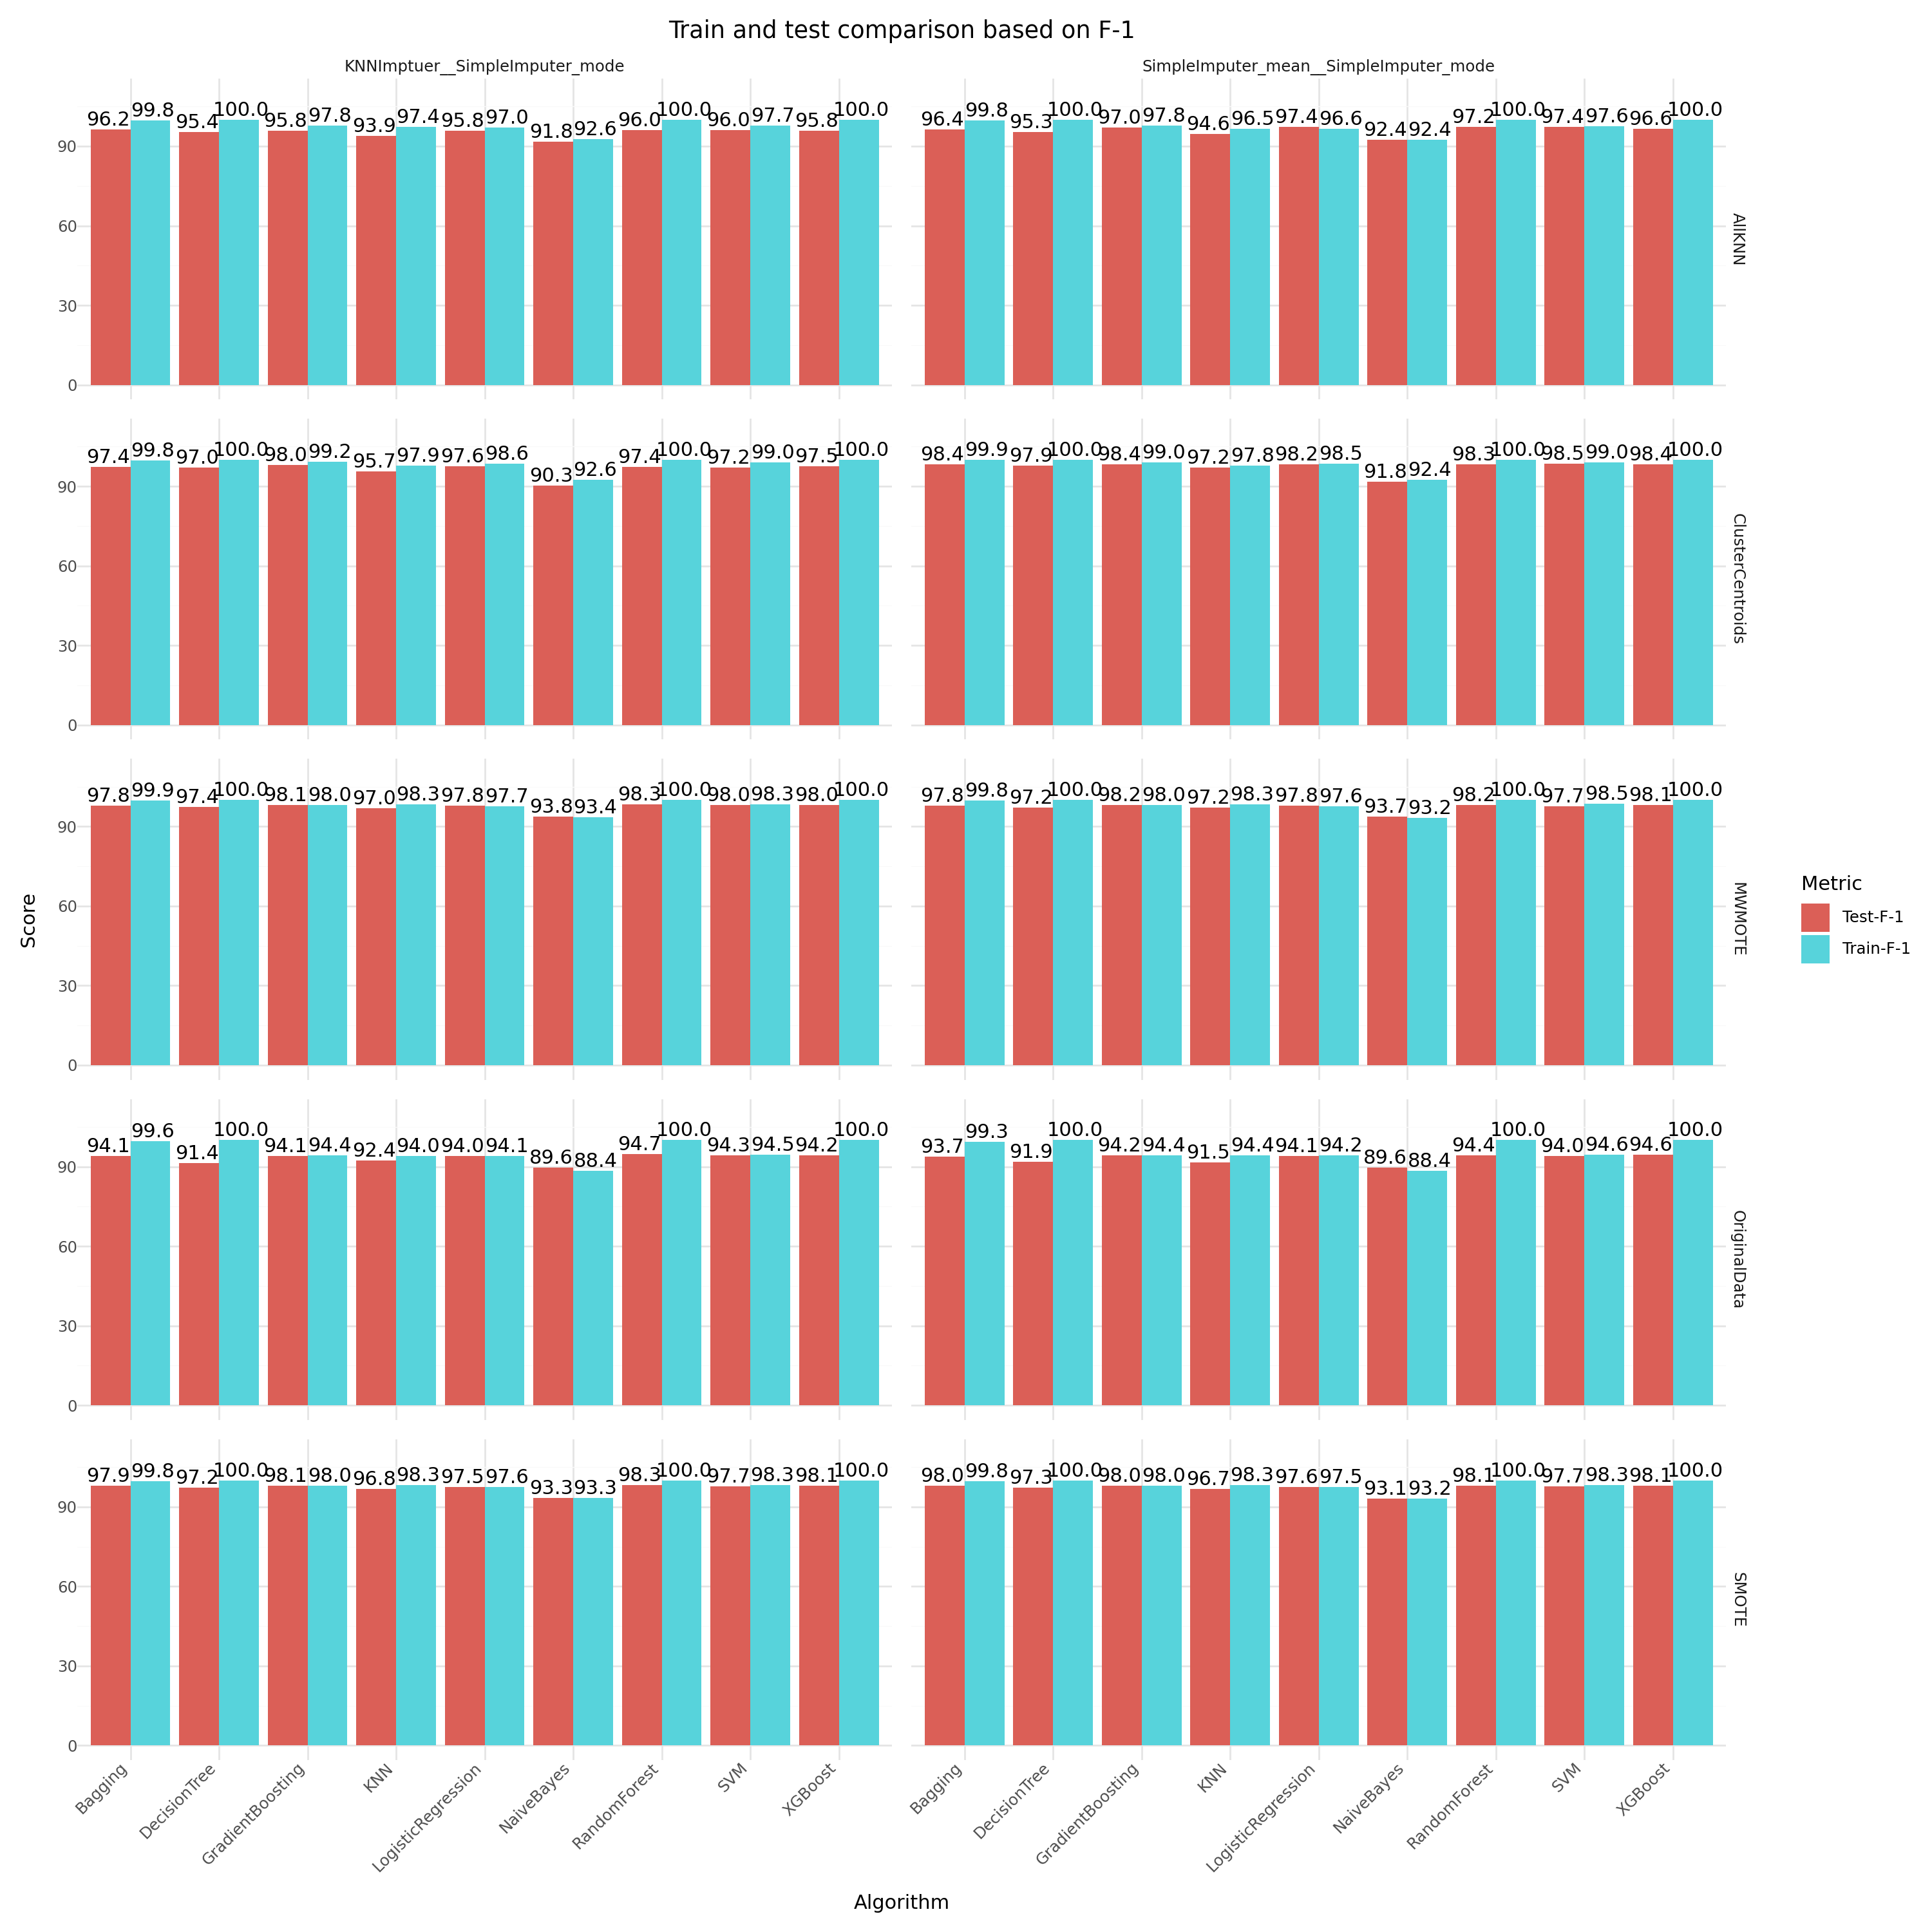

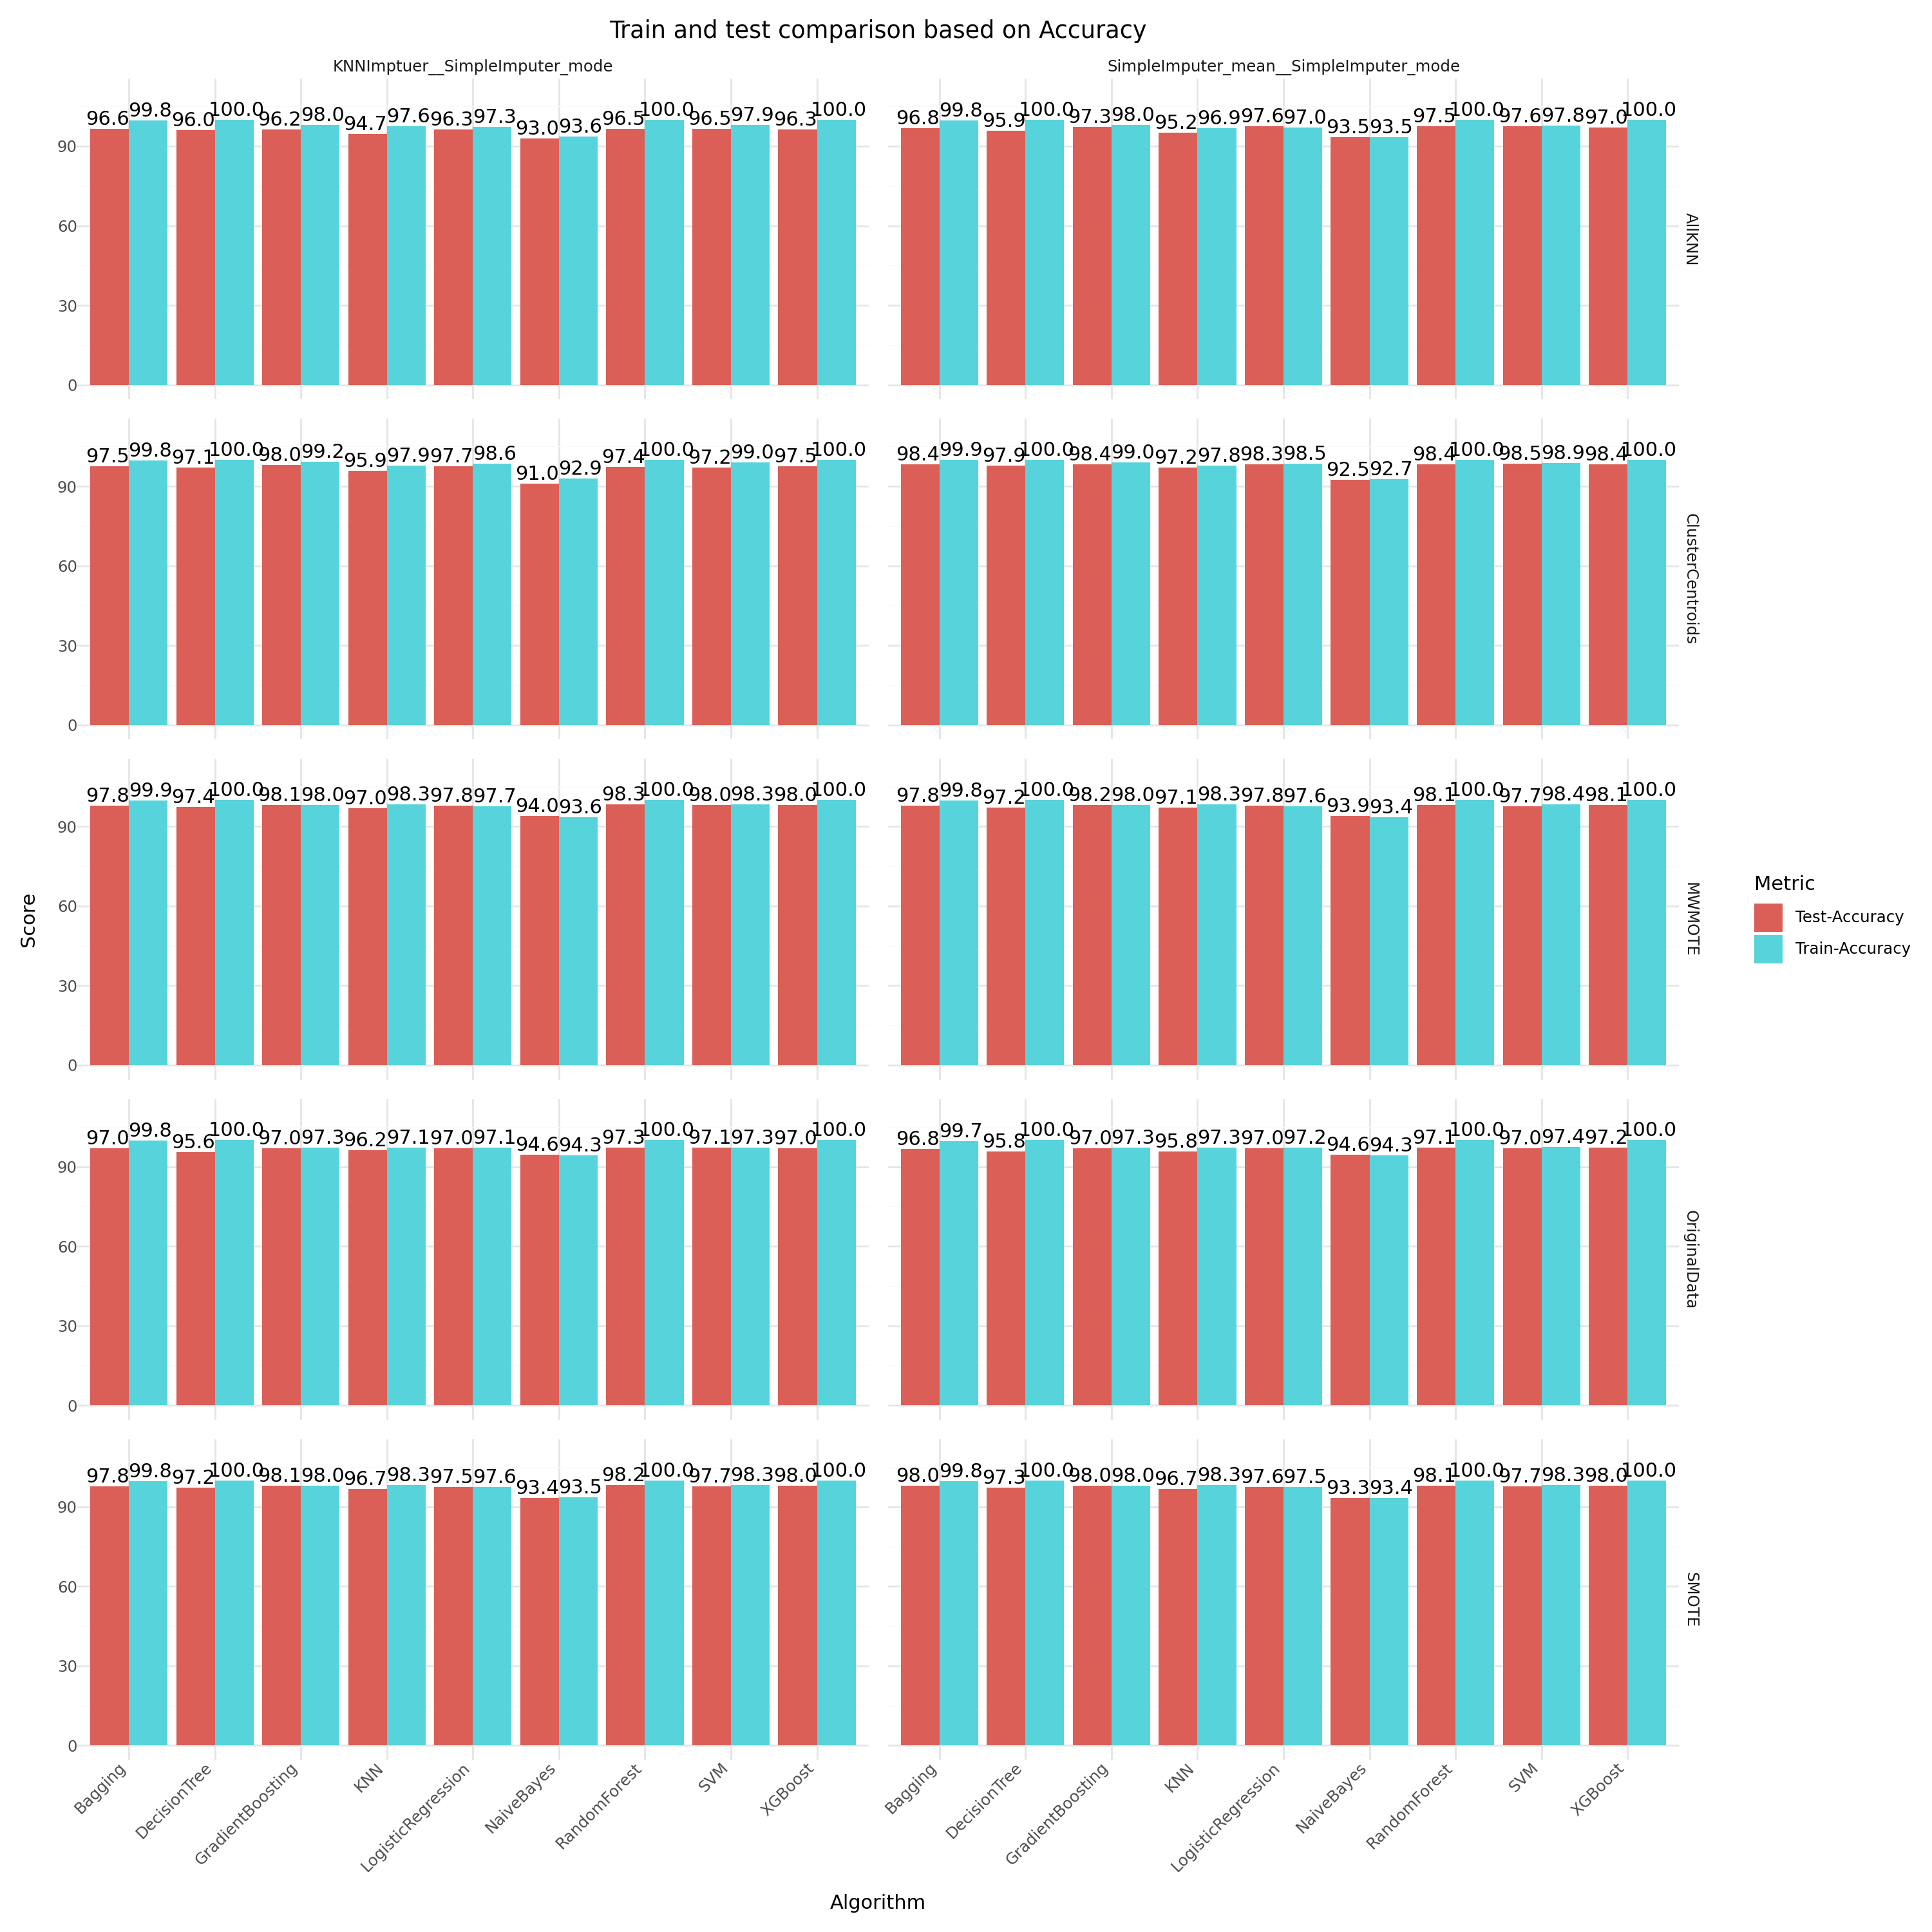

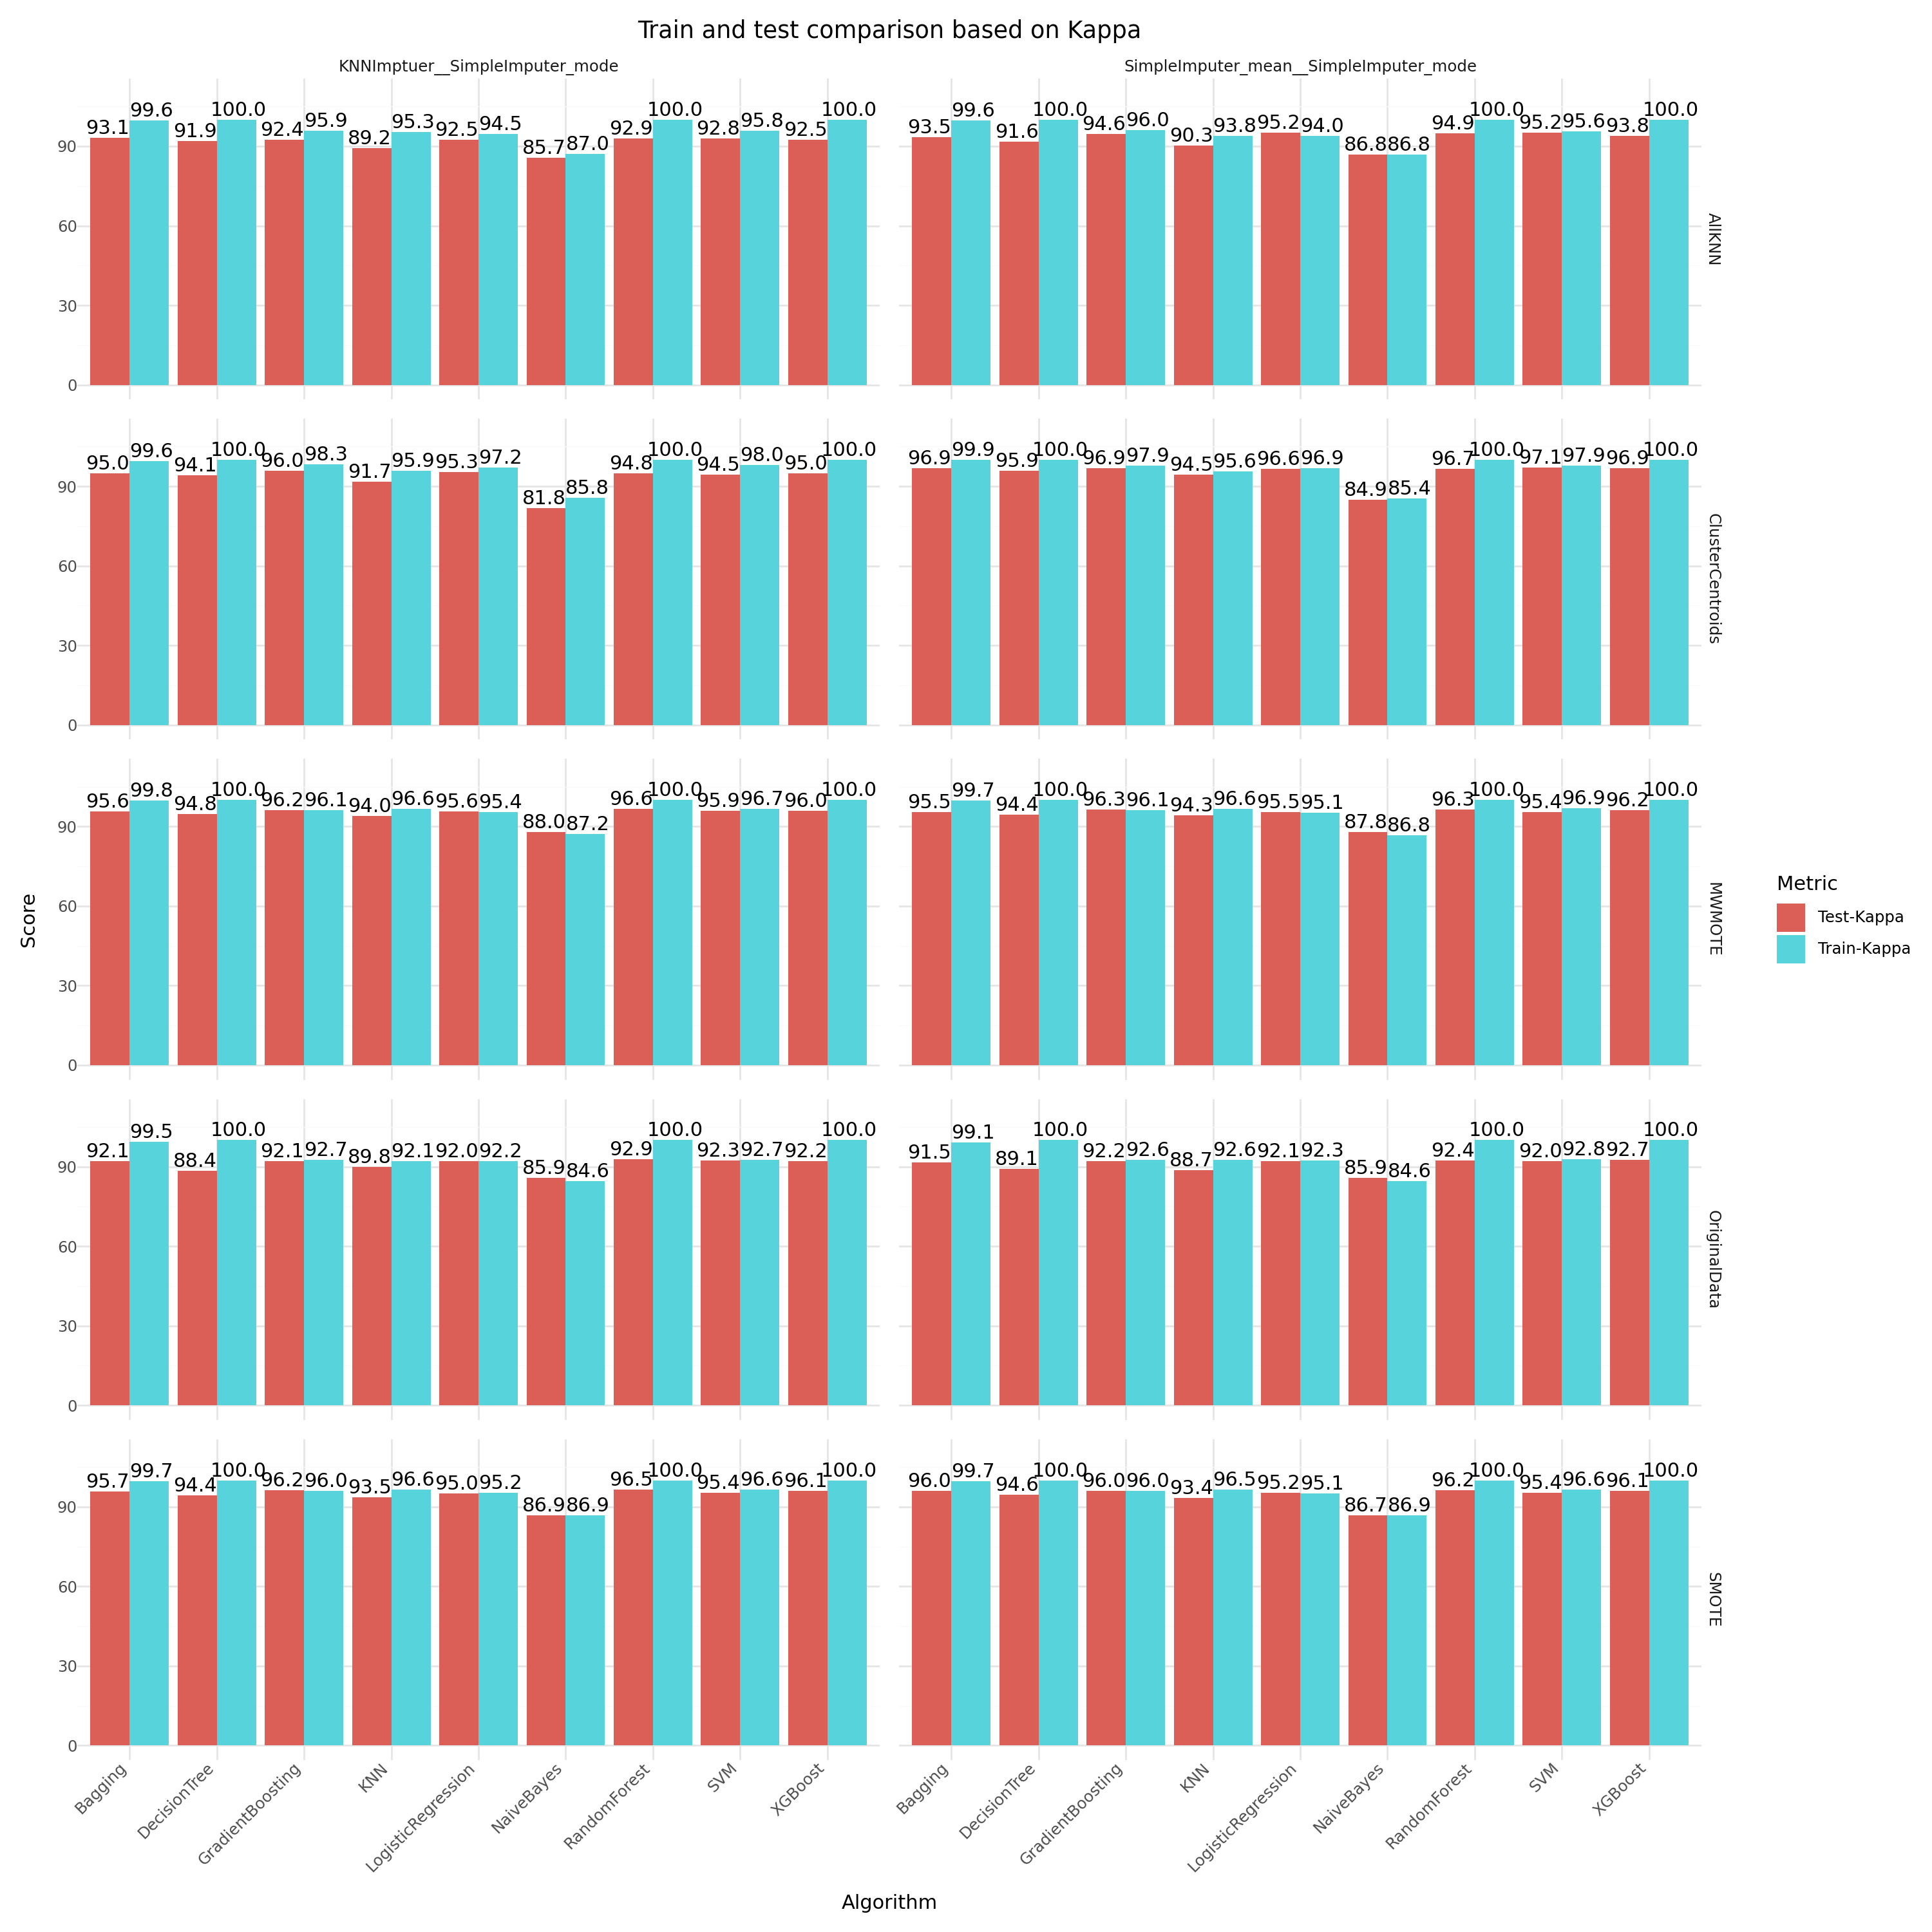

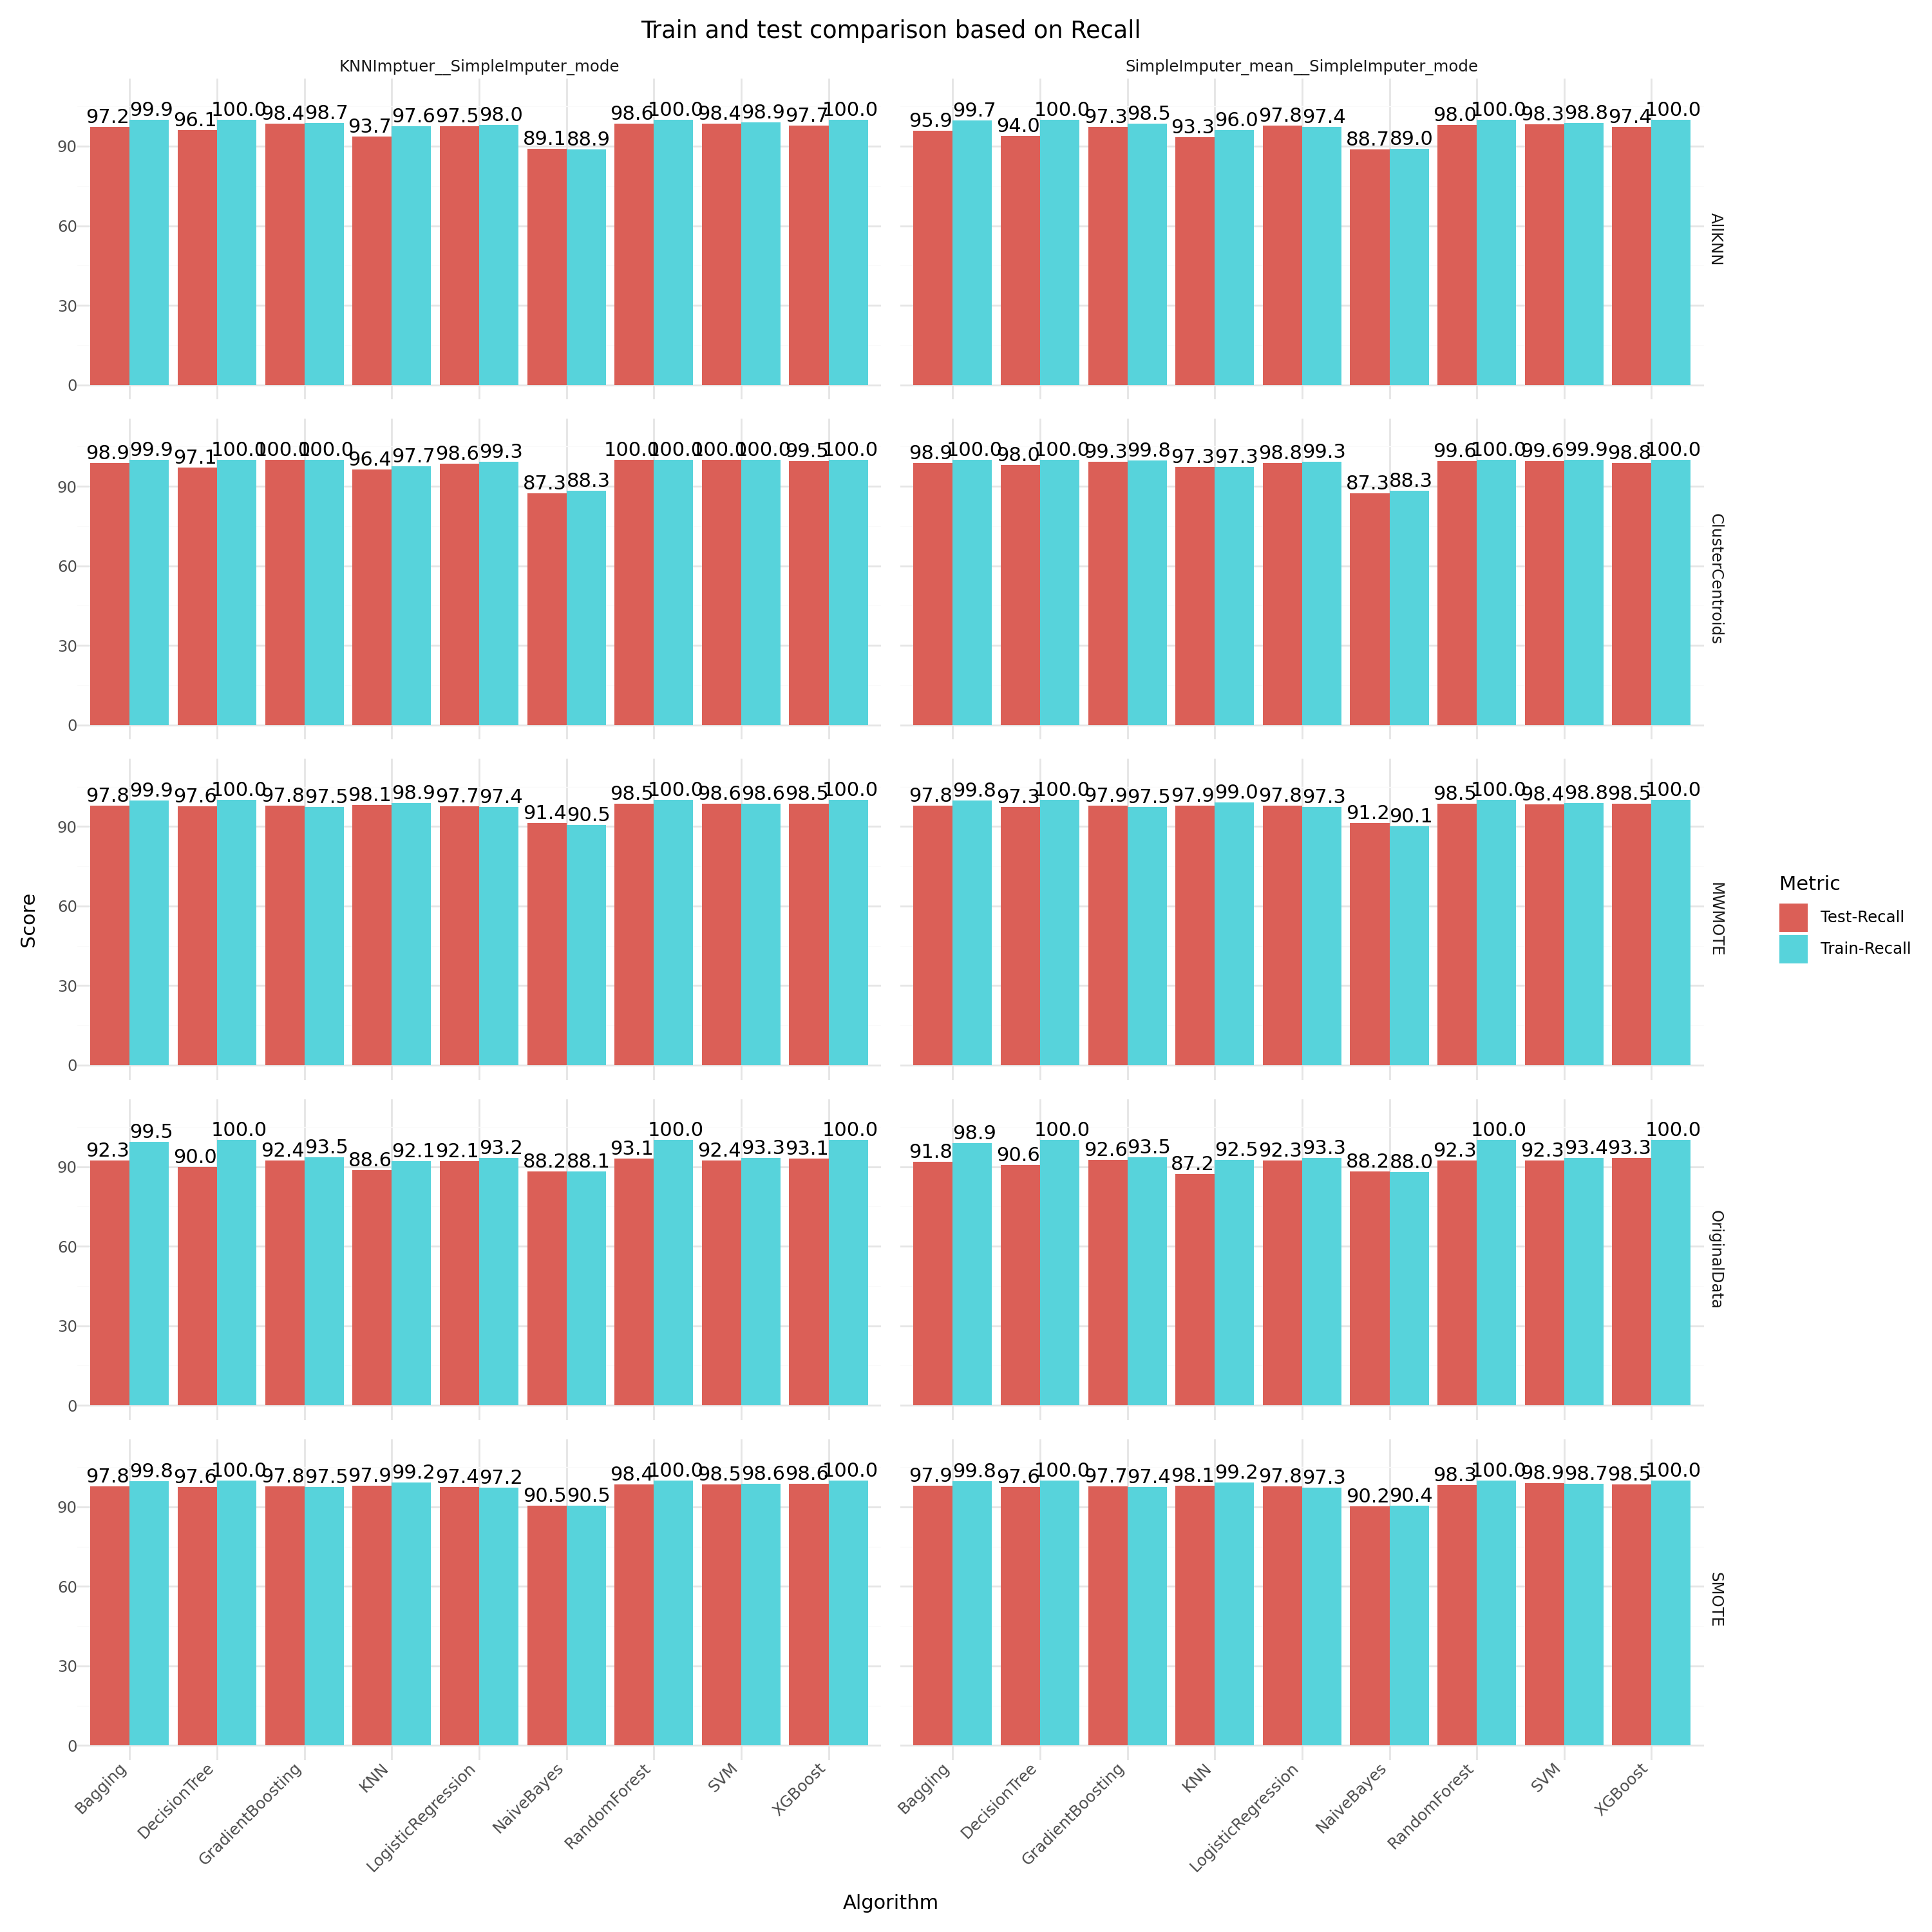

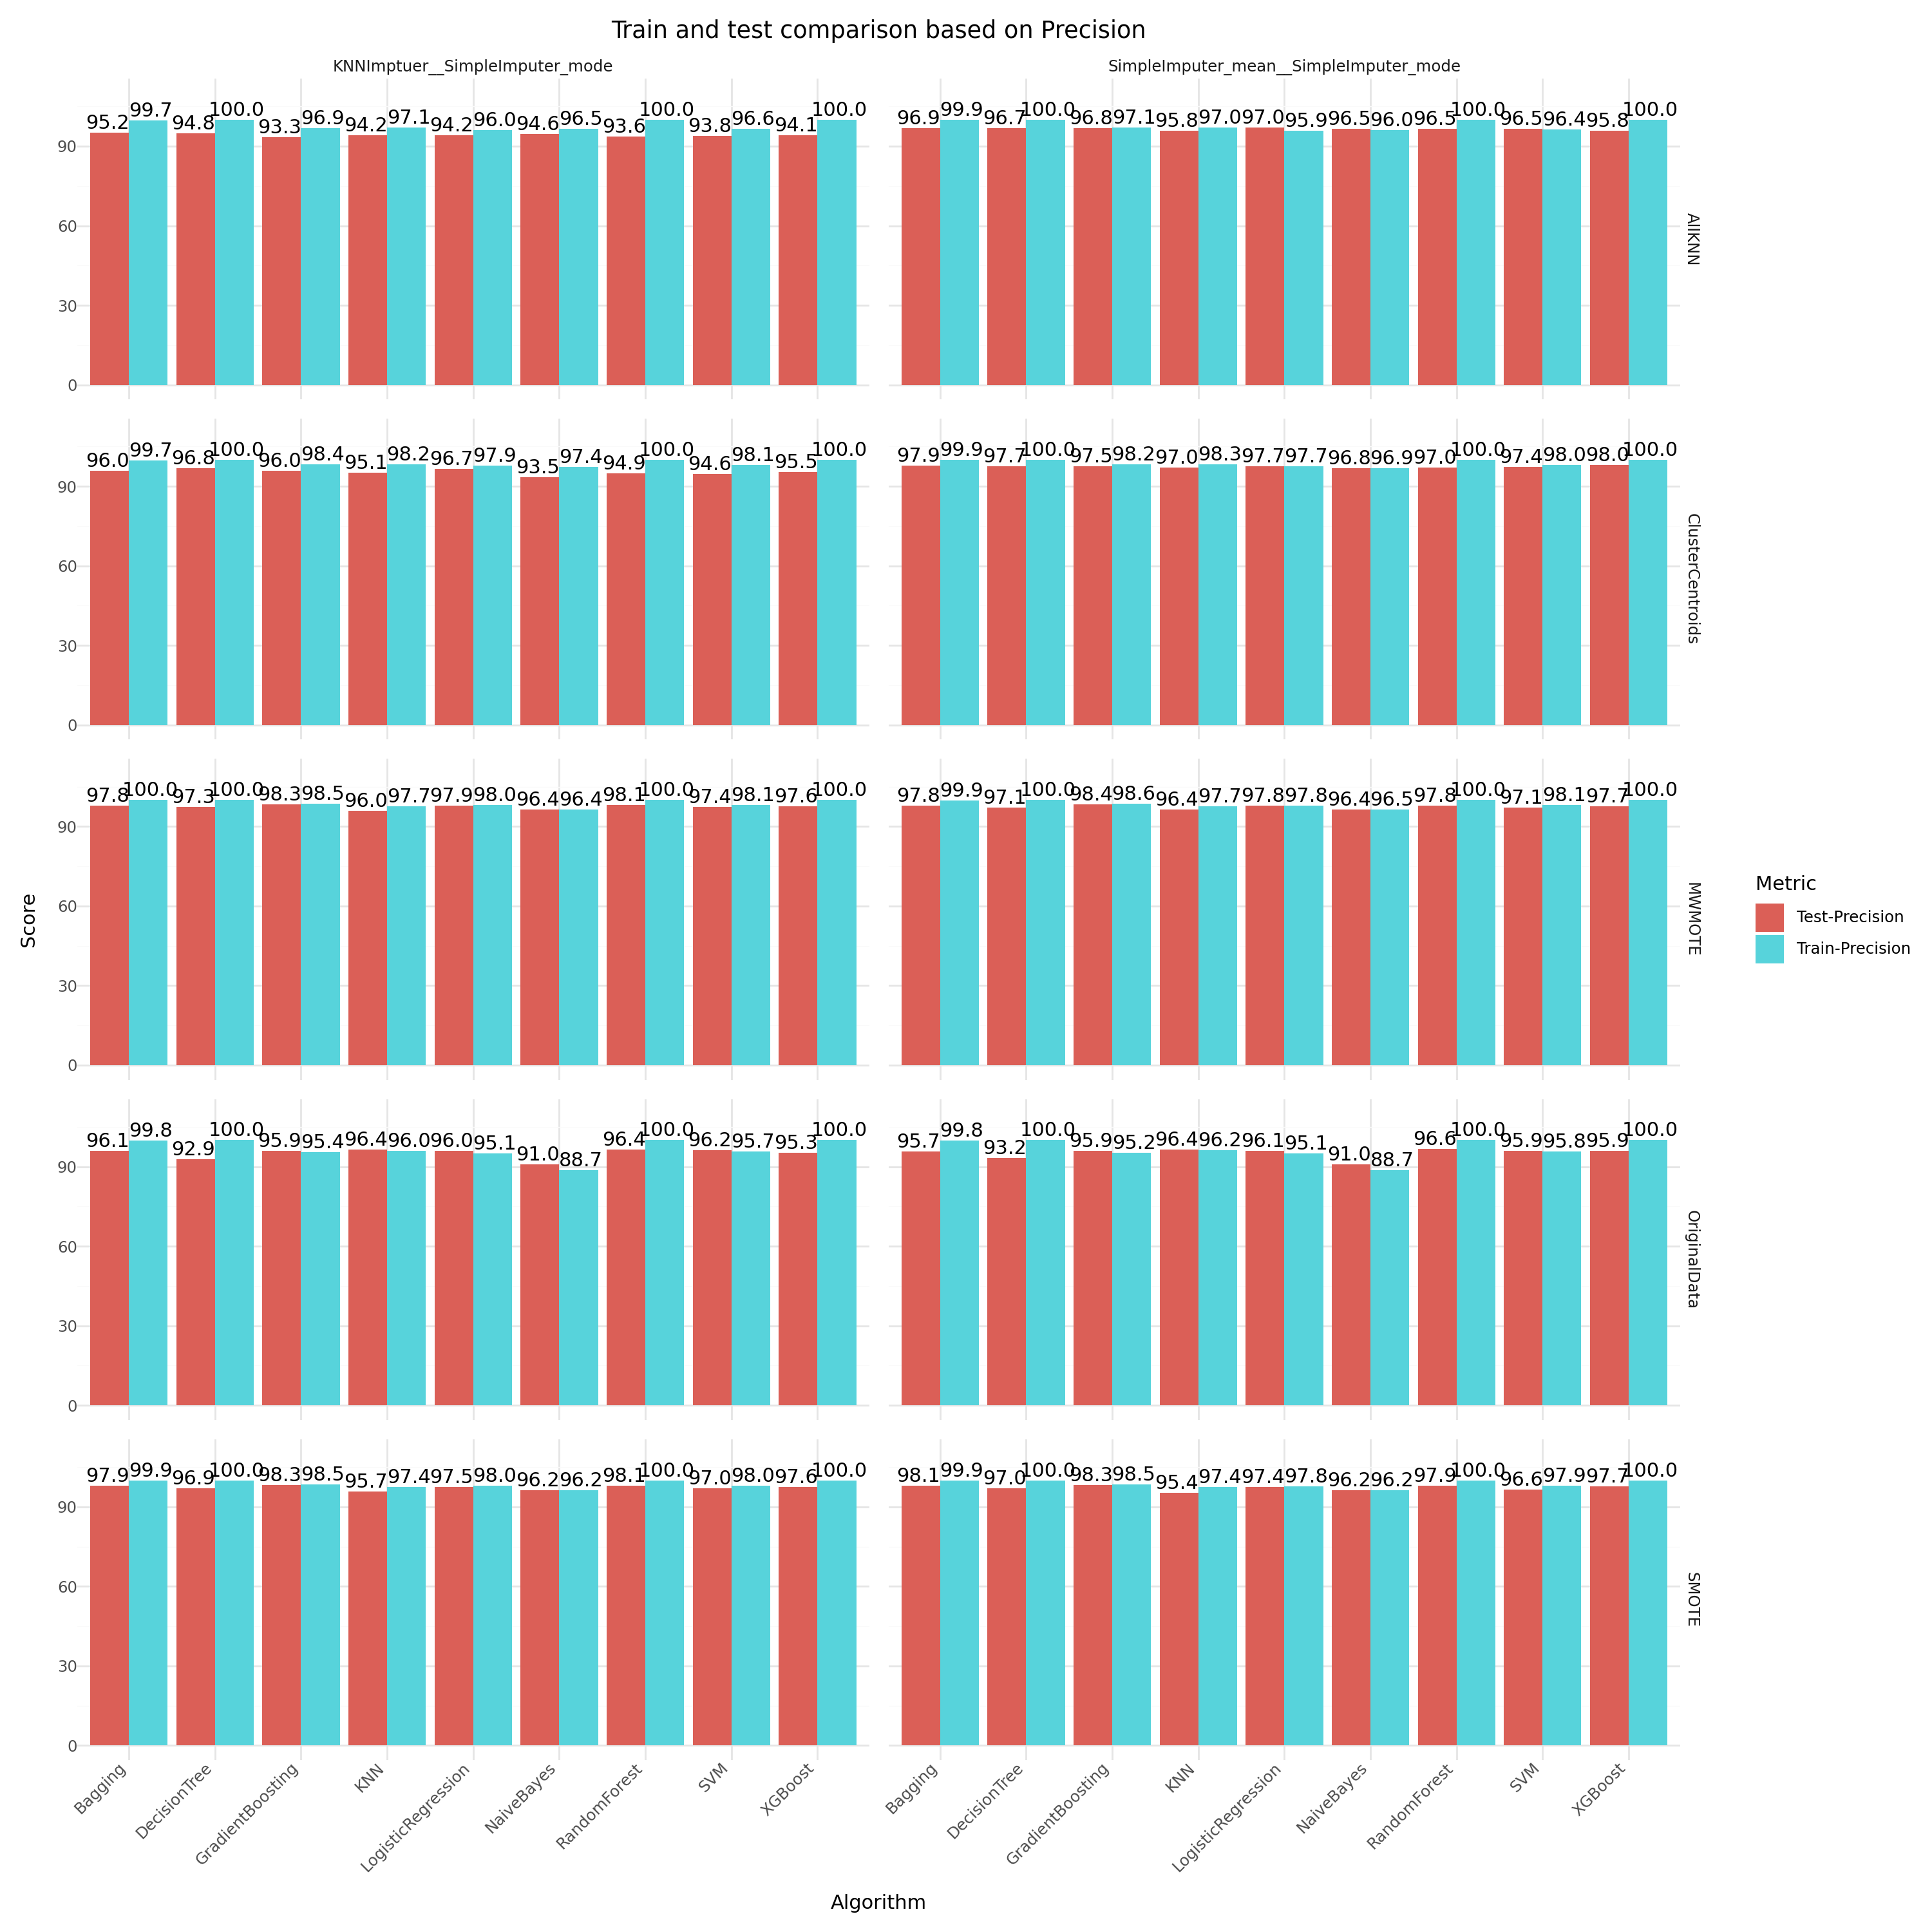

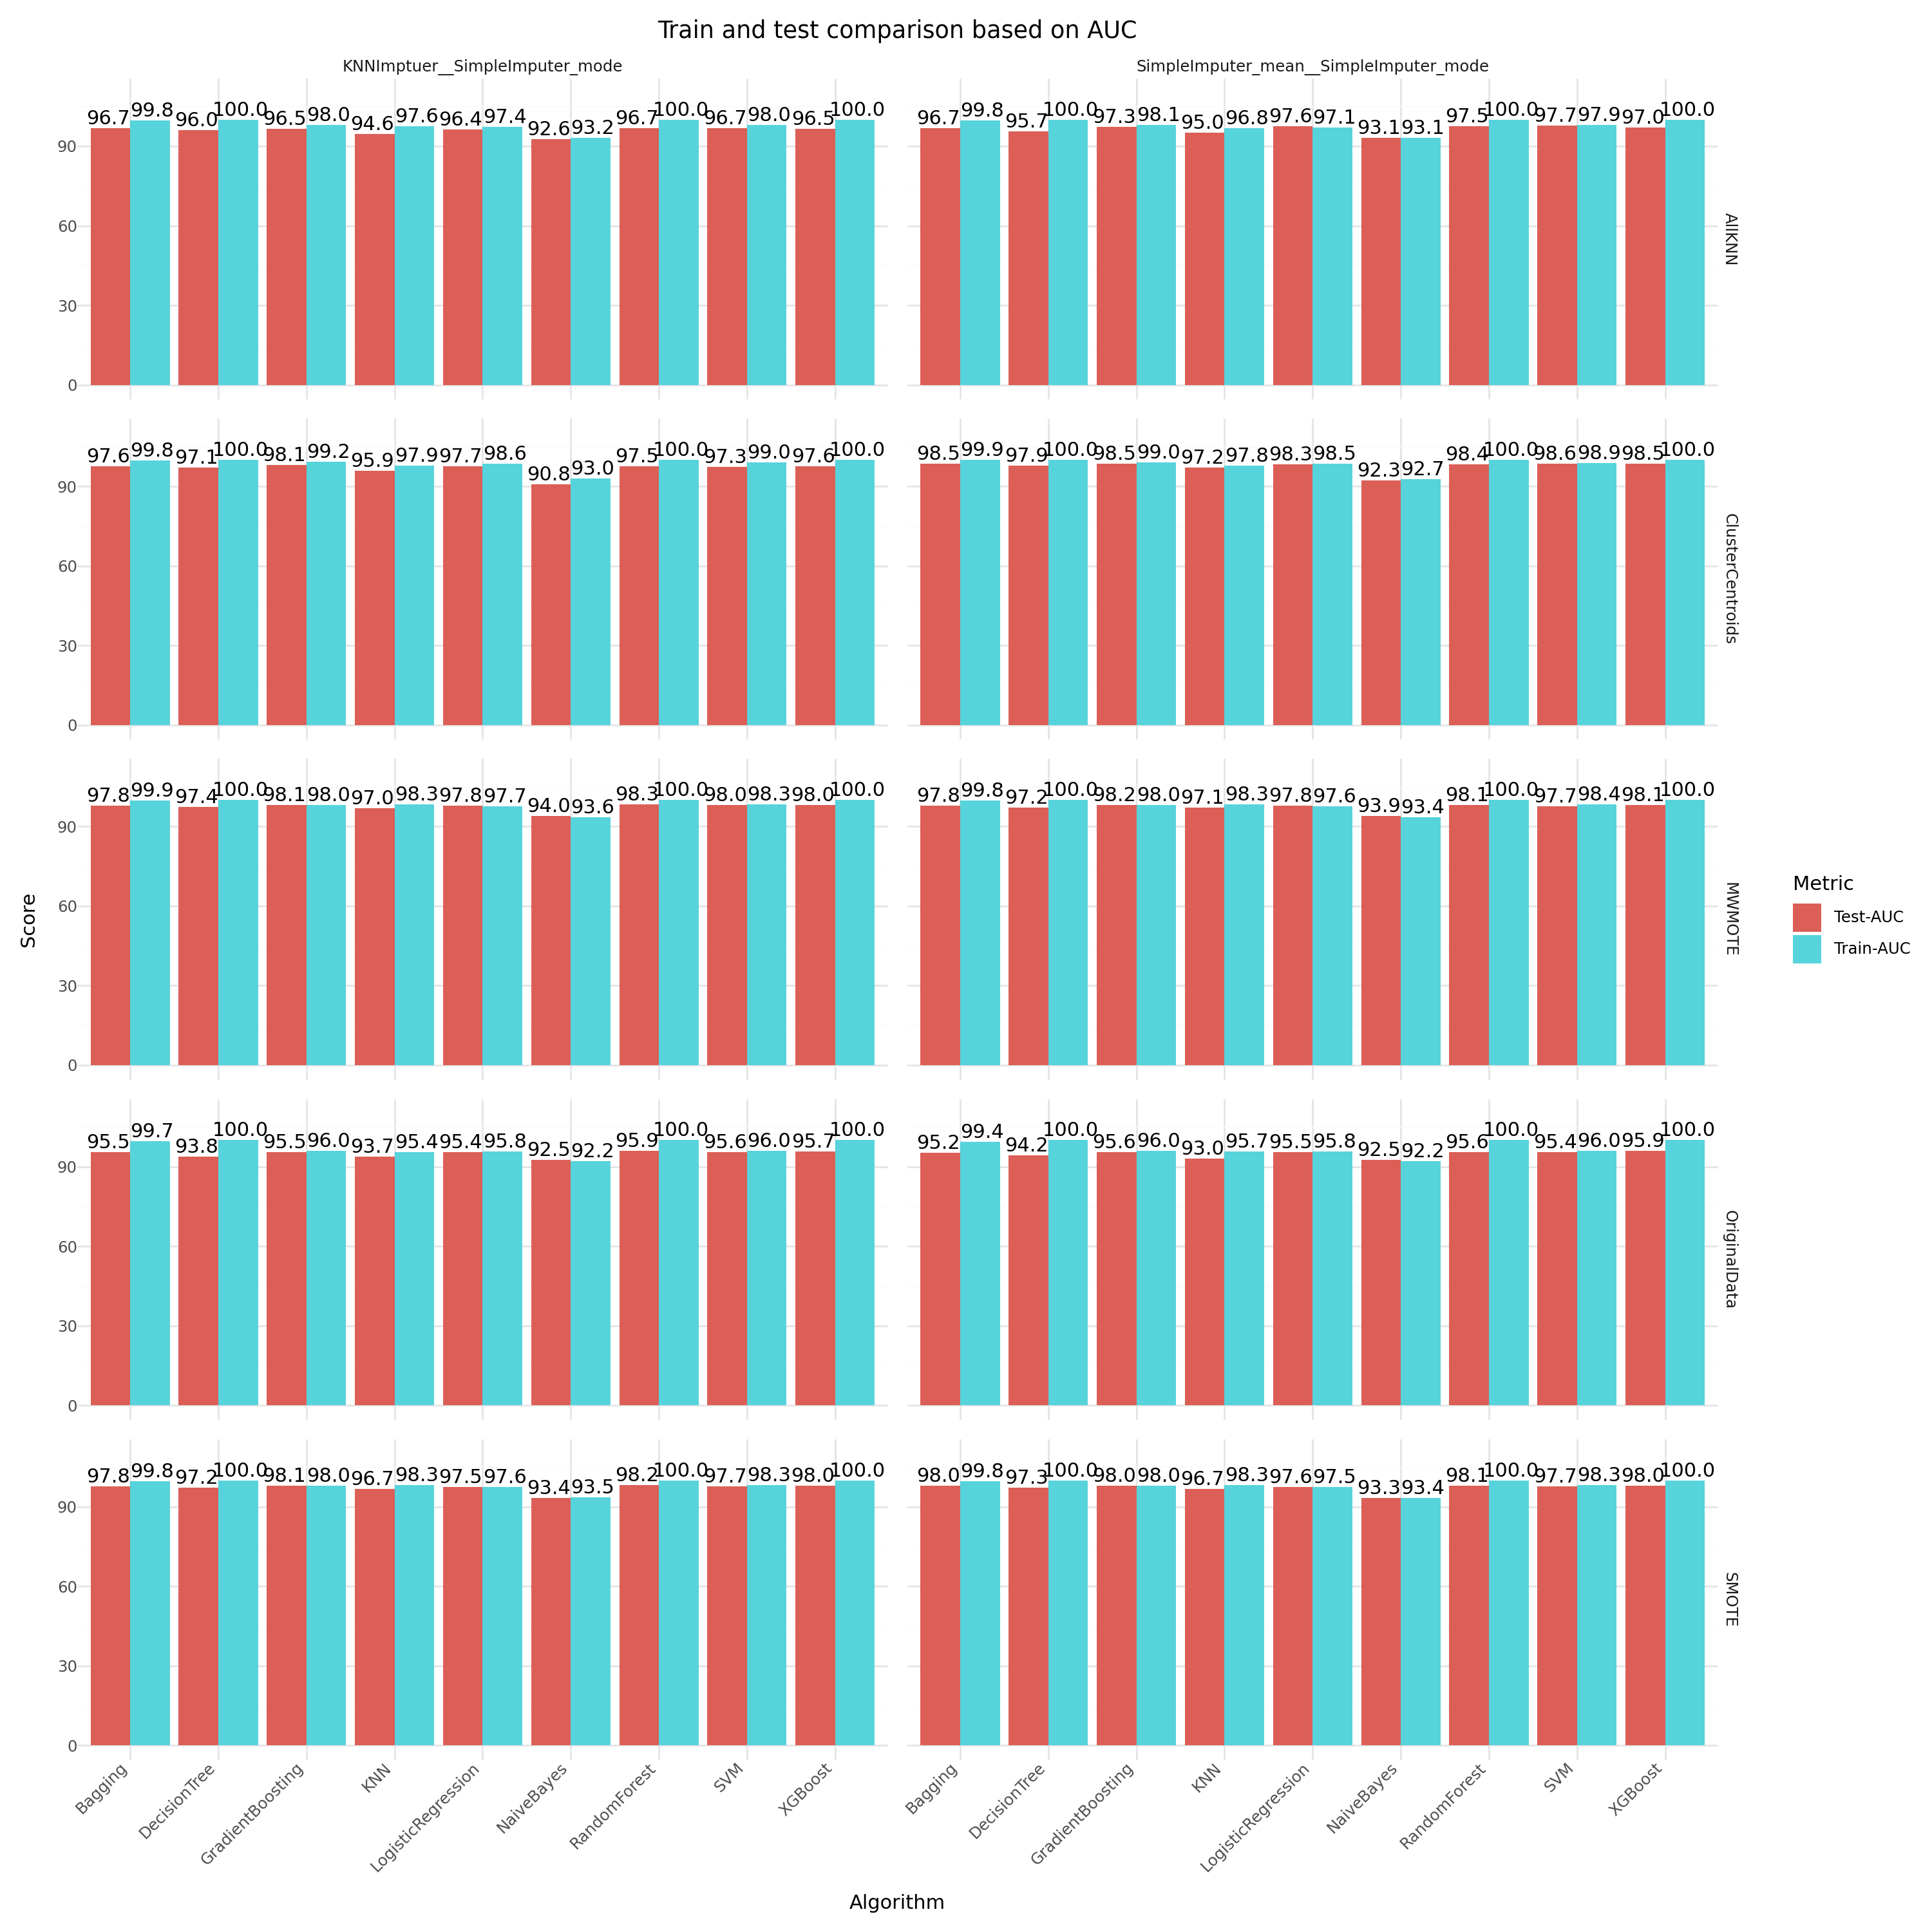

In [10]:
# the side by side comparison of algorithms, for each metric, with combination of different imputing technique and balancing approach
plot_for_each_performance_metric(performances_df)

In [12]:
# the max train score grouped by algorithms and evaluation metric

test_scores = max_score_for_each(performances_df,set_= 'Test')
train_scores = max_score_for_each(performances_df,set_='Train')
differences_df = train_scores.rename(columns={'Score':'TrainScore'}).drop(['Metric','Set','Imputer','Imbalance'],axis=1)\
            .merge(test_scores.rename(columns={"Score":"TestScore"}).drop(['Metric','Set','Imputer','Imbalance'],axis=1),\
                    on=['Algorithm','MainMetric'])

In [9]:
# differences_df['ScoreDifference'] = differences_df['TrainScore']-differences_df['TestScore']

In [13]:
# differences_df.sort_values(['Algorithm','ScoreDifference'])

In [ ]:
# get test_scores precision
test_scores[test_scores['Imbalance'].isin(['MWMOTE','MOTE'])]
test_scores[test_scores['MainMetric'] == 'Accuracy'].sort_values("Score")

In [20]:
# best model training combinations for training
# this is the combination of model, imputation and balancing techniques

combinations = get_combinations(df=performances_df,by_features=['Algorithm','Metric'],by_metric='AUC',by_set='Test')

In [21]:
combinations

[[sklearn.ensemble._bagging.BaggingClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids],
 [sklearn.tree._classes.DecisionTreeClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids],
 [sklearn.ensemble._gb.GradientBoostingClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids],
 [sklearn.neighbors._classification.KNeighborsClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  smote_variants.oversampling._mwmote.MWMOTE],
 [sklearn.linear_model._logisti

In [22]:
df = pd.read_csv("../data/initial_data/frmgham2_project_data_full.csv")

In [23]:
# train best models 
for combination in combinations:
    algorithm, imputer,balanc = combination
    # print(combination)
    # quit()
    print(algorithm.__name__,balanc.__name__,imputer)
    best_model,best_params,output = find_best_model(algorithm=algorithm,
                                                    balancer=balanc,
                                                    imputer=imputer,
                                                    df=df,
                                                    ovewrite=False)


BaggingClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



BaggingClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


DecisionTreeClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



DecisionTreeClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


GradientBoostingClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



GradientBoostingClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


KNeighborsClassifier MWMOTE ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



KNeighborsClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


LogisticRegression ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



LogisticRegression hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


GaussianNB MWMOTE ['KNNImptuer', KNNImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]
Model not found!!
RandomForestClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



RandomForestClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


SVC ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



SVC hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


XGBClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



XGBClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


In [25]:
total_perfomance = pd.read_csv("../results/general/best_results_all_models.csv")


In [26]:
total_perfomance

Algorithm         Imbalance          ImputerCat  \
0   KNeighborsClassifier  ClusterCentroids  SimpleImputer_mode   
1   KNeighborsClassifier  ClusterCentroids  SimpleImputer_mode   
2   KNeighborsClassifier  ClusterCentroids  SimpleImputer_mode   
3   KNeighborsClassifier  ClusterCentroids  SimpleImputer_mode   
4   KNeighborsClassifier  ClusterCentroids  SimpleImputer_mode   
..                   ...               ...                 ...   
83         XGBClassifier  ClusterCentroids  SimpleImputer_mode   
84         XGBClassifier  ClusterCentroids  SimpleImputer_mode   
85         XGBClassifier  ClusterCentroids  SimpleImputer_mode   
86         XGBClassifier  ClusterCentroids  SimpleImputer_mode   
87         XGBClassifier  ClusterCentroids  SimpleImputer_mode   

            ImputerNum    Set     Metric   Score  
0   SimpleImputer_mean  Train   Accuracy  100.00  
1   SimpleImputer_mean  Train        F-1  100.00  
2   SimpleImputer_mean  Train      Kappa  100.00  
3   SimpleImputer_mean  Train     Recall  100.00  
4   SimpleImputer_mean  Train  Precision  100.00  
..                 ...    ...        ...     ...  
83  SimpleImputer_mean   Test   Accuracy   97.50  
84  SimpleImputer_mean   Test        F-1   97.45  
85  SimpleImputer_mean   Test      Kappa   95.00  
86  SimpleImputer_mean   Test     Recall   98.93  
87  SimpleImputer_mean   Test  Precision   96.01  

[88 rows x 7 columns]

In [ ]:
plot_for_each_algorithm